## Data Visualization Miniproject

Prepared by - Savan Shah

### Data:- [Credit Card customers (Predict Churning customers)](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

### Objective: To find the customers behavior who are leaving credit card service and by understanding that patterns we can change the trend of customers leaving the credit card service and can attract new customers to join the credit card service.


#### *Card_Category :Product Variable - Type of Card (Blue, Silver, Gold, Platinum)*
#### *Months_on_book : Period of relationship with bank*
#### *Total_Relationship_Count : Total relationships or accounts the customer has with the bank*
#### *Months_Inactive_12_mon :Number of months in which the customer has not carried out any transactions using the card of the company*
#### *Contacts_Count_12_mon :Number of times the customer has contacted the company in the past 12 months*
#### *Credit_Limit :Credit limit that the customer has kept for the card*
#### *Total_Revolving_Bal	:Total revolving balance of the customer*
#### *Contacts_count_12_mont: I guess it holds the number of times the bank contacted the customer and/or viceversa. There doesn't seem to have any relationship with other fields (e.g. contact clients that left the bank, customers with revolving balance, etc). I guess it has to do with ad campaigns.*
#### *Total_Amt_Chng_Q4_Q1: represents how much the customer increased their expenditure when comparing the 4th quarter agains the 1st.*
#### *Total_Ct_Chng_Q4_Q1: similar to the previous but in number of transactions*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)

plt.rcParams['figure.figsize']=[9,9]
plt.rcParams['figure.dpi']=200

In [2]:
data = pd.read_csv('BankChurners.csv')
data.shape


(10127, 23)

In [3]:


data = data.iloc[:,1:-2]
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
cat = [col for col in data.columns if (data[col].dtype=='O' or data[col].nunique()<8)]
cat

['Attrition_Flag',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

<AxesSubplot:xlabel='Gender', ylabel='count'>

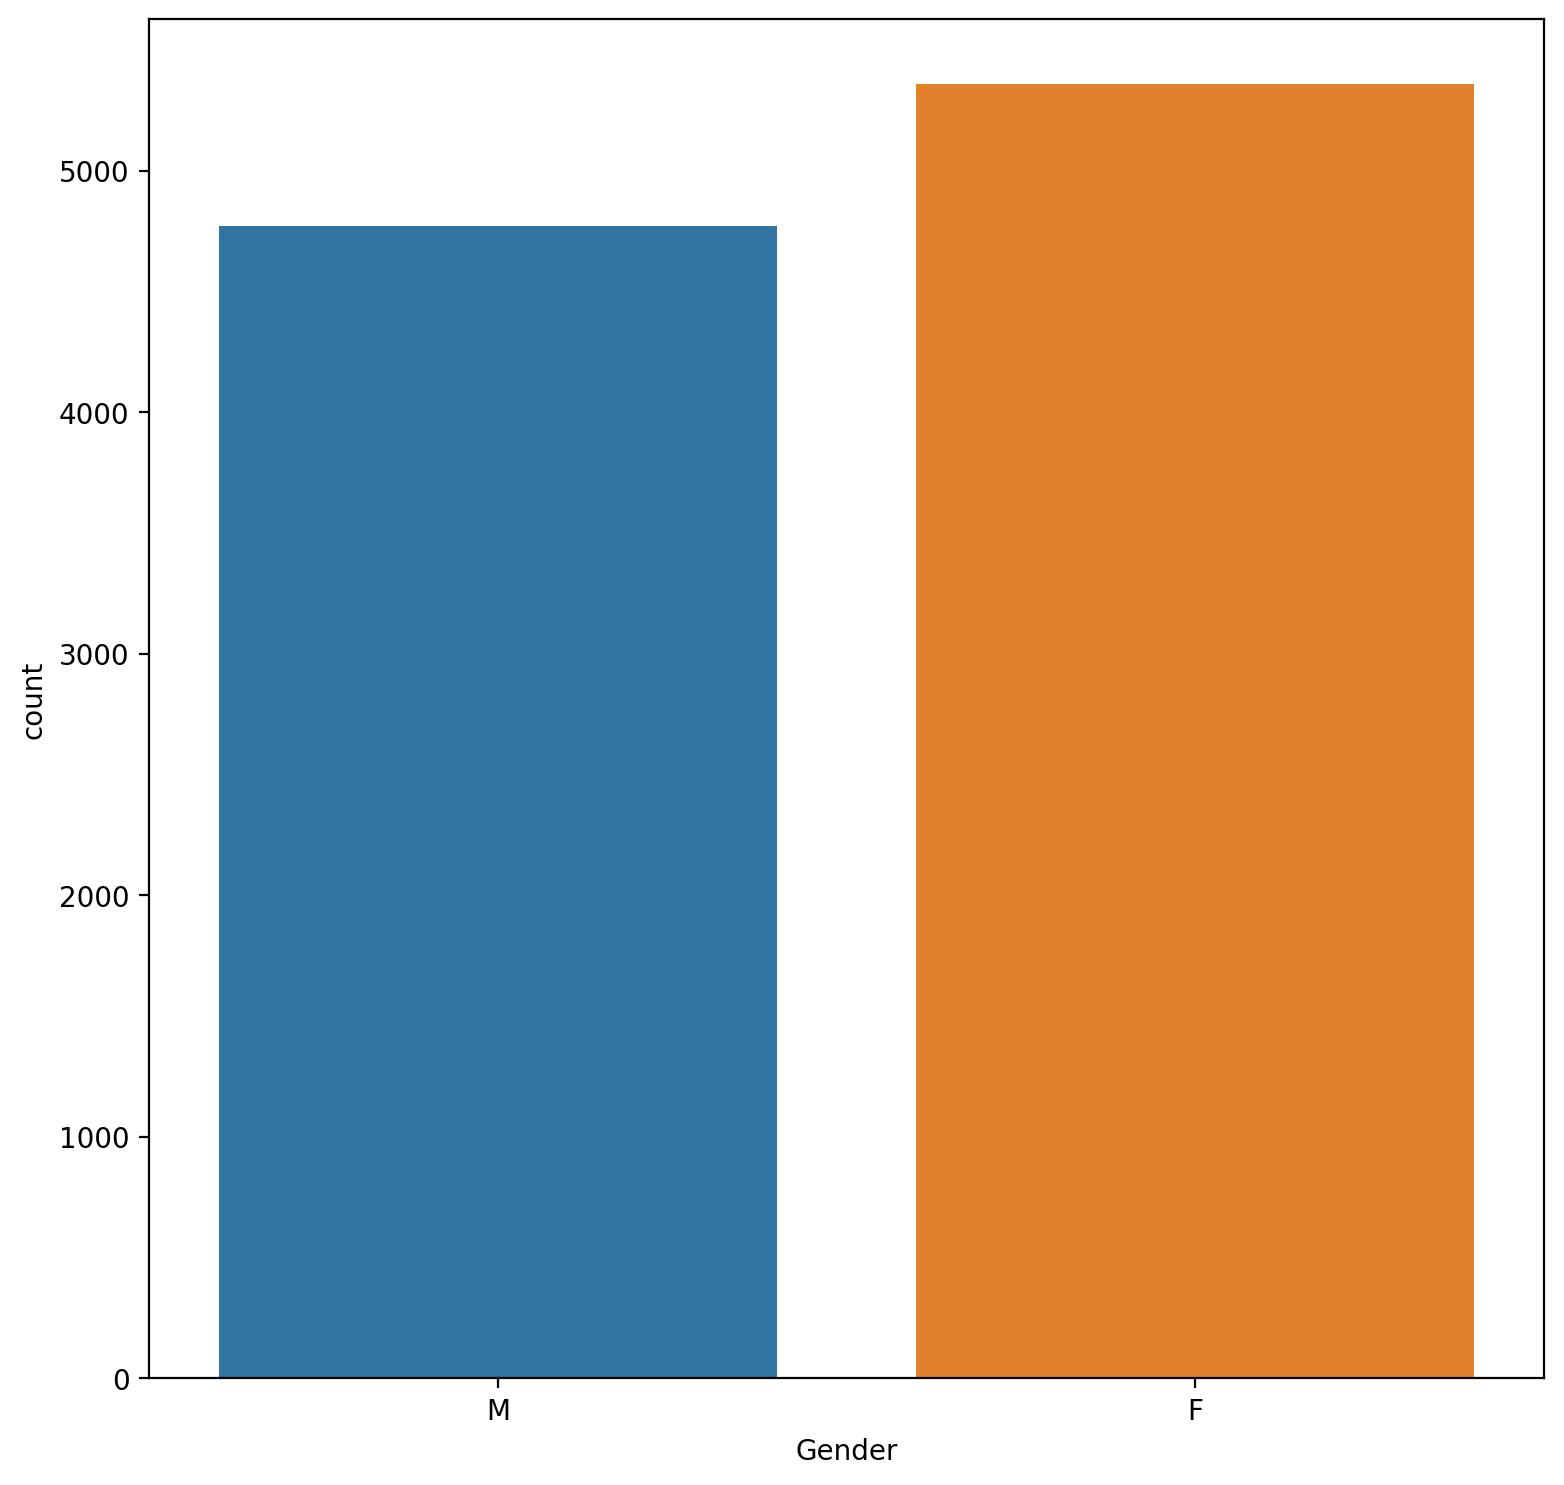

In [6]:
sns.countplot(data['Gender'])

In [7]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# 1

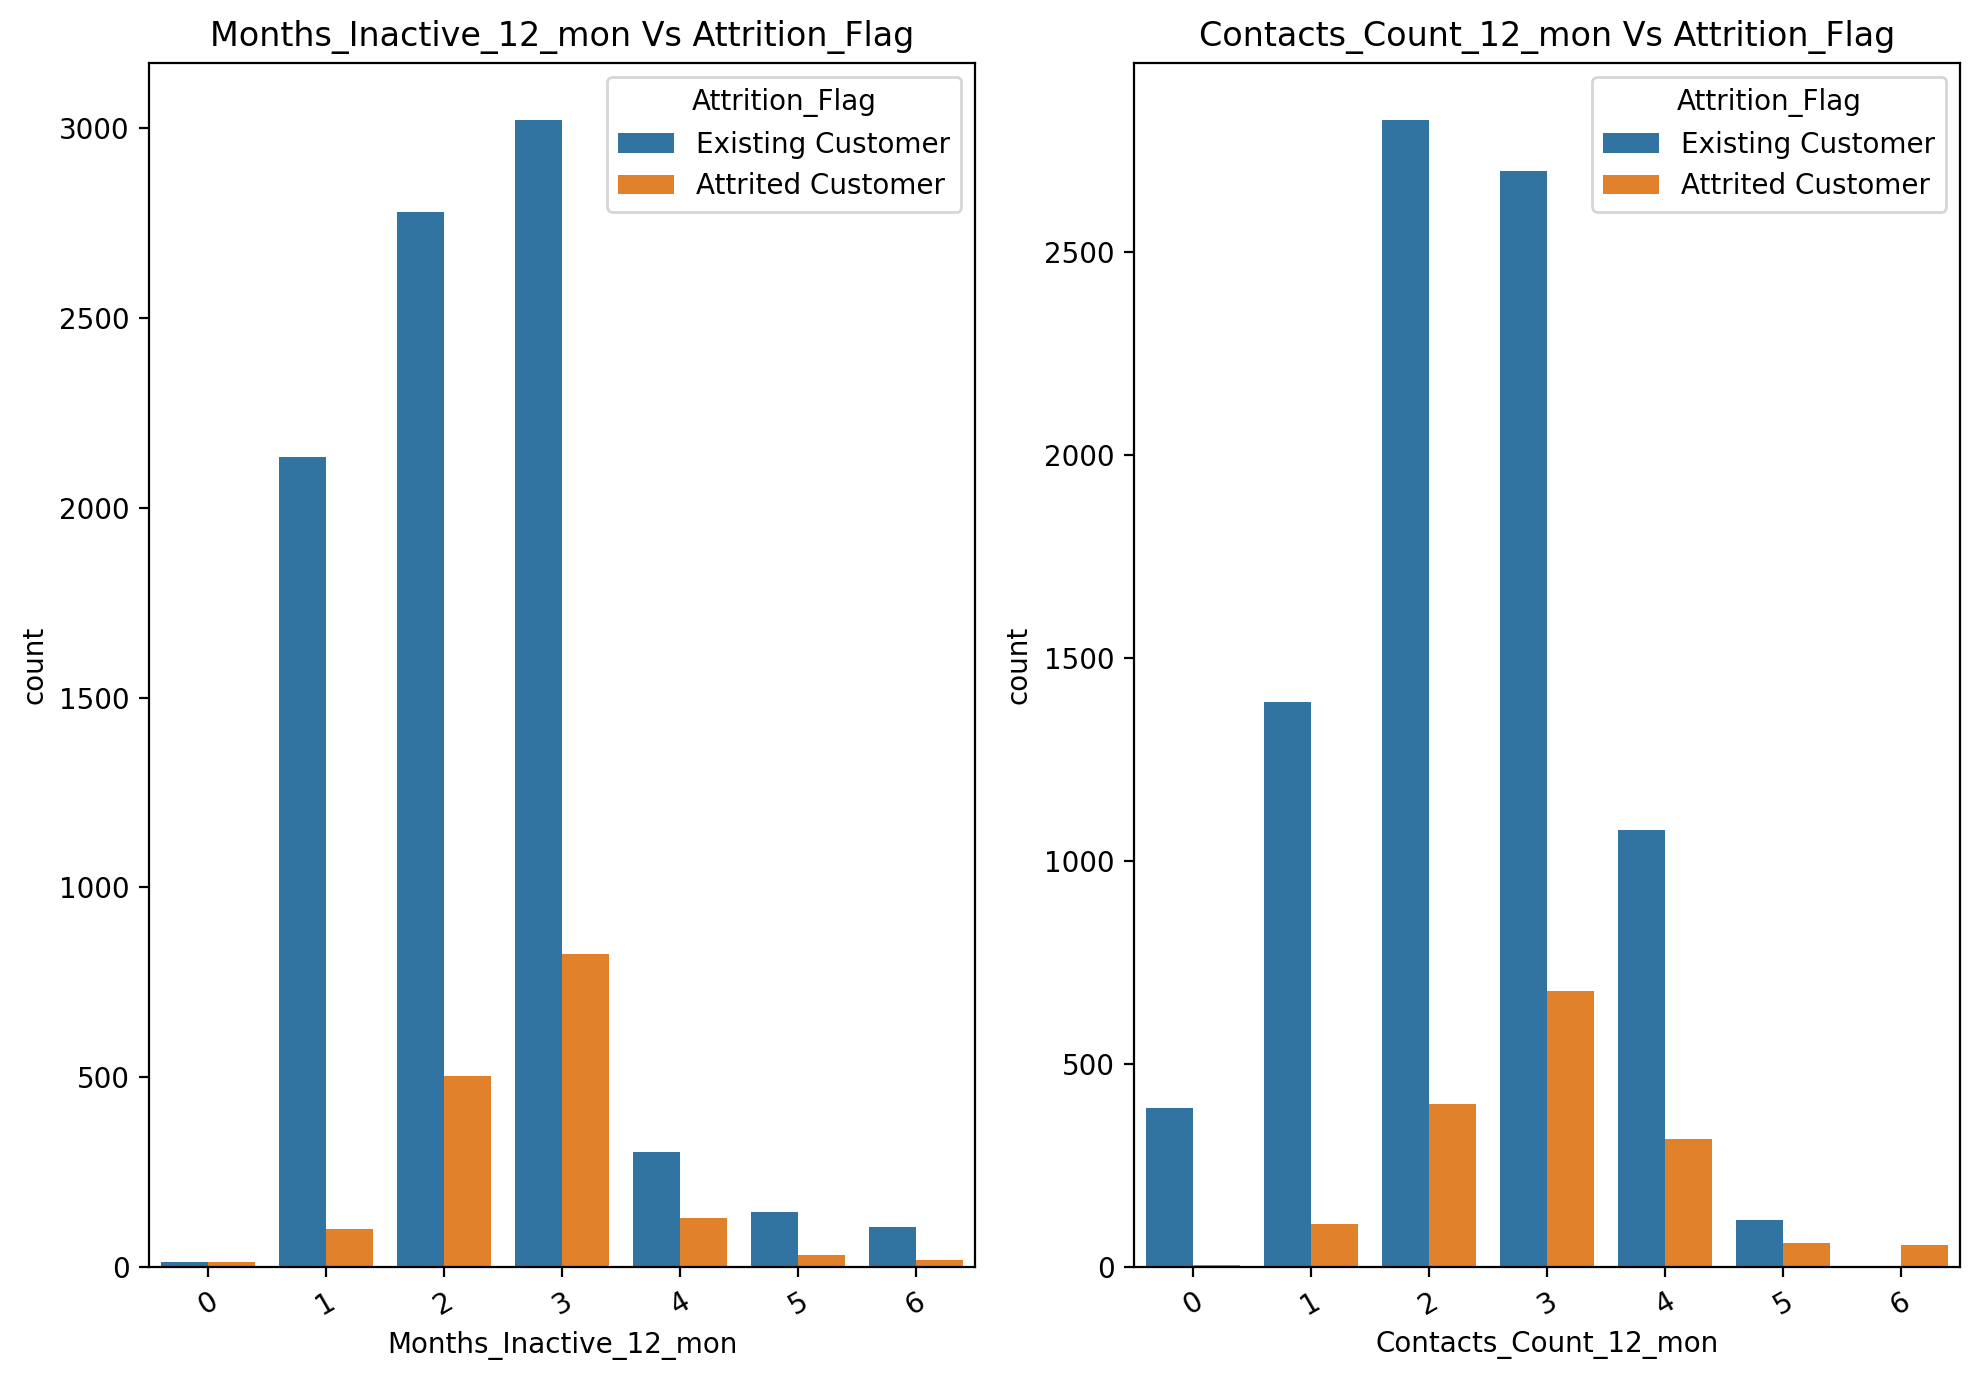

In [8]:

plt.figure(figsize=(10,7),dpi=200)
plt.subplot(121)
sns.countplot(x = data[cat[-2]], hue =  data.Attrition_Flag)
plt.xticks(rotation=30)
plt.title(cat[-2]+' Vs Attrition_Flag')

plt.subplot(122)
sns.countplot(x = data[cat[-1]], hue =  data.Attrition_Flag)
plt.xticks(rotation=30)
plt.title(cat[-1]+' Vs Attrition_Flag')

plt.tight_layout()
plt.show()


In [9]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
data.groupby('Attrition_Flag').nunique()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,,,,,,
Attrited Customer,42,2,6,7,4,6,4,44,6,7,7,1306,514,1392,690,1266,82,428,490
Existing Customer,45,2,6,7,4,6,4,44,6,7,6,5475,1841,5968,1086,4415,124,784,932


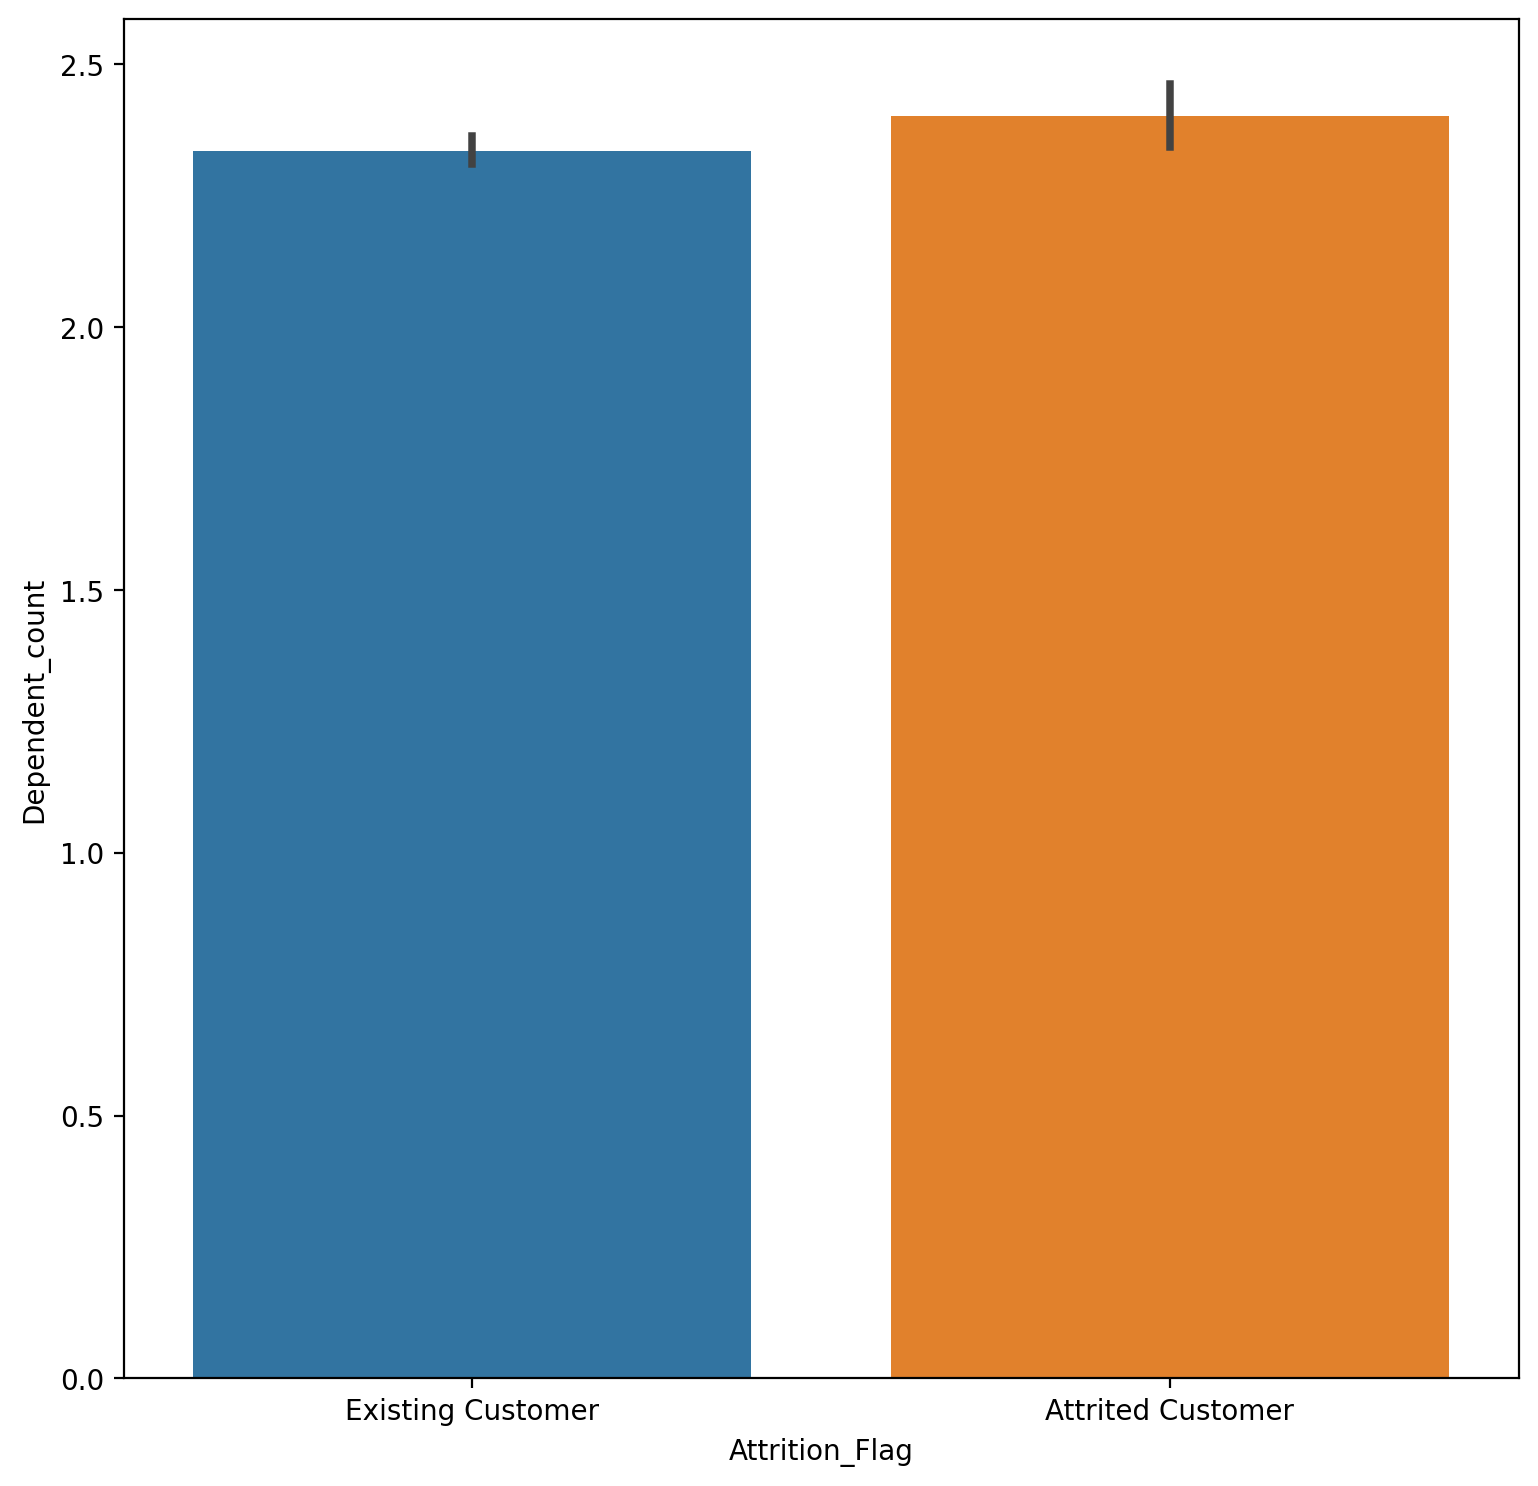

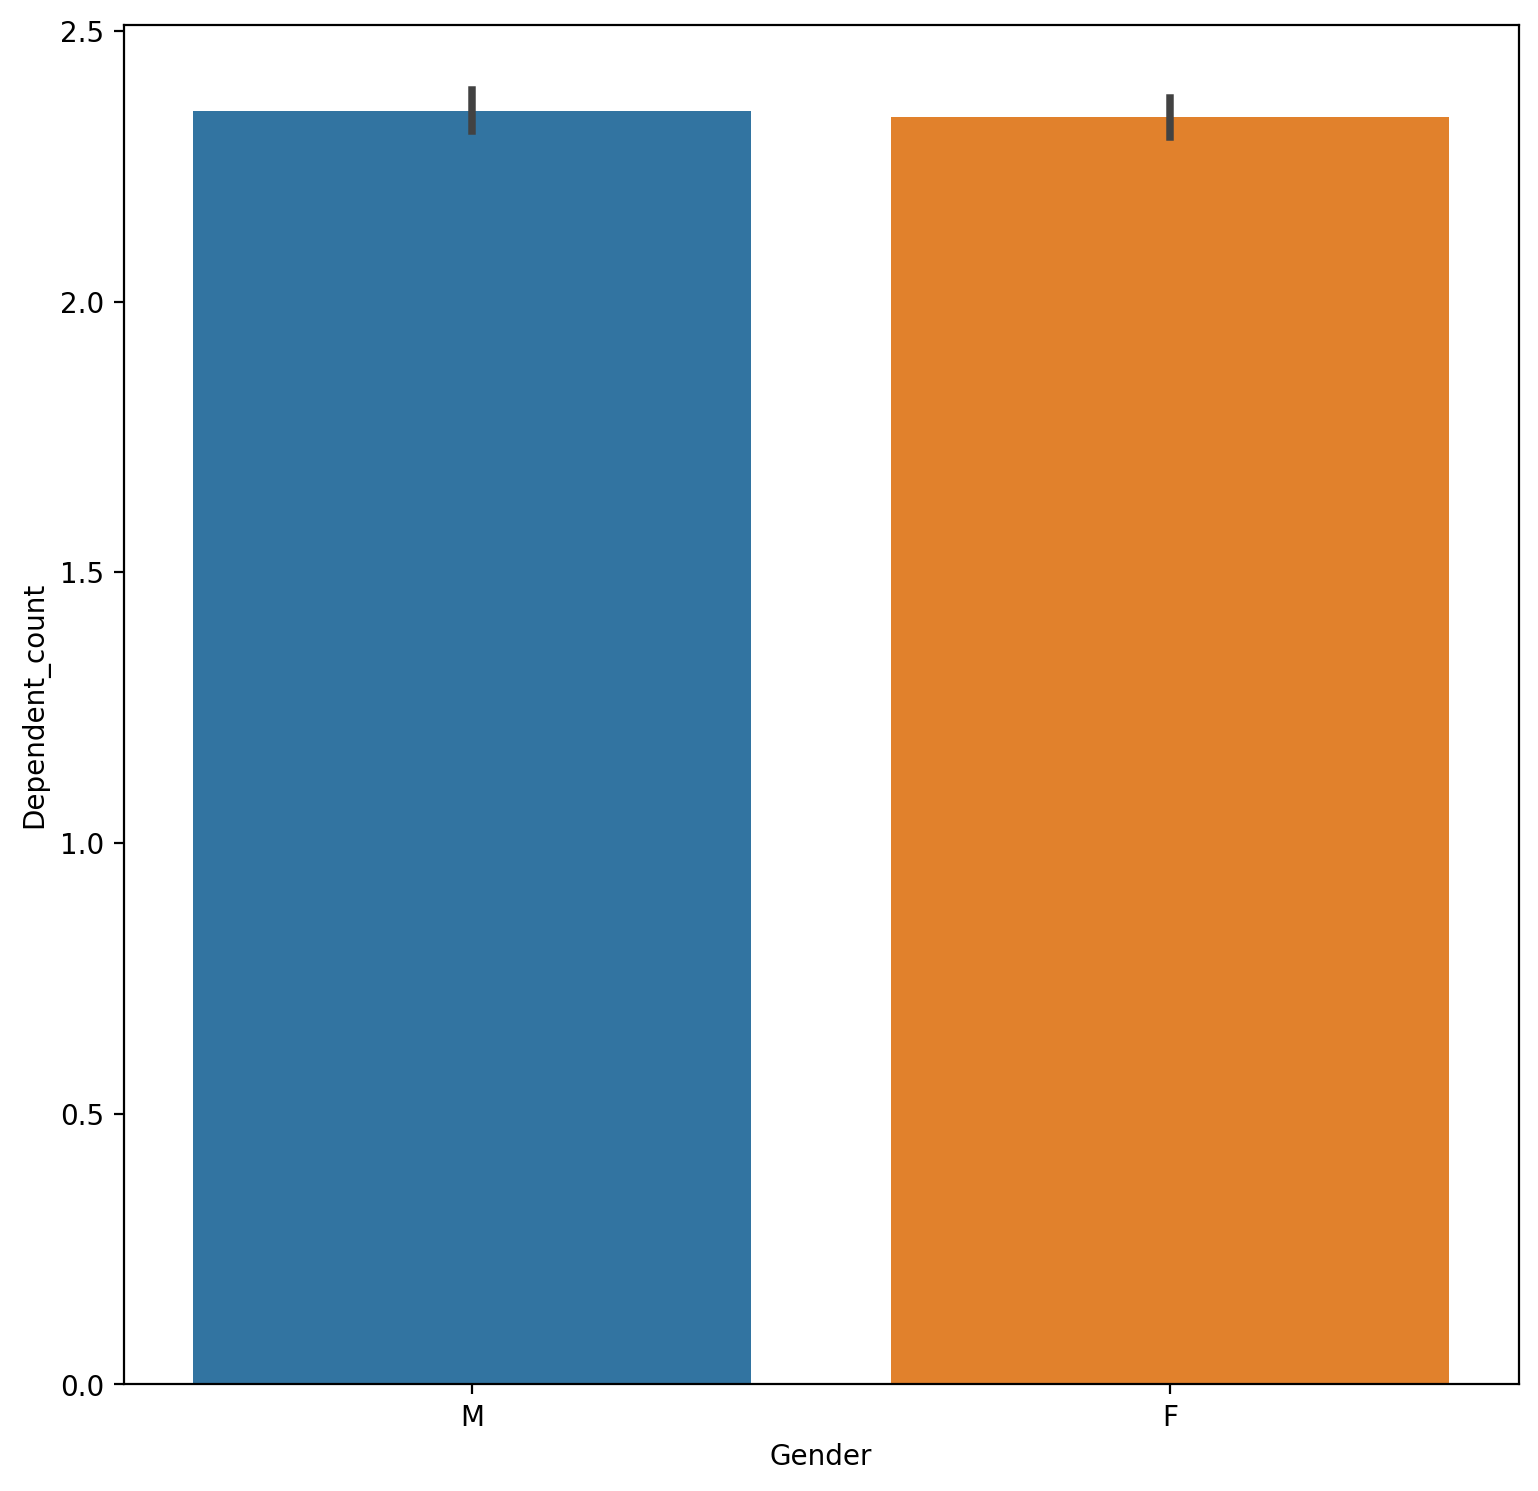

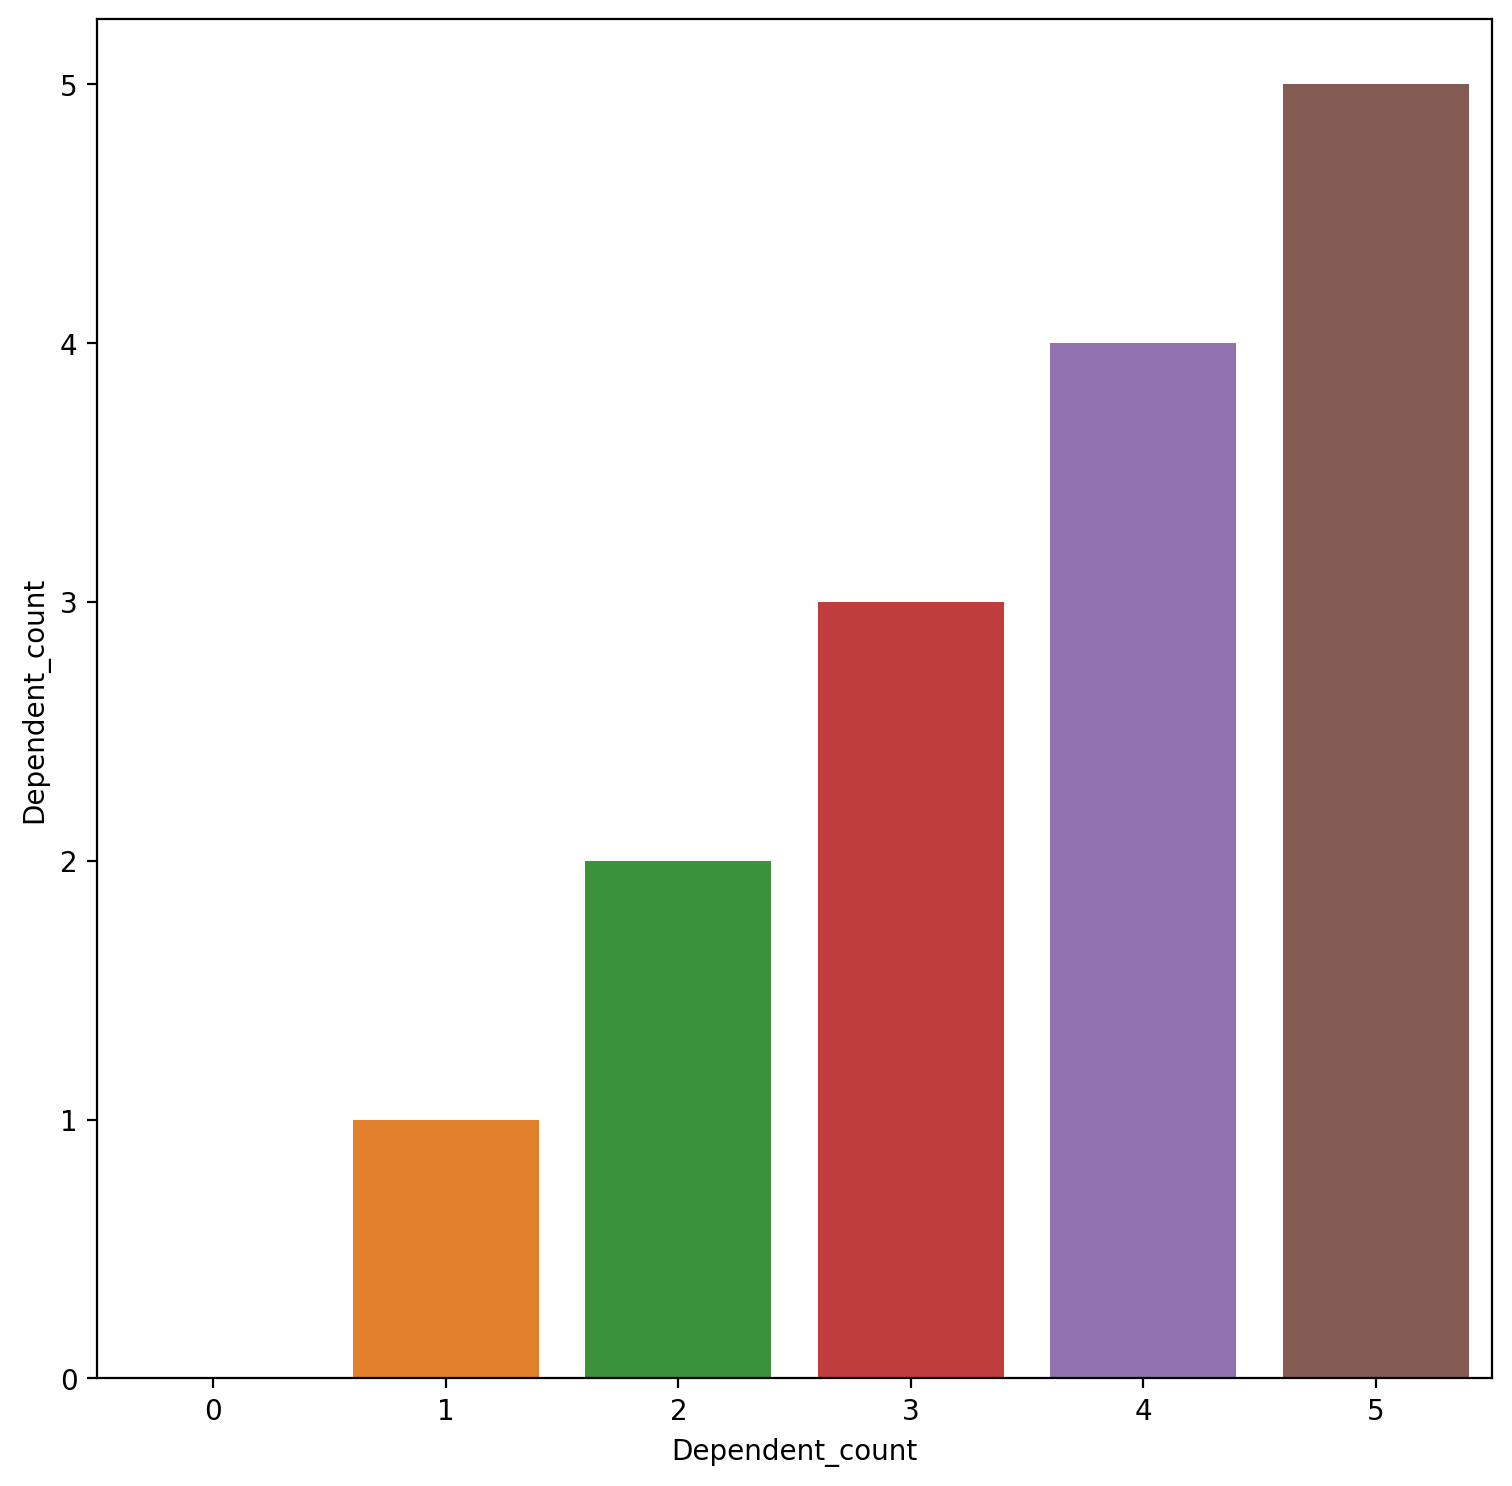

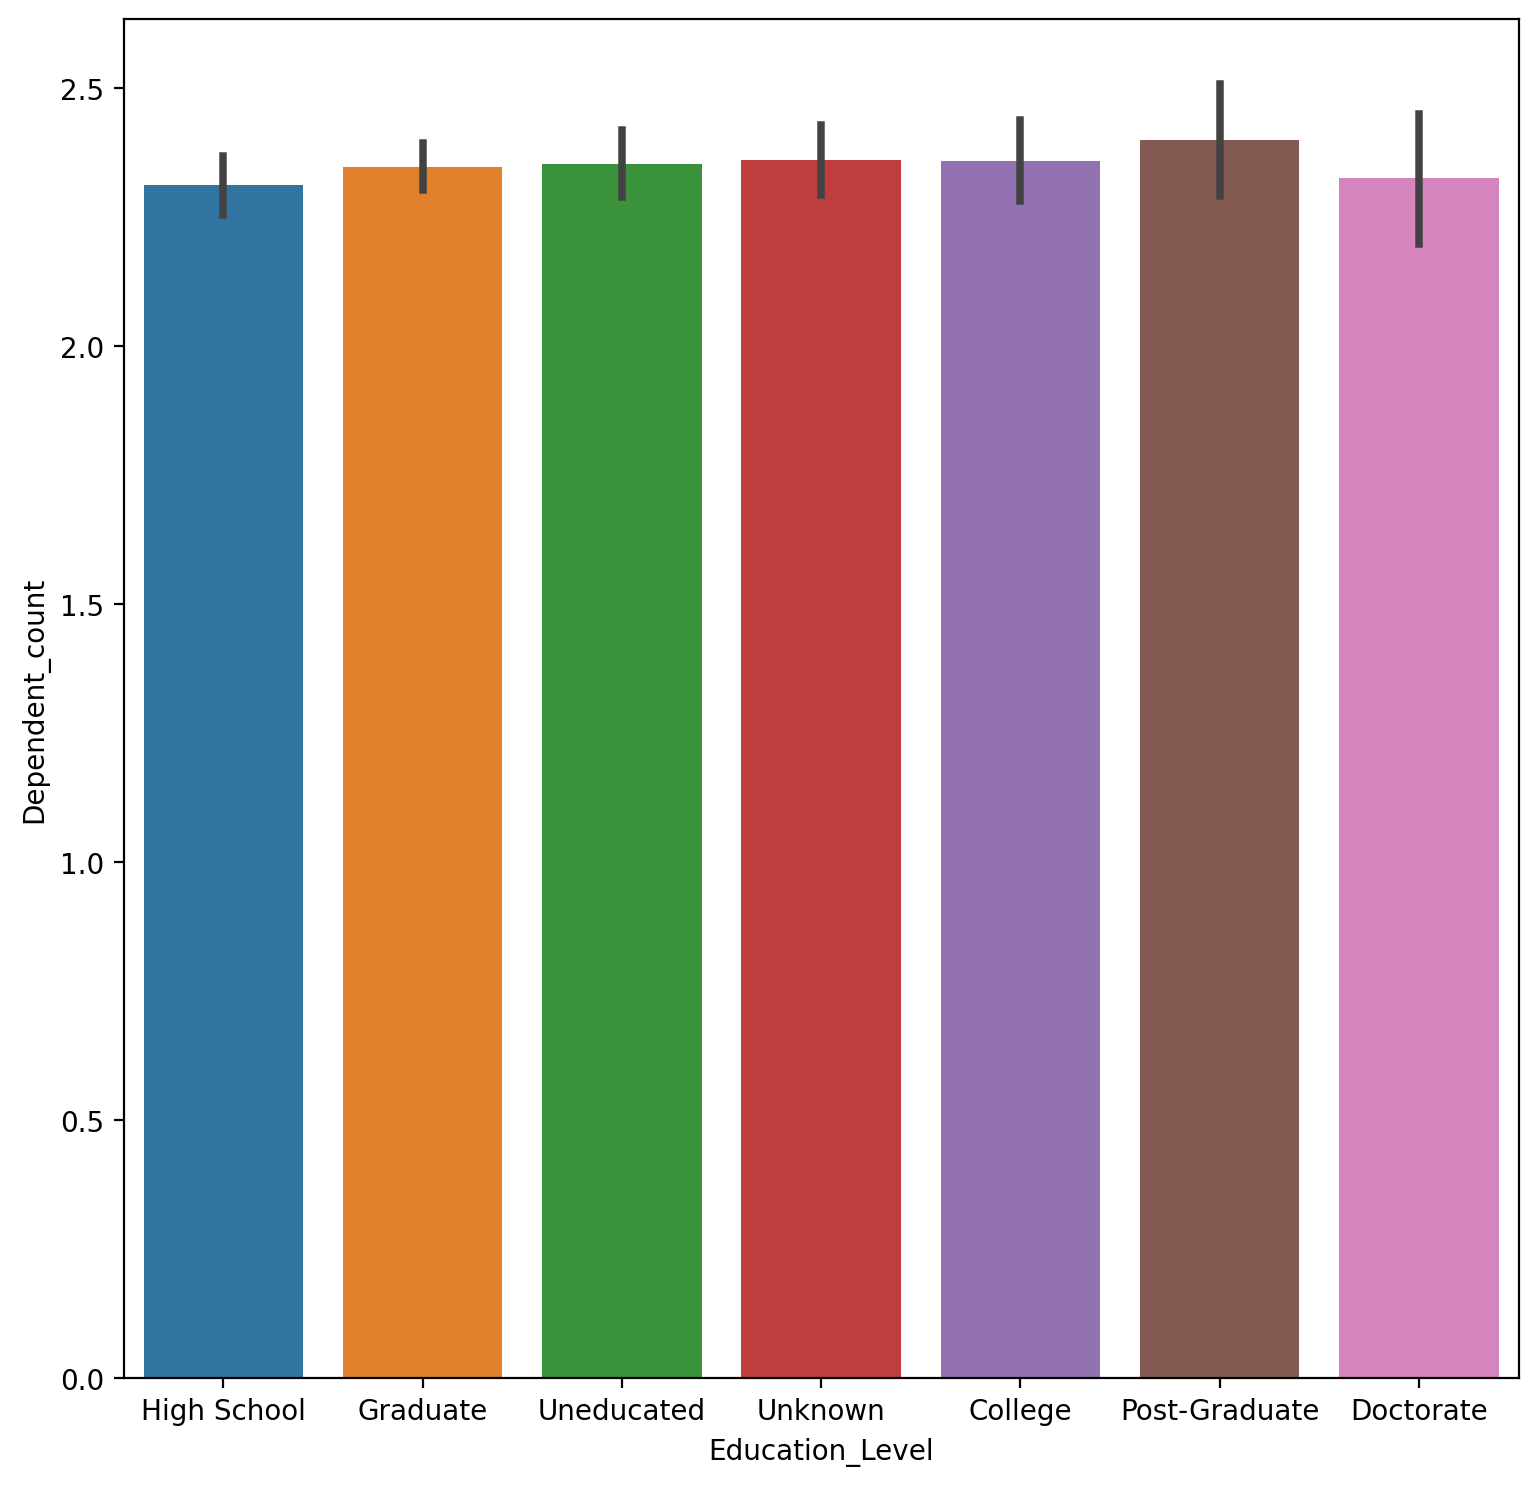

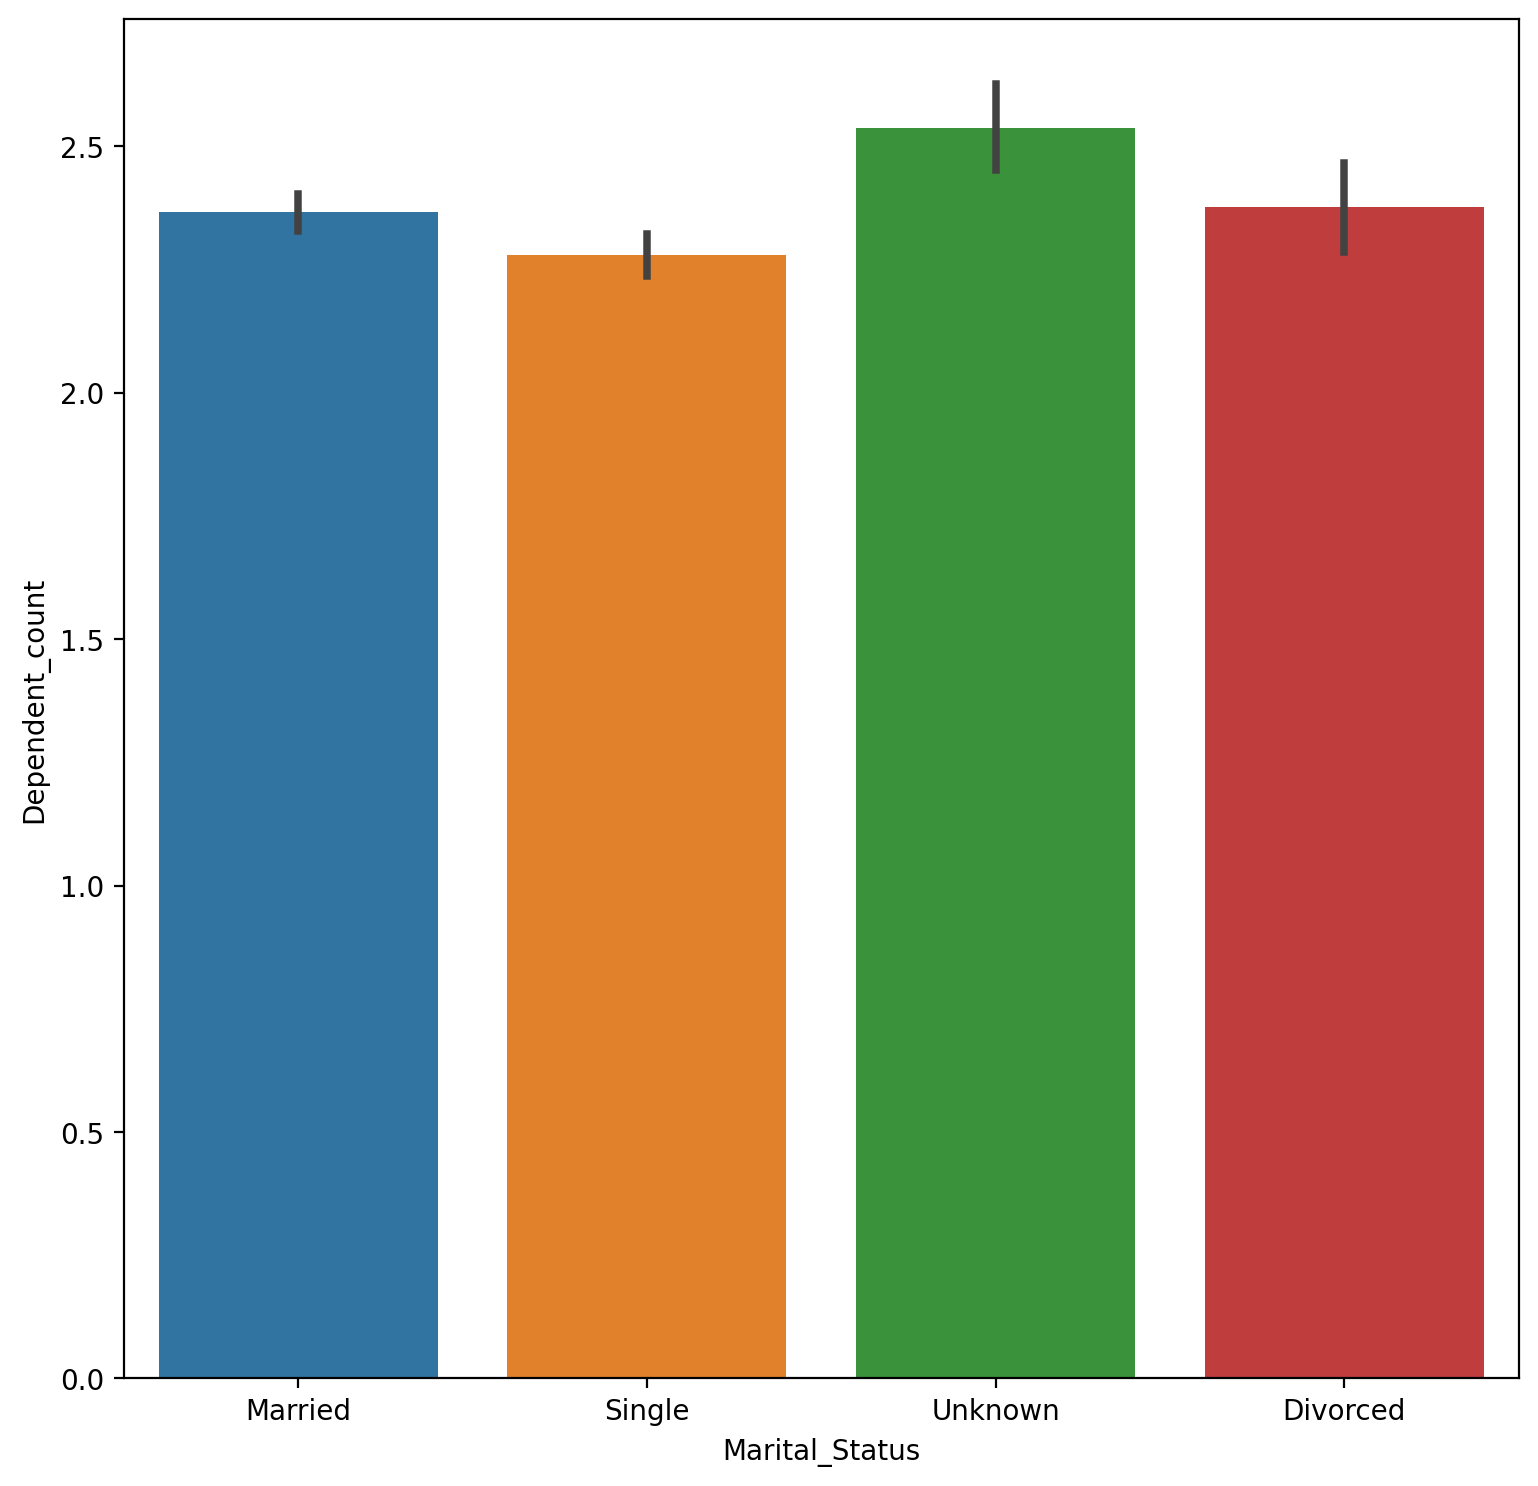

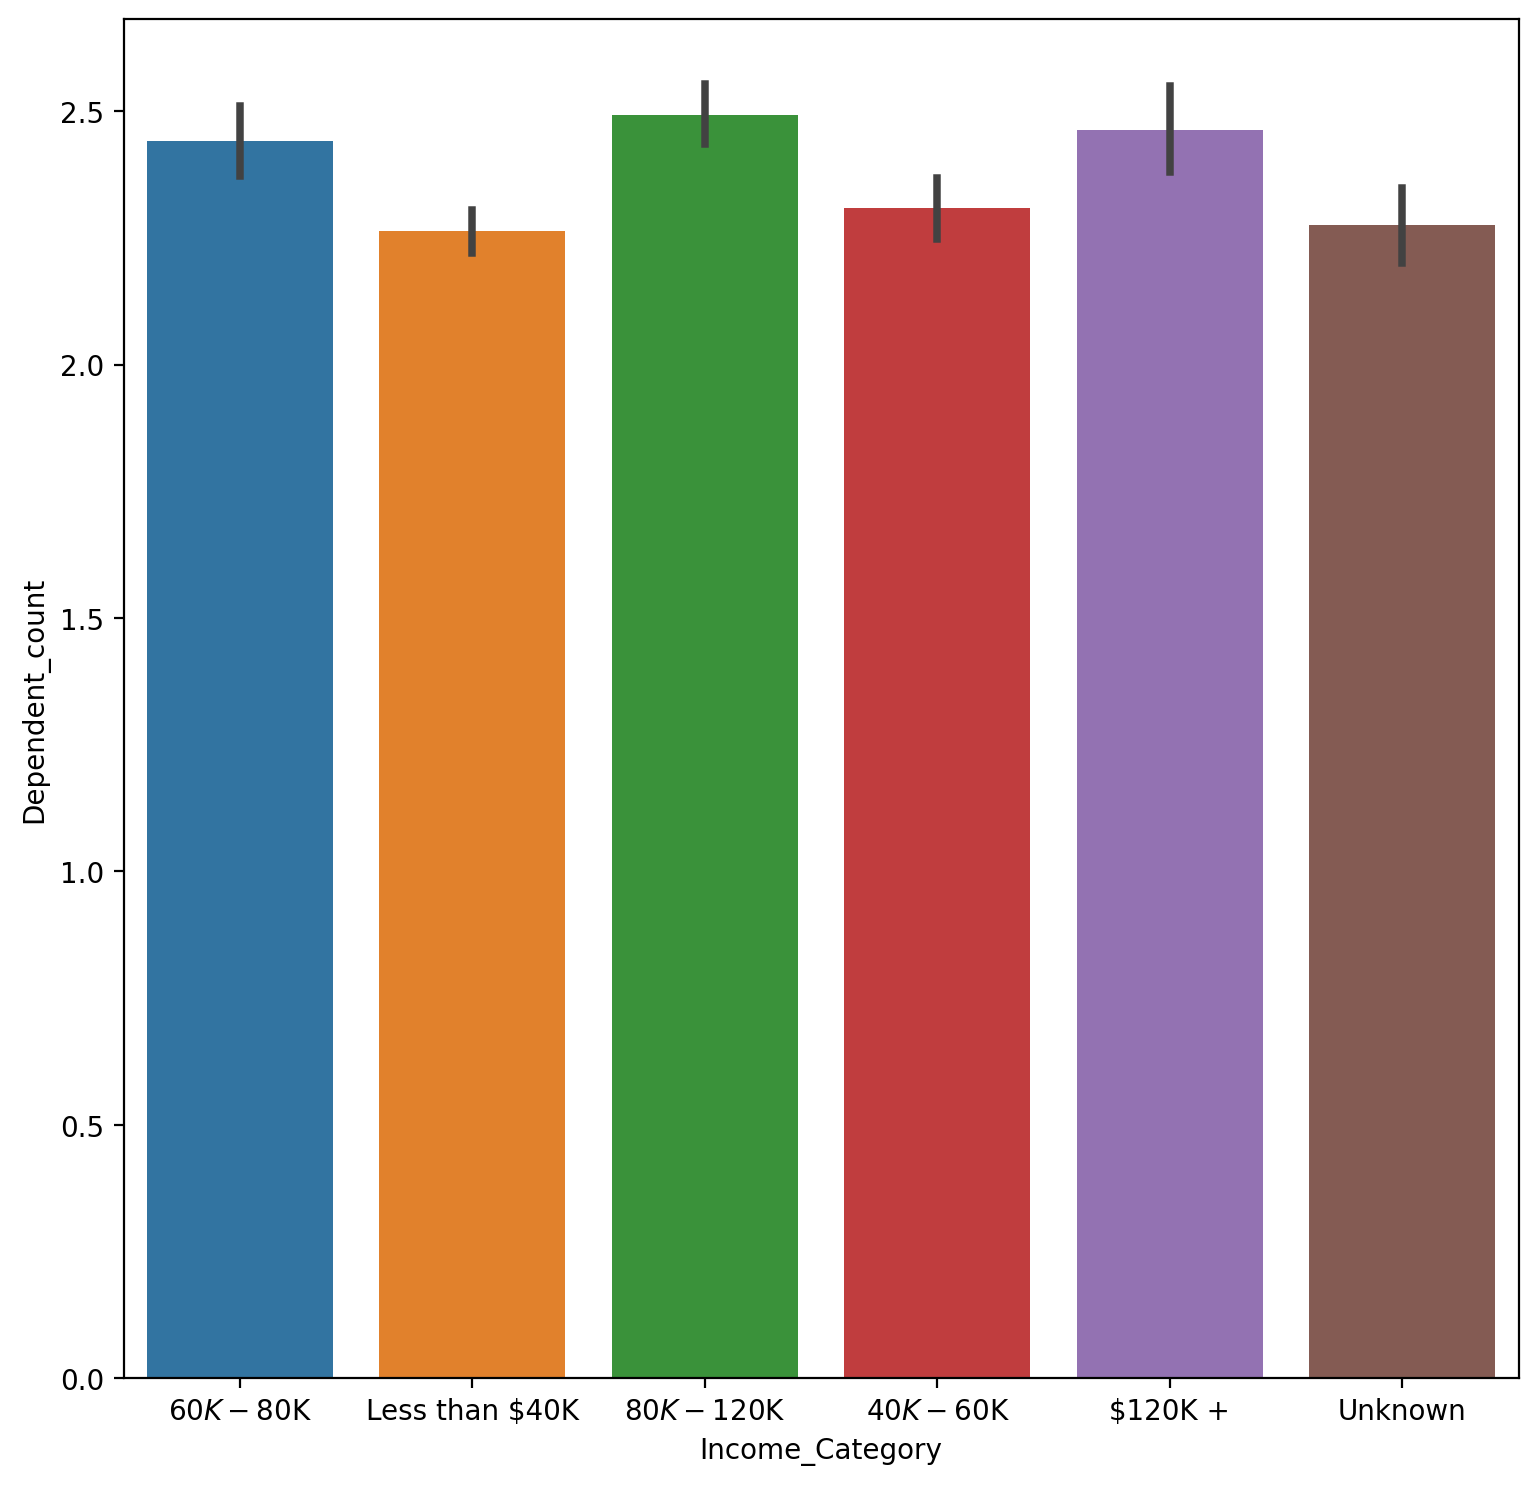

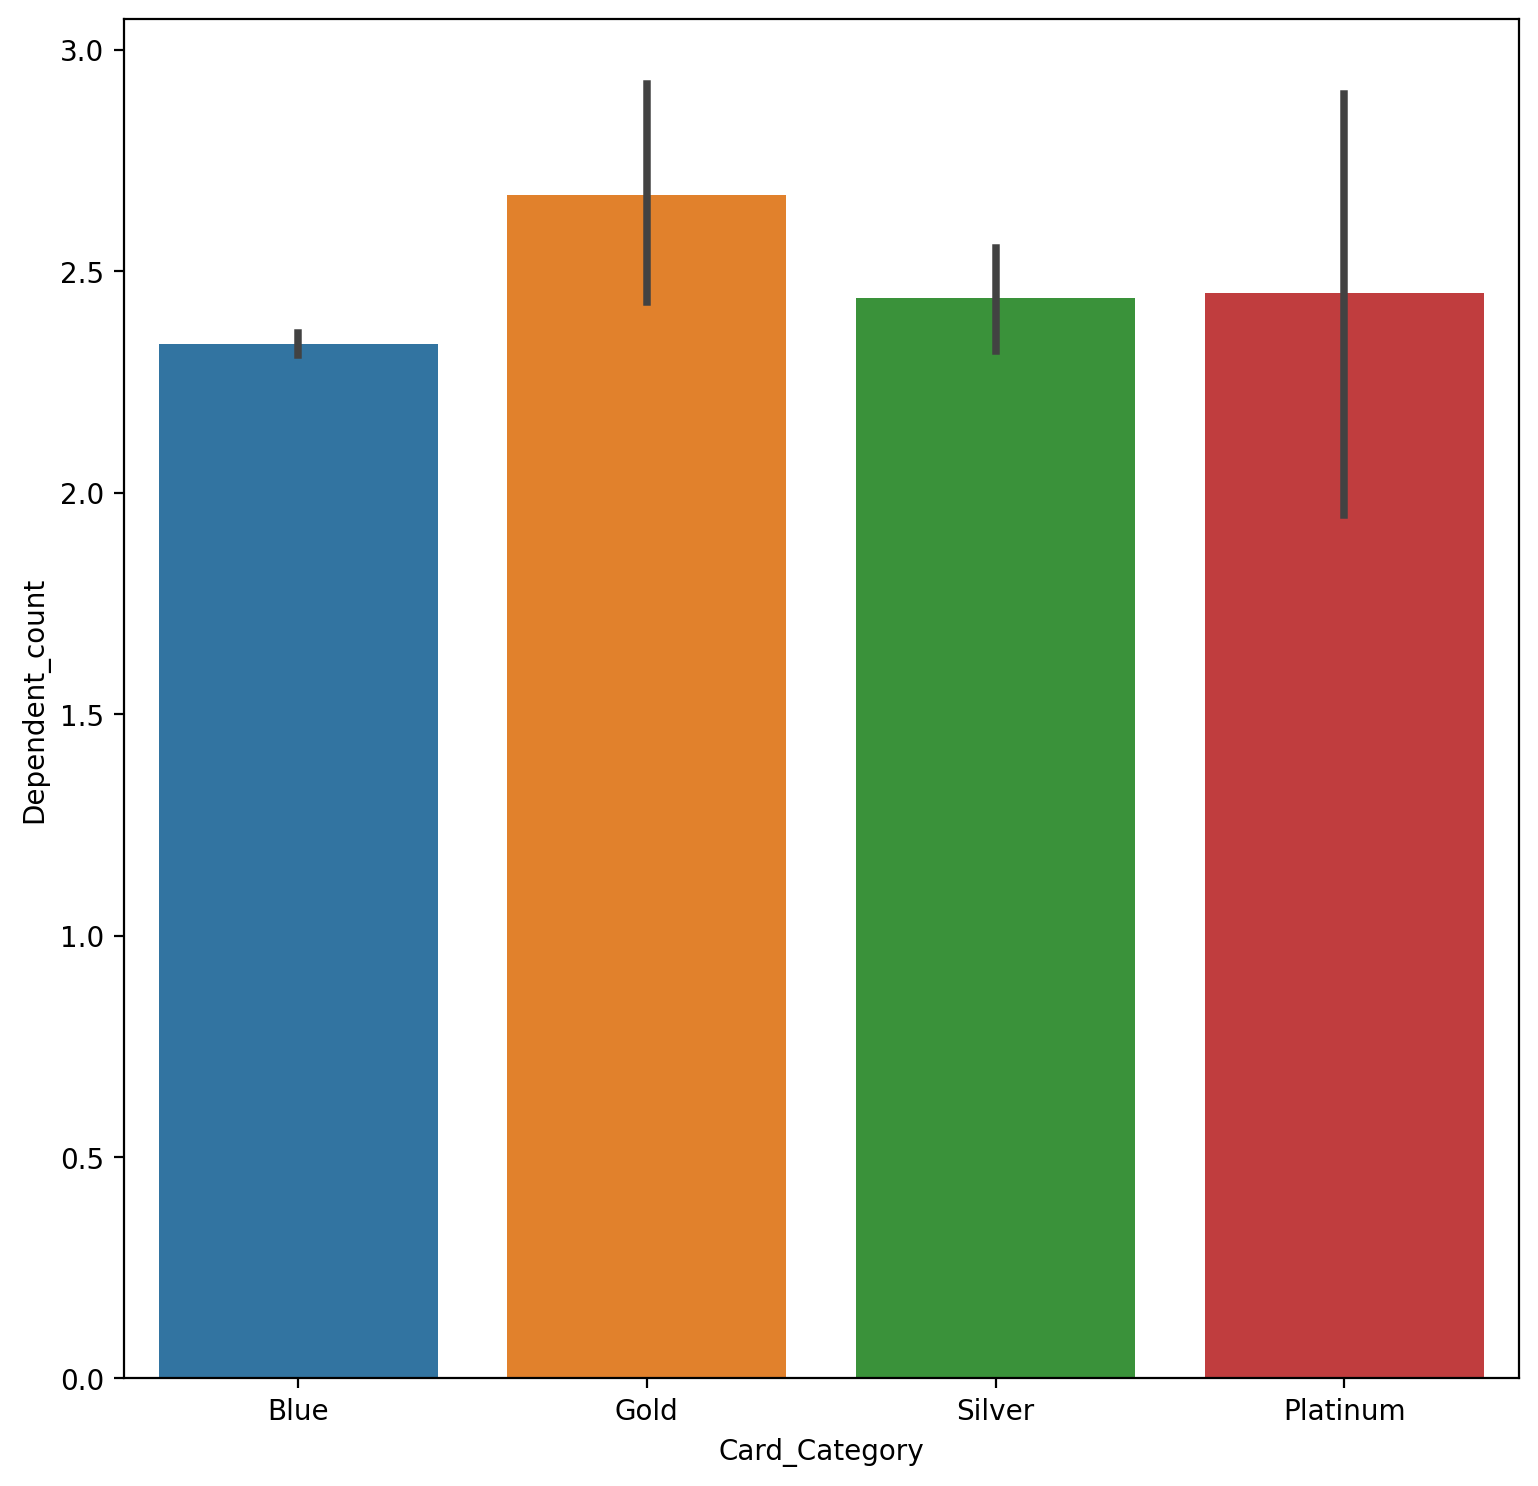

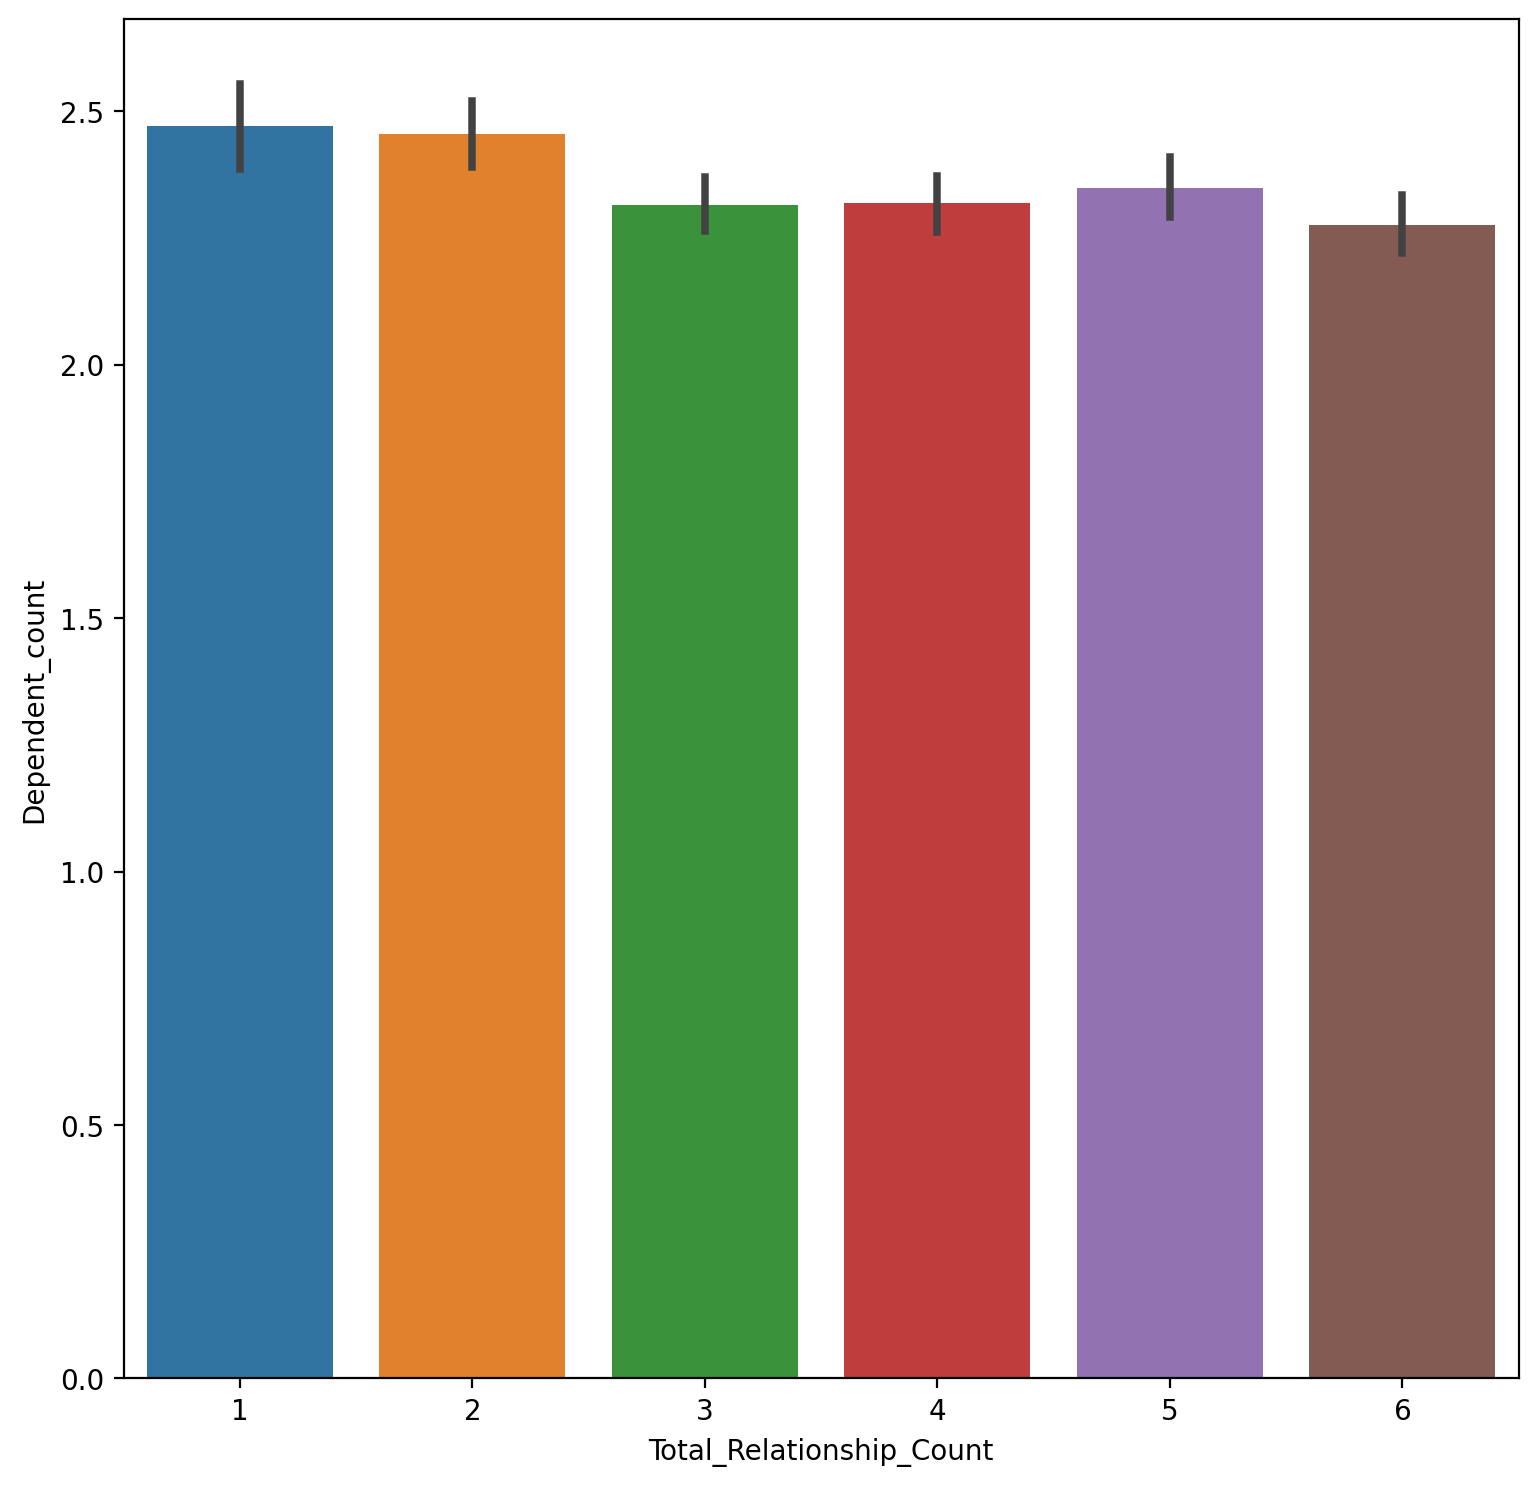

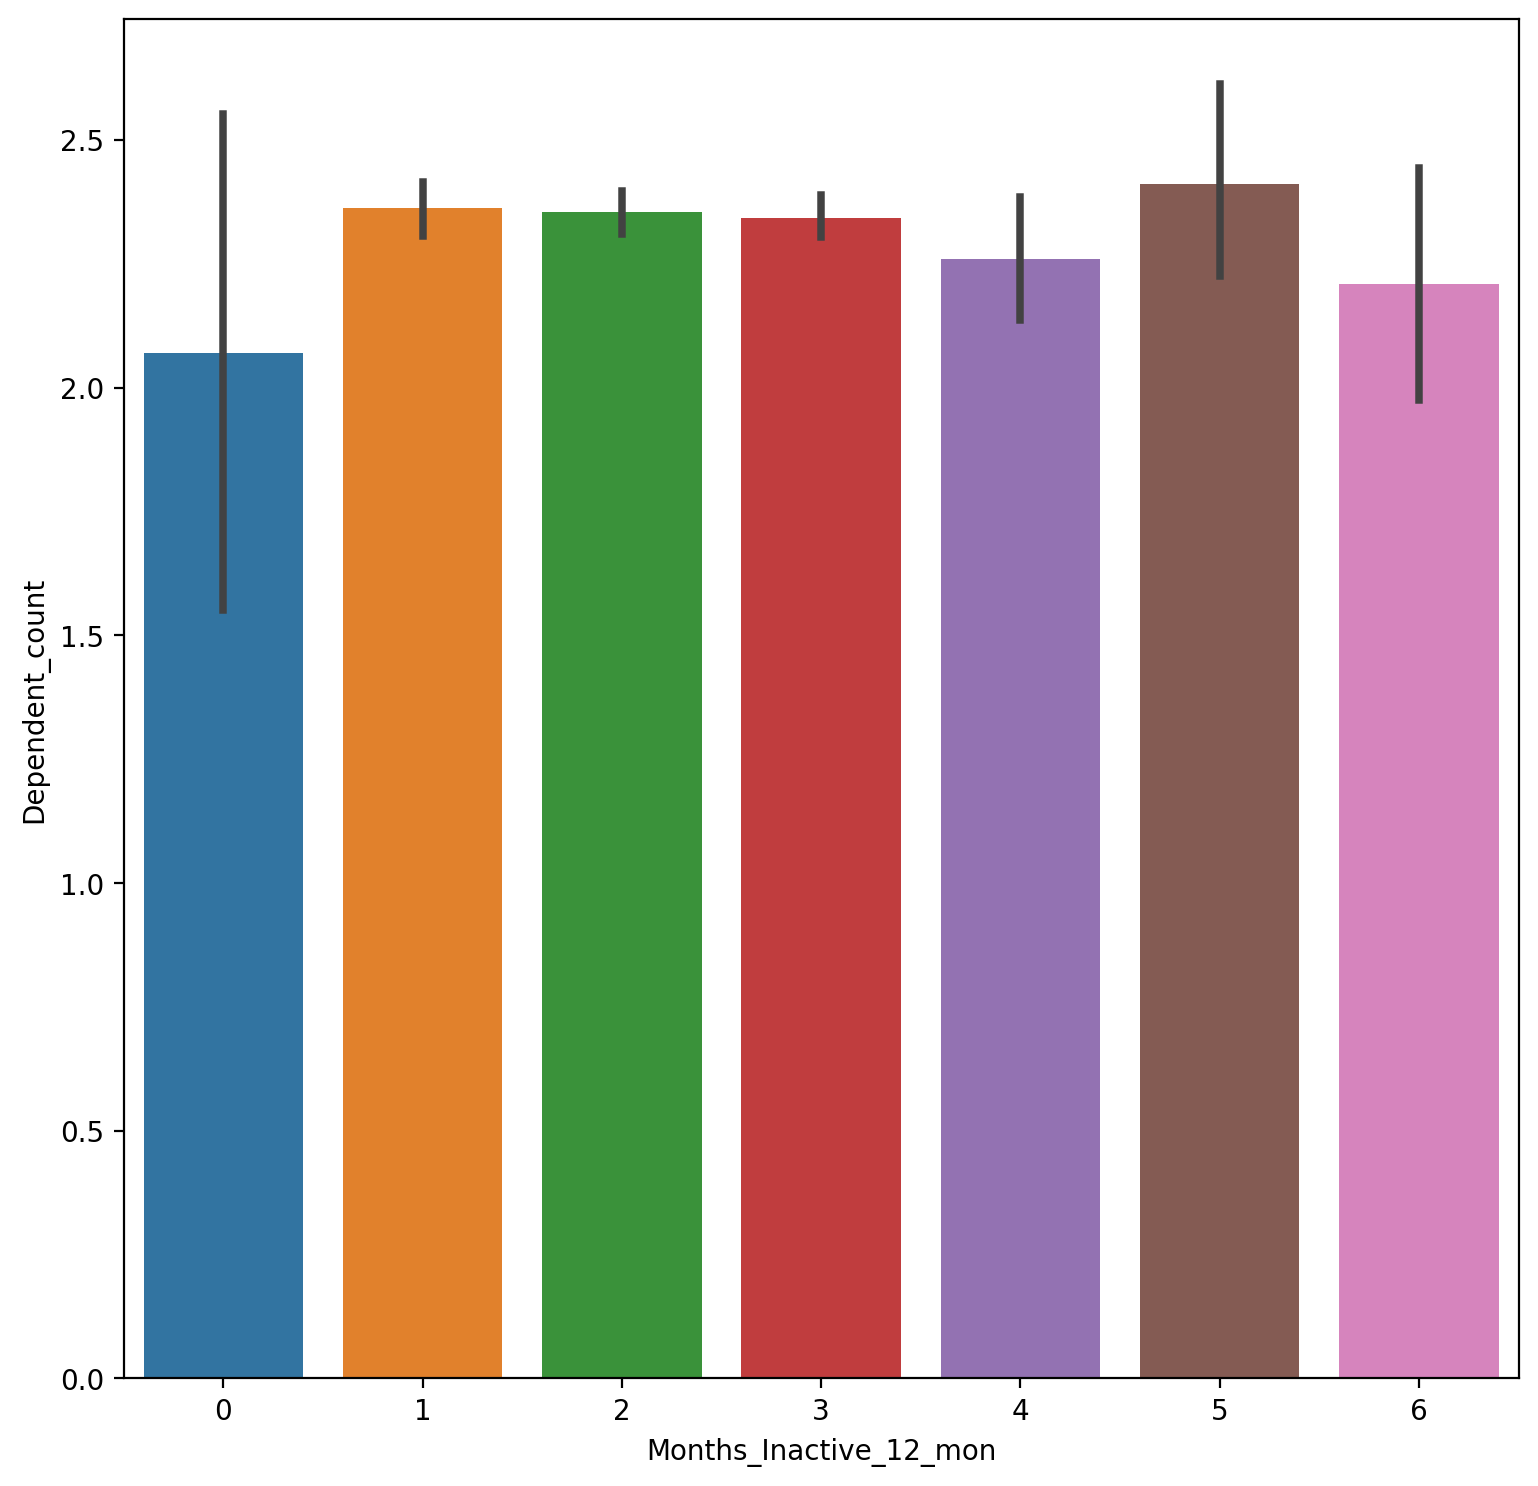

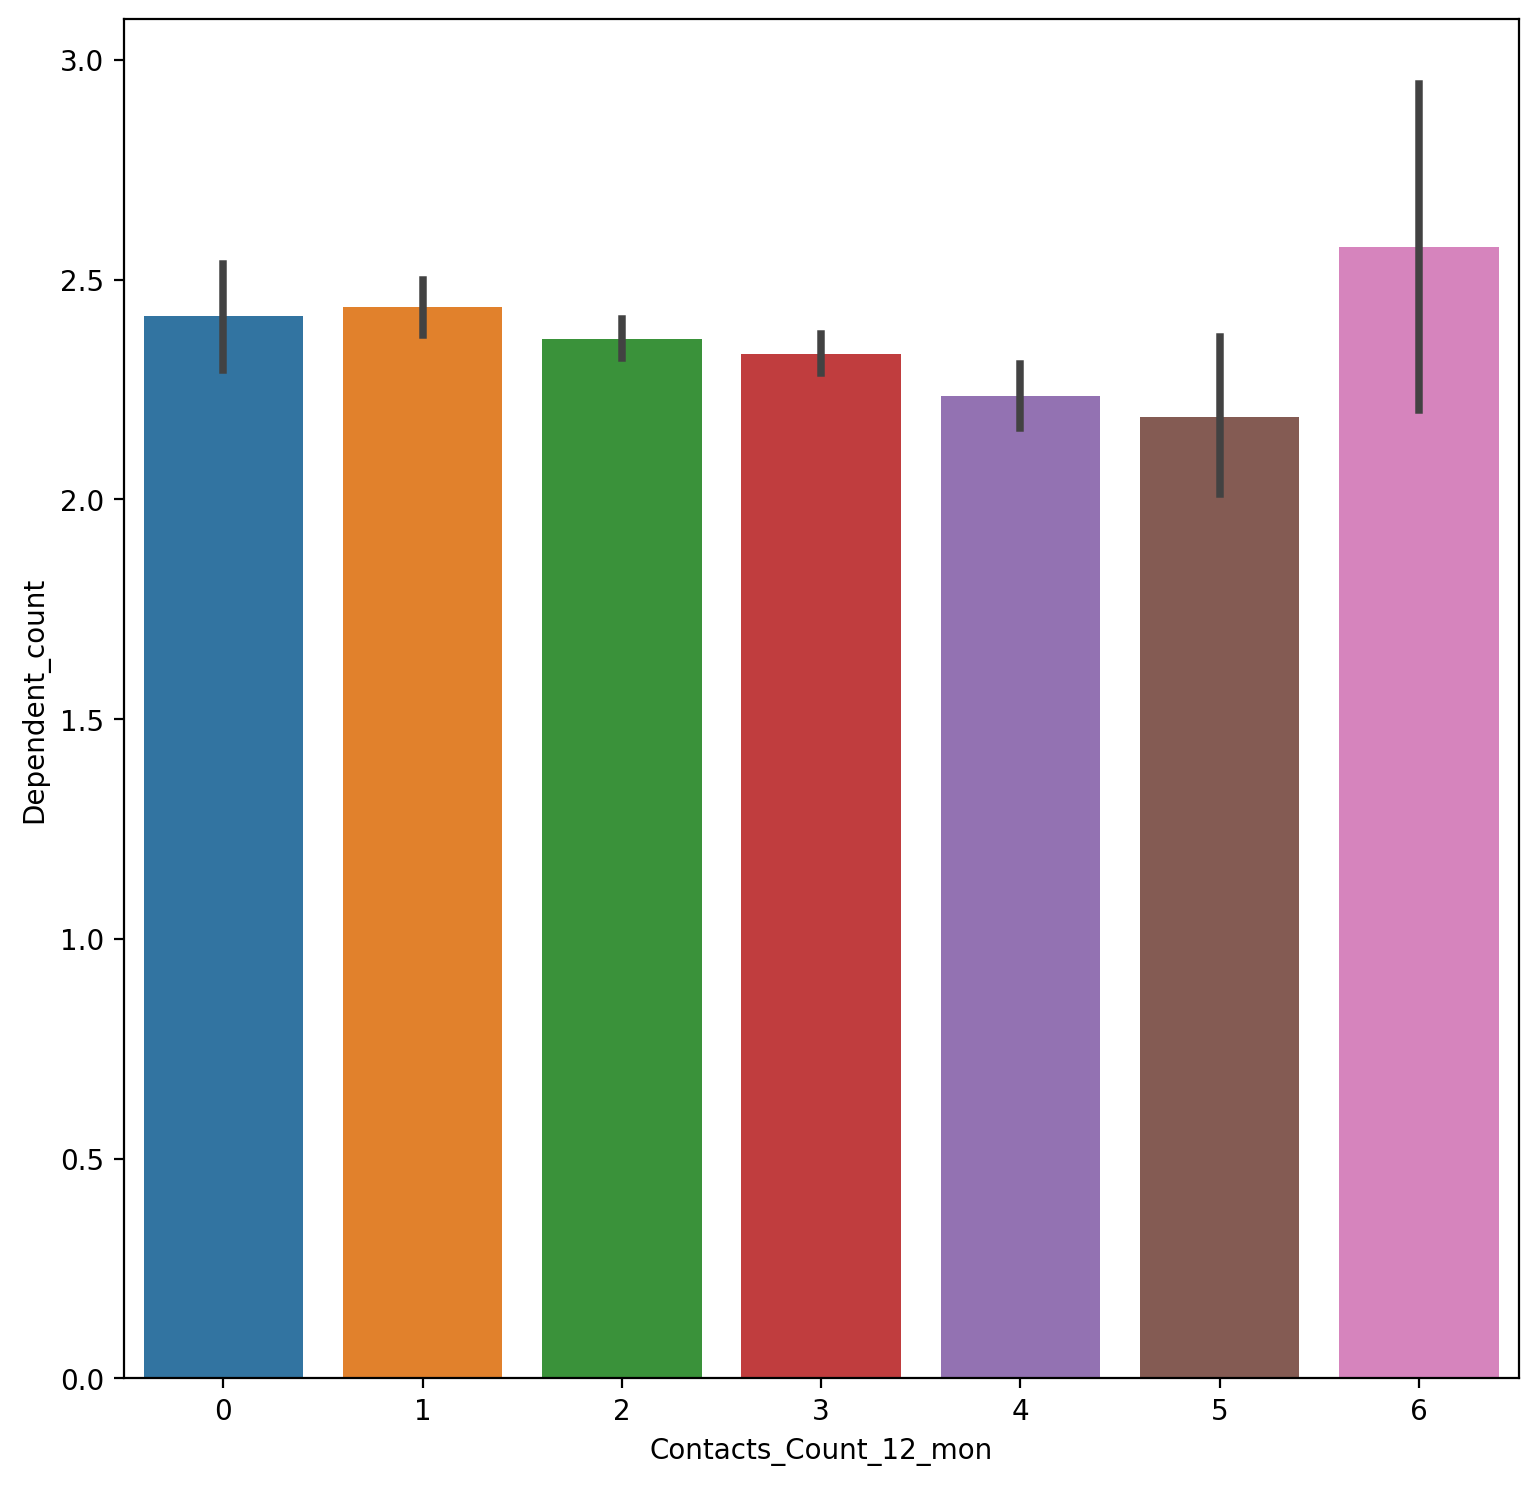

In [11]:
for i in cat:
    sns.barplot(data[i],data['Dependent_count'])
    plt.show()

In [12]:
data.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [13]:
data.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Customer_Age'>

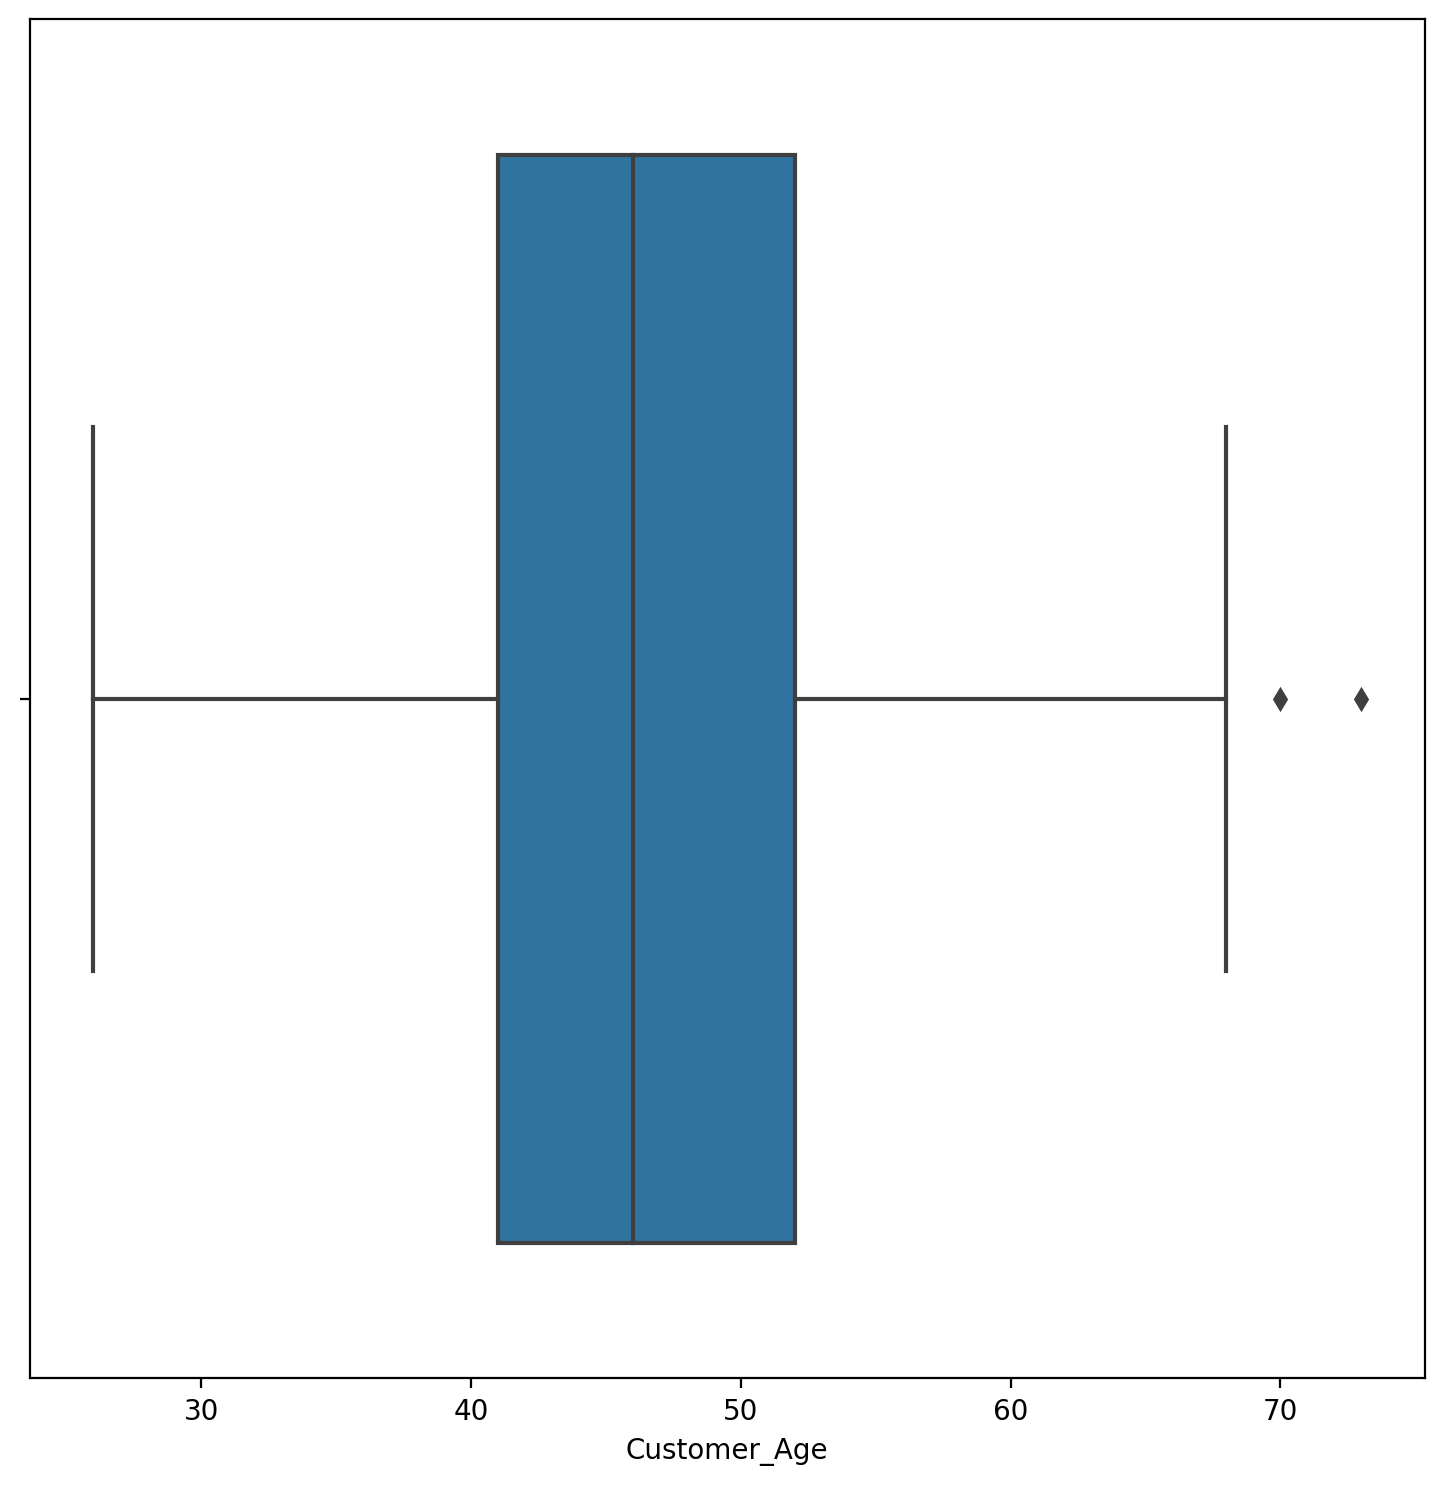

In [14]:
sns.boxplot(data=data , x='Customer_Age')

<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

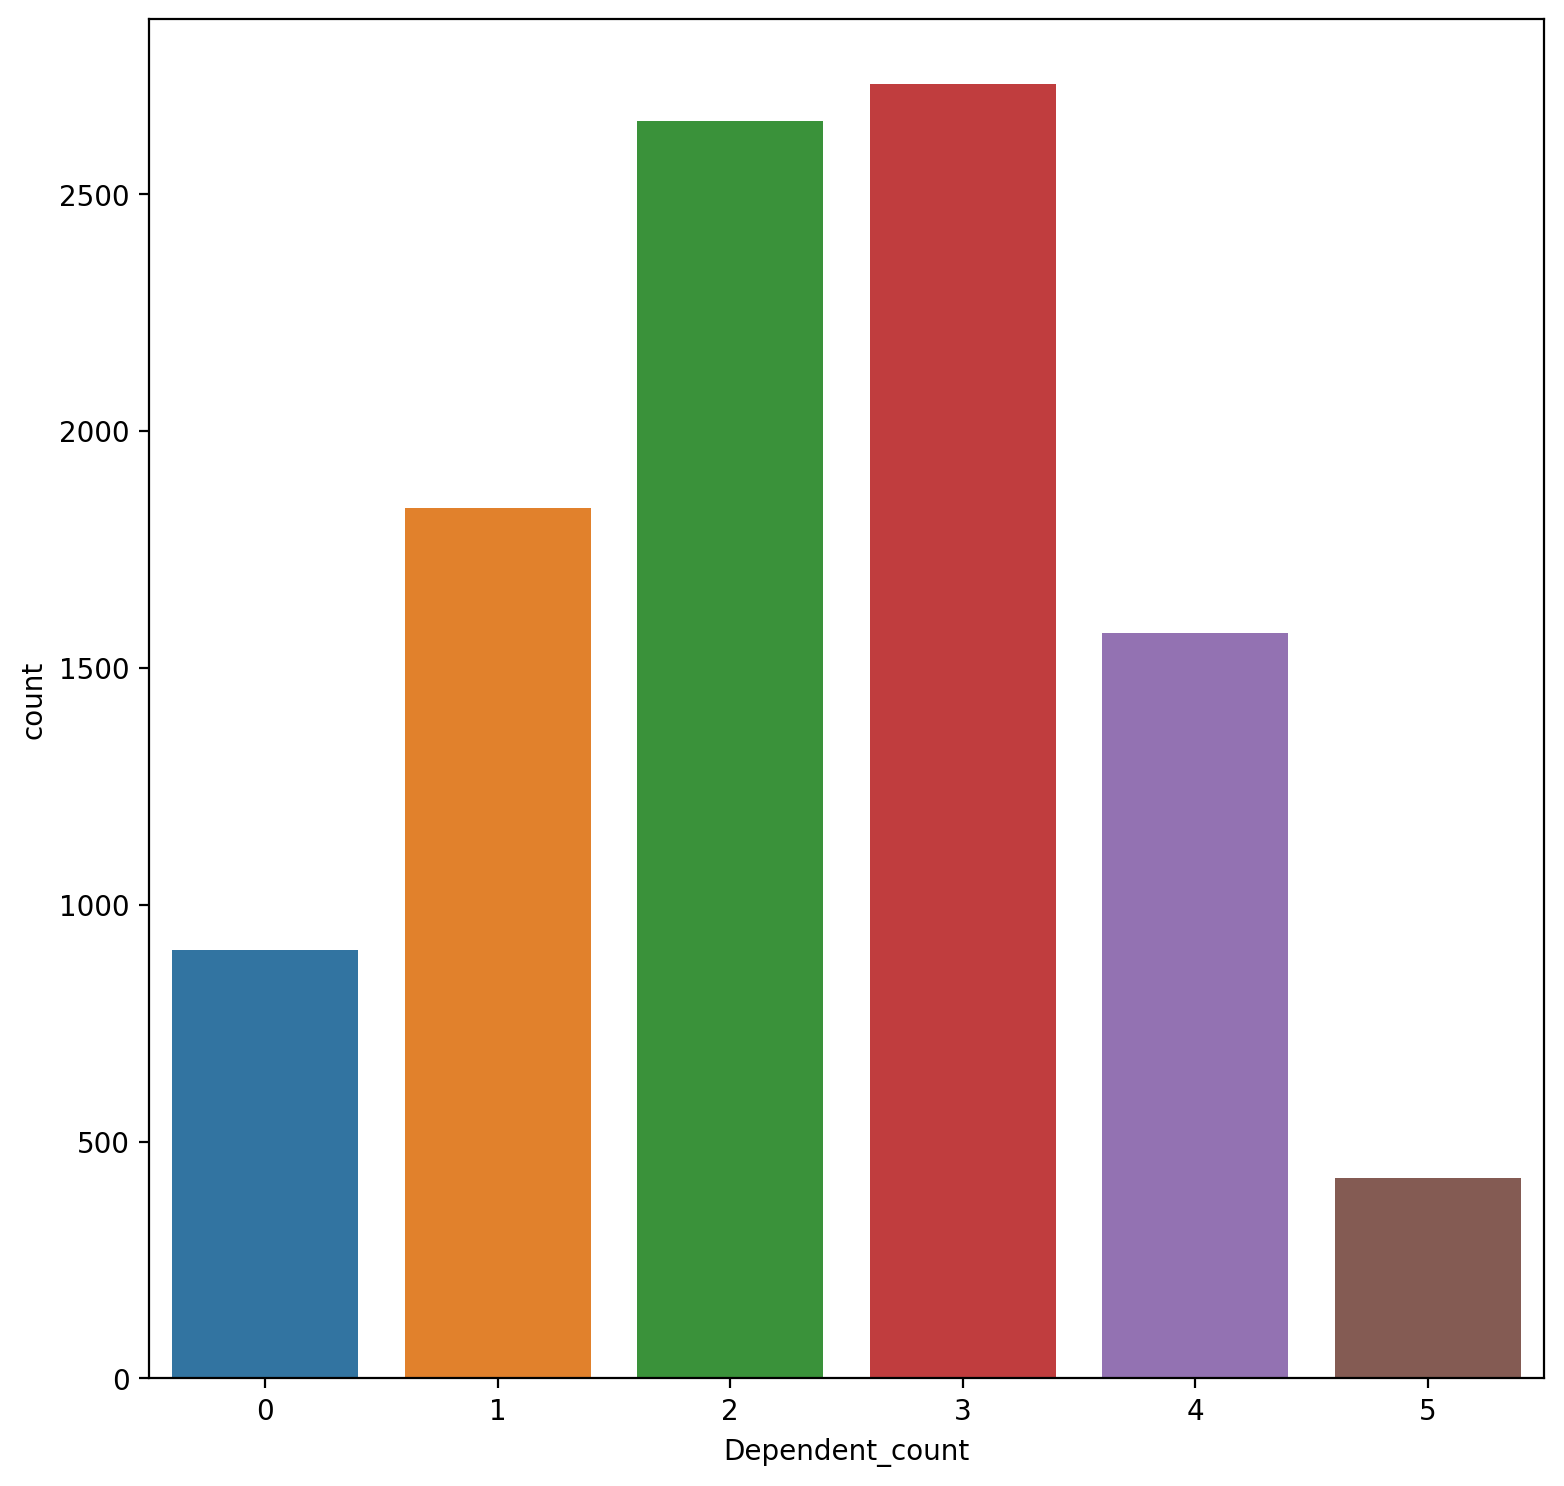

In [15]:
sns.countplot(x='Dependent_count',data=data )

# 2 

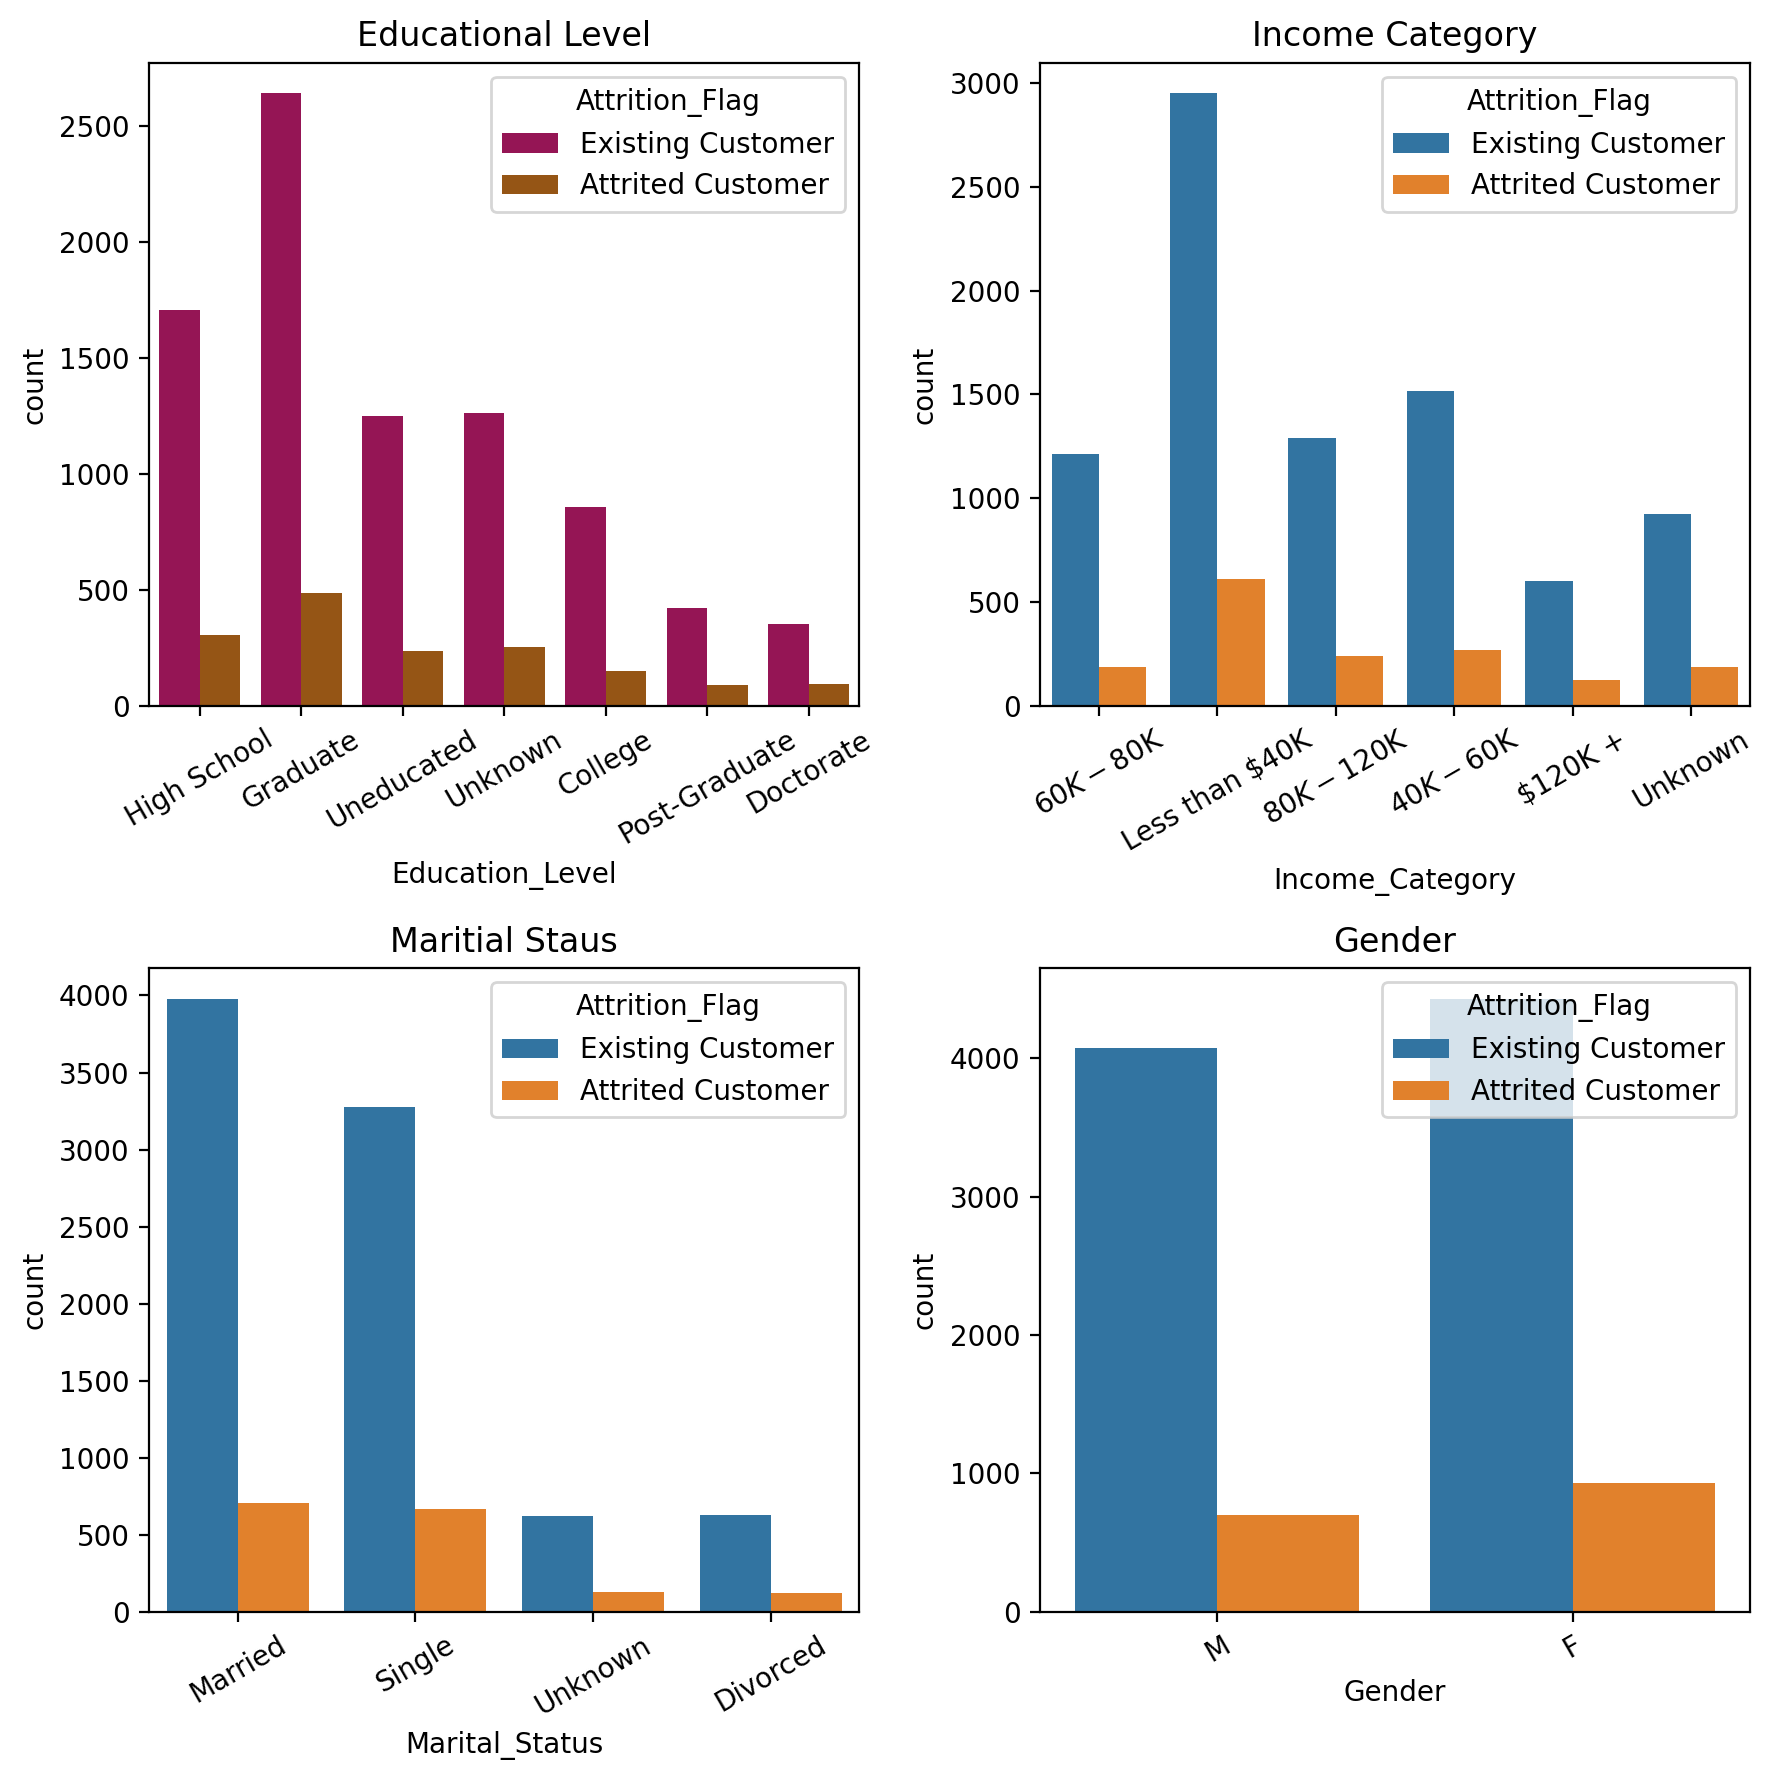

In [16]:

plt.subplot(2,2,1)
sns.countplot(data=data , x='Education_Level',hue='Attrition_Flag',palette='brg')
plt.xticks(rotation=30)
plt.title('Educational Level')

plt.subplot(2,2,2)
sns.countplot(data=data , x='Income_Category',hue='Attrition_Flag')
plt.xticks(rotation=30)
plt.title('Income Category')
    
plt.subplot(2,2,3)
sns.countplot(data=data , x='Marital_Status',hue='Attrition_Flag')
plt.xticks(rotation=30)
plt.title('Maritial Staus')

plt.subplot(2,2,4)
sns.countplot(data=data , x='Gender',hue='Attrition_Flag')
plt.xticks(rotation=30)
plt.title('Gender')





# x = data.groupby('Attrition_Flag')['Total_Relationship_Count'].sum()
# label = ['Attrited Customer','Existing Customer']
# plt.pie(x,labels=label,autopct = '%.2f%%')
# plt.title('Attrition_Flag')
plt.tight_layout()
plt.show()

# matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)




# 3

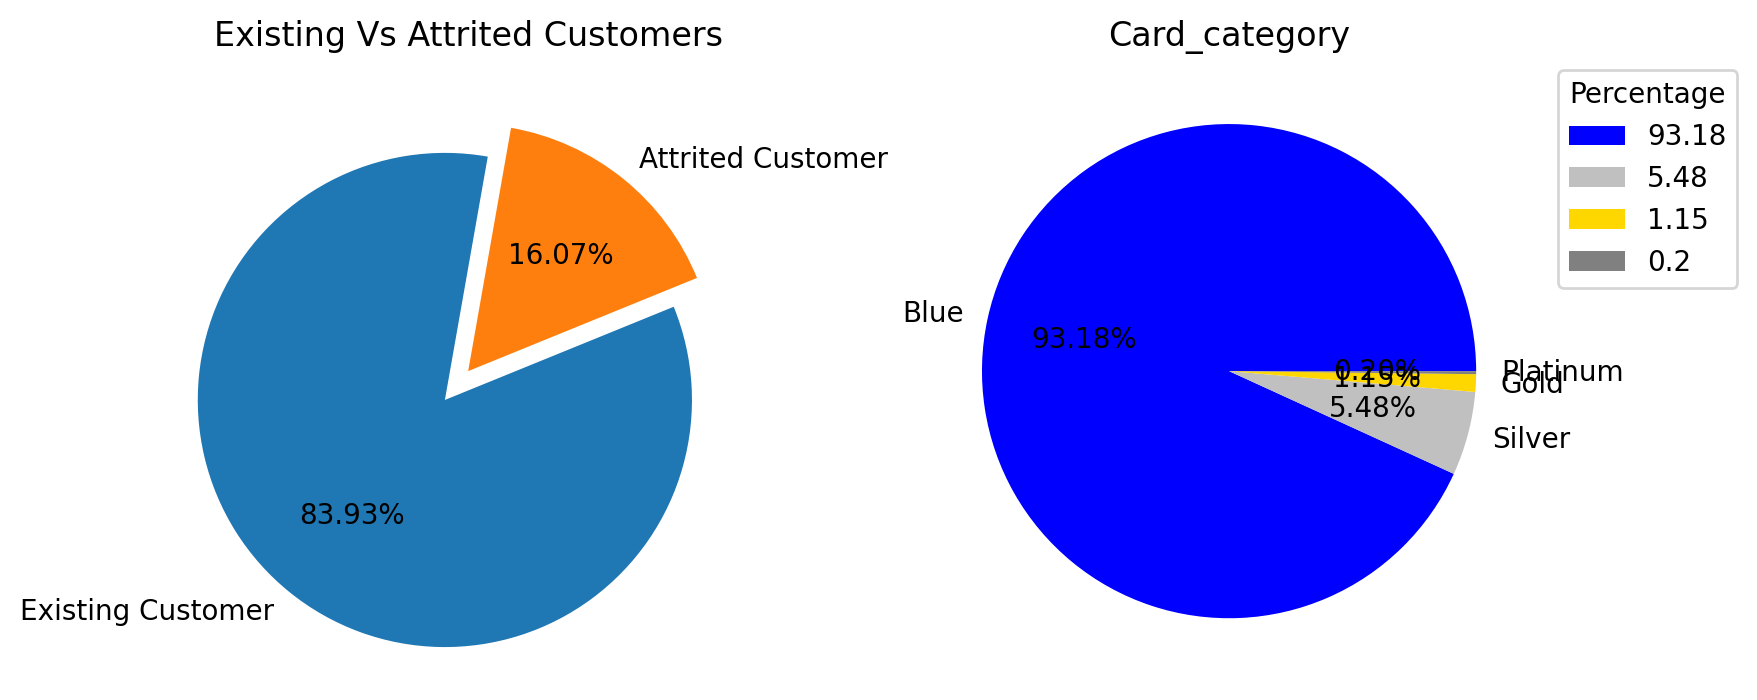

In [17]:
plt.rcParams['figure.figsize']=[9,9]
plt.rcParams['figure.dpi']=200
plt.subplot(221)
x=data['Attrition_Flag'].value_counts()
label = ['Existing Customer','Attrited Customer']
plt.pie(x,labels=label,autopct = '%.2f%%' , explode=(0.15,0),startangle=80)
plt.title('Existing Vs Attrited Customers')


plt.subplot(222)
x=data['Card_Category'].value_counts()
label = ['Blue','Silver','Gold','Platinum']
col=['Blue','Silver','Gold','grey']
x=x/data.shape[0]*100
plt.pie(x,labels=label,autopct = '%.2f%%',colors=col)
plt.legend(round(x,2),bbox_to_anchor=(1.01,1.01),title='Percentage')
plt.title('Card_category')
plt.show()


# 4

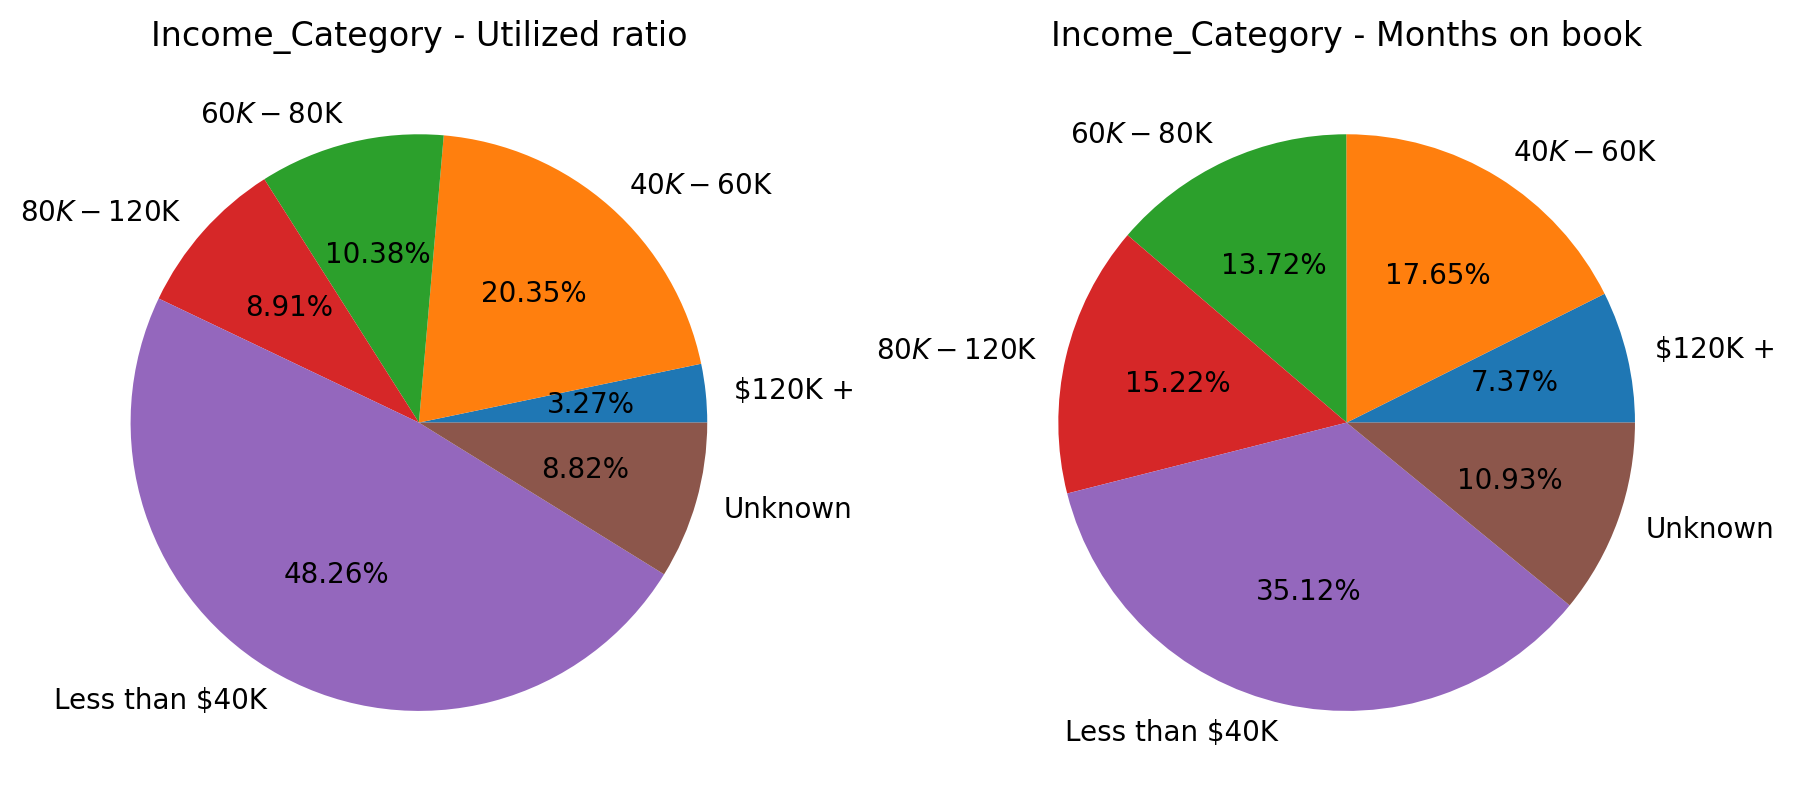

In [18]:
# IMP

plt.subplot(121)
label = [i[0] for i in list(data.groupby('Income_Category')['Income_Category'])]
x = data.groupby('Income_Category')['Avg_Utilization_Ratio'].sum()
plt.pie(x,labels=label,autopct = '%.2f%%')
plt.title('Income_Category - Utilized ratio')
plt.tight_layout()


plt.subplot(122)
label = [i[0] for i in list(data.groupby('Income_Category')['Income_Category'])]
x = data.groupby('Income_Category')['Months_on_book'].sum()
plt.pie(x,labels=label,autopct = '%.2f%%')
plt.title('Income_Category - Months on book')
plt.tight_layout()

# 5

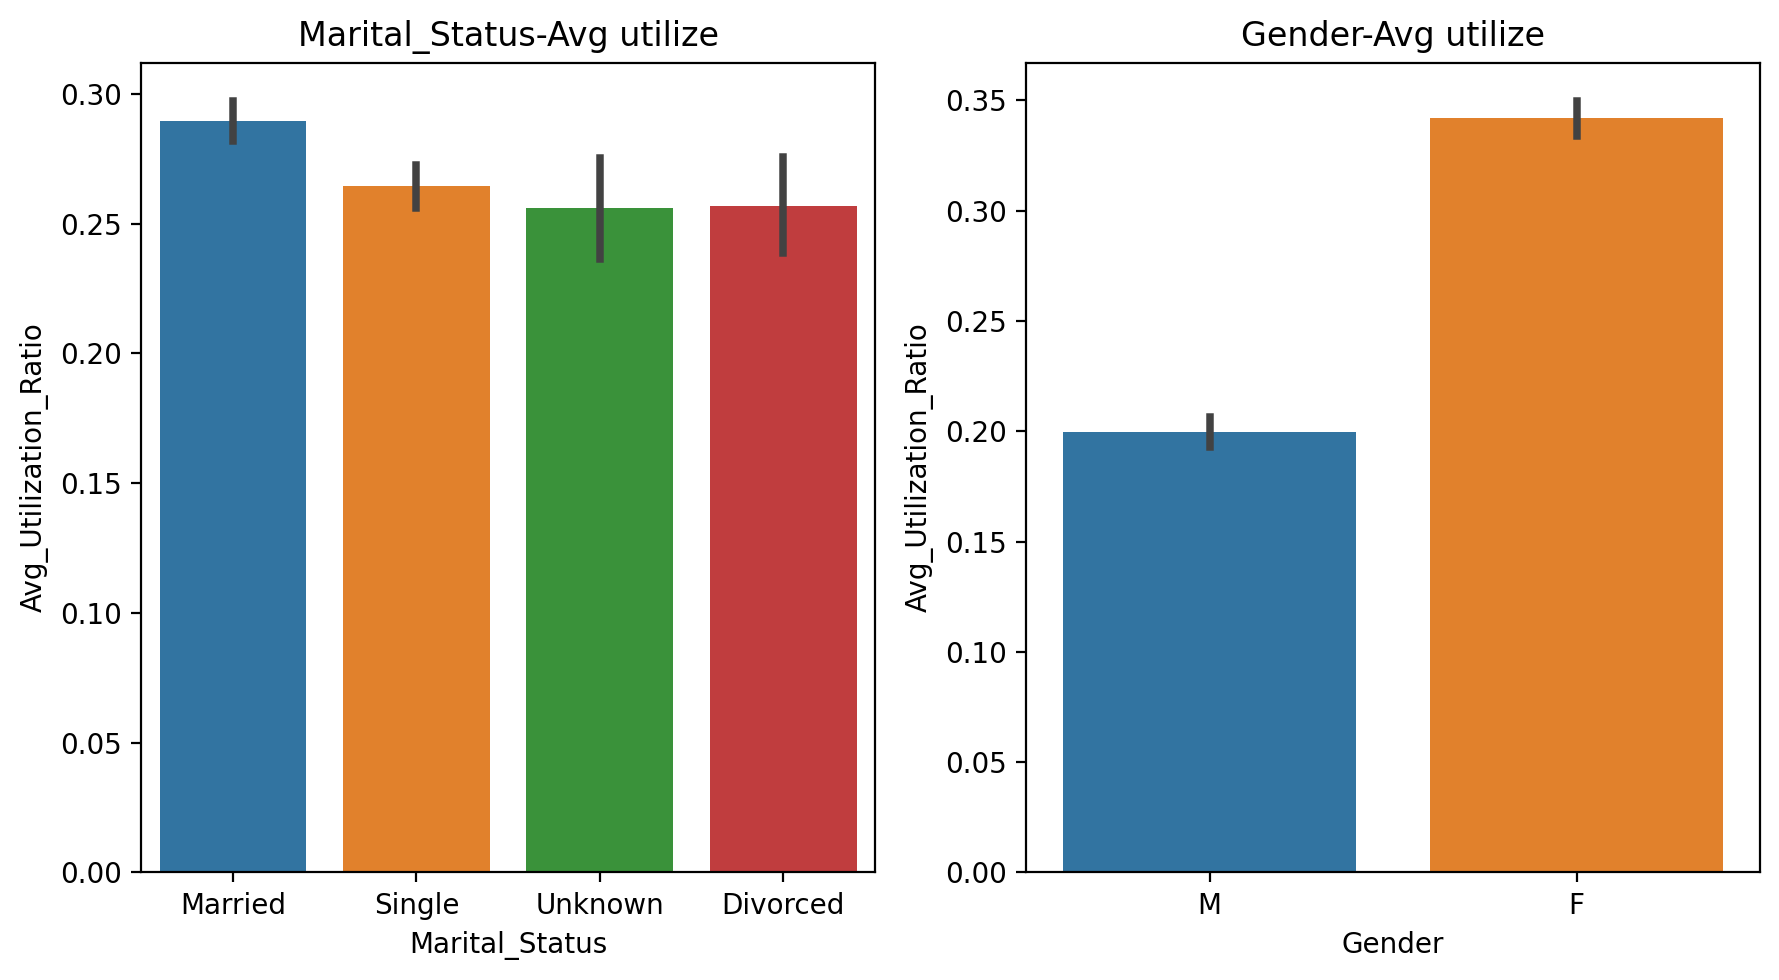

In [19]:
plt.figure(figsize=(9,5))
plt.subplot(121)
sns.barplot(x ='Marital_Status',y= 'Avg_Utilization_Ratio' ,data=data)
plt.title('Marital_Status-Avg utilize')

plt.subplot(122)
sns.barplot(x ='Gender',y= 'Avg_Utilization_Ratio' ,data=data)
plt.title('Gender-Avg utilize')
plt.tight_layout()
plt.show()

t = [col for col in data.columns if data[col].dtype!='O']
for i in t:
    
    sns.distplot(data[i],kde=True)
    plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Total_Trans_Amt'>

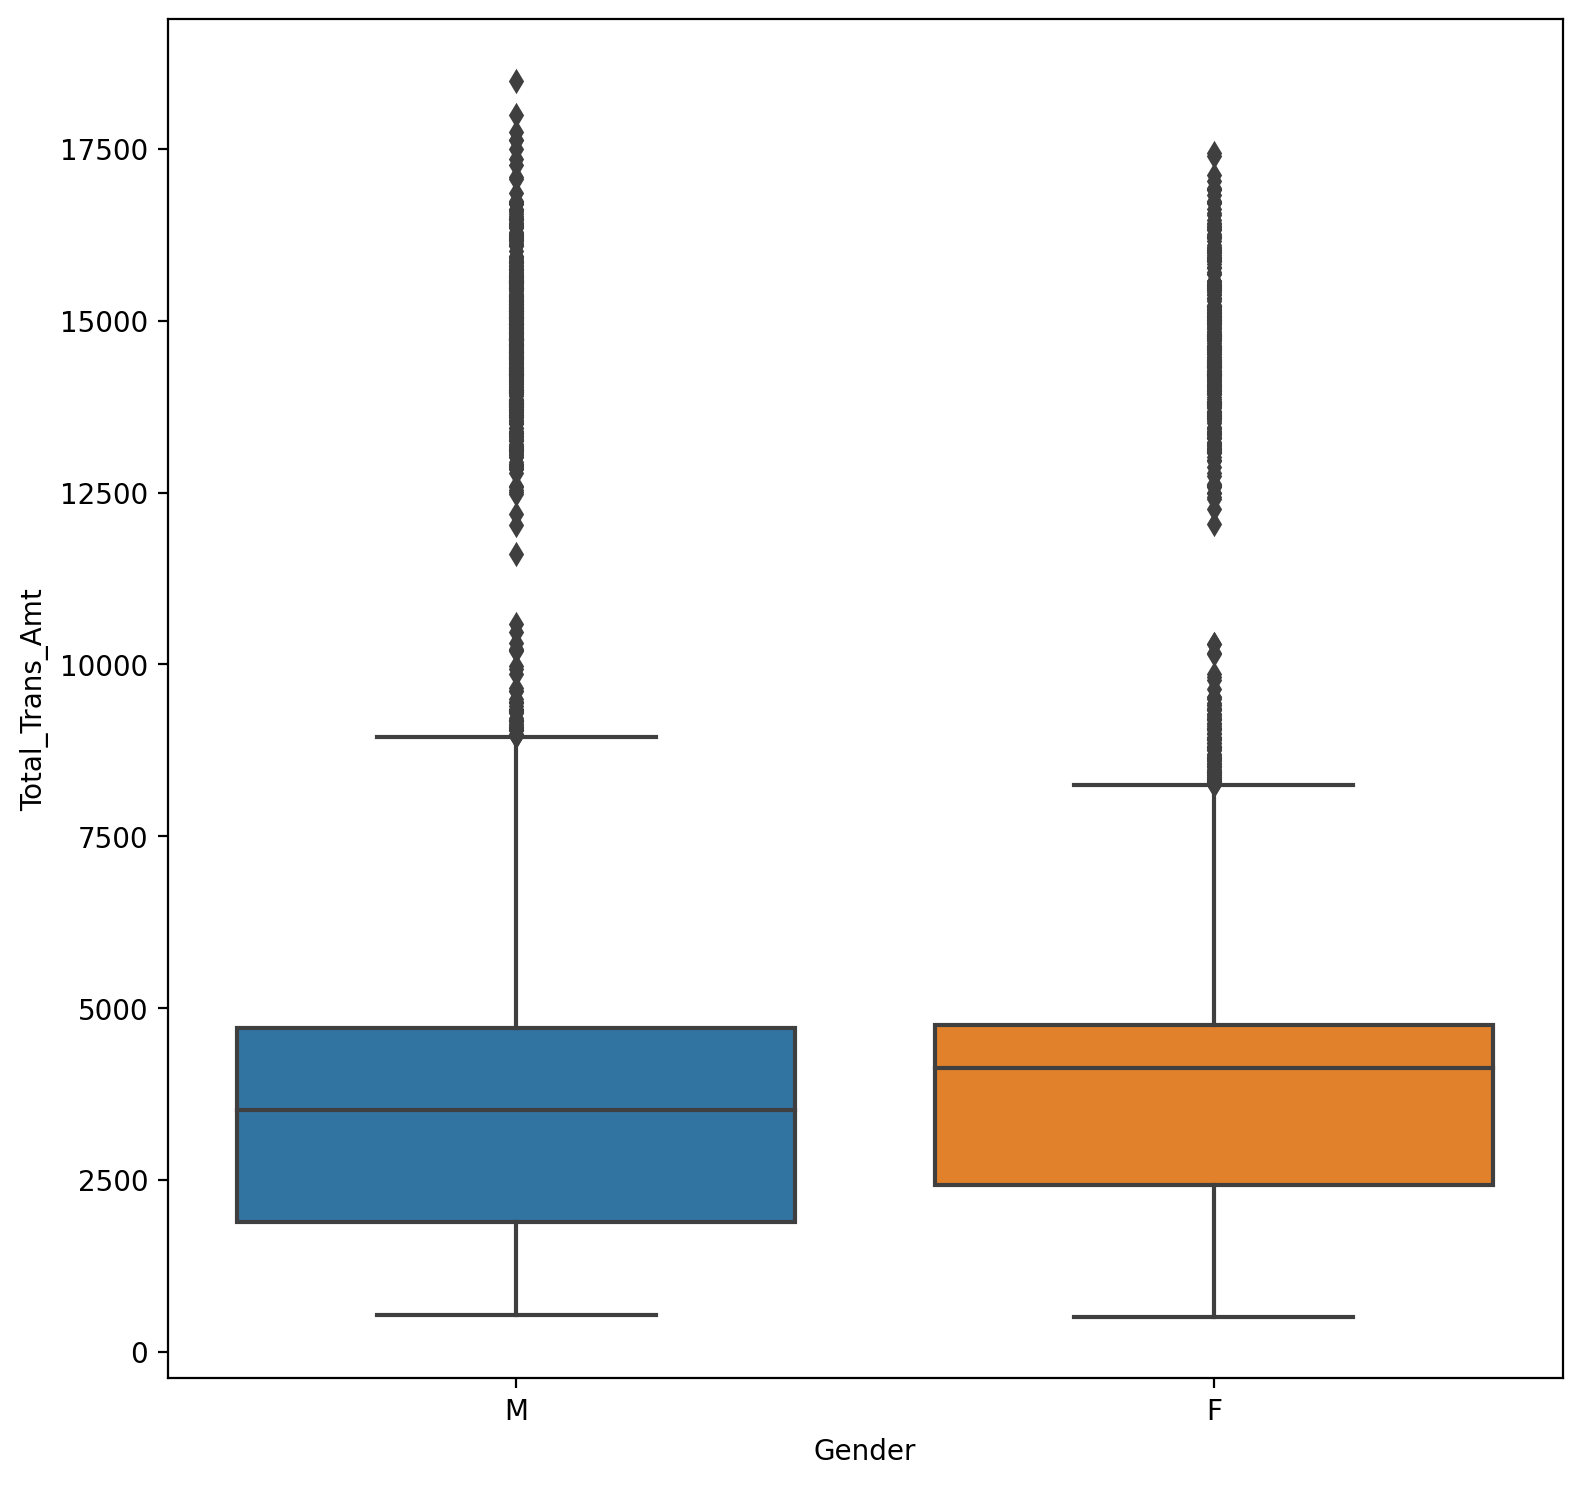

In [20]:
sns.boxplot(x = 'Gender',y='Total_Trans_Amt',data=data)

<AxesSubplot:xlabel='Total_Trans_Amt'>

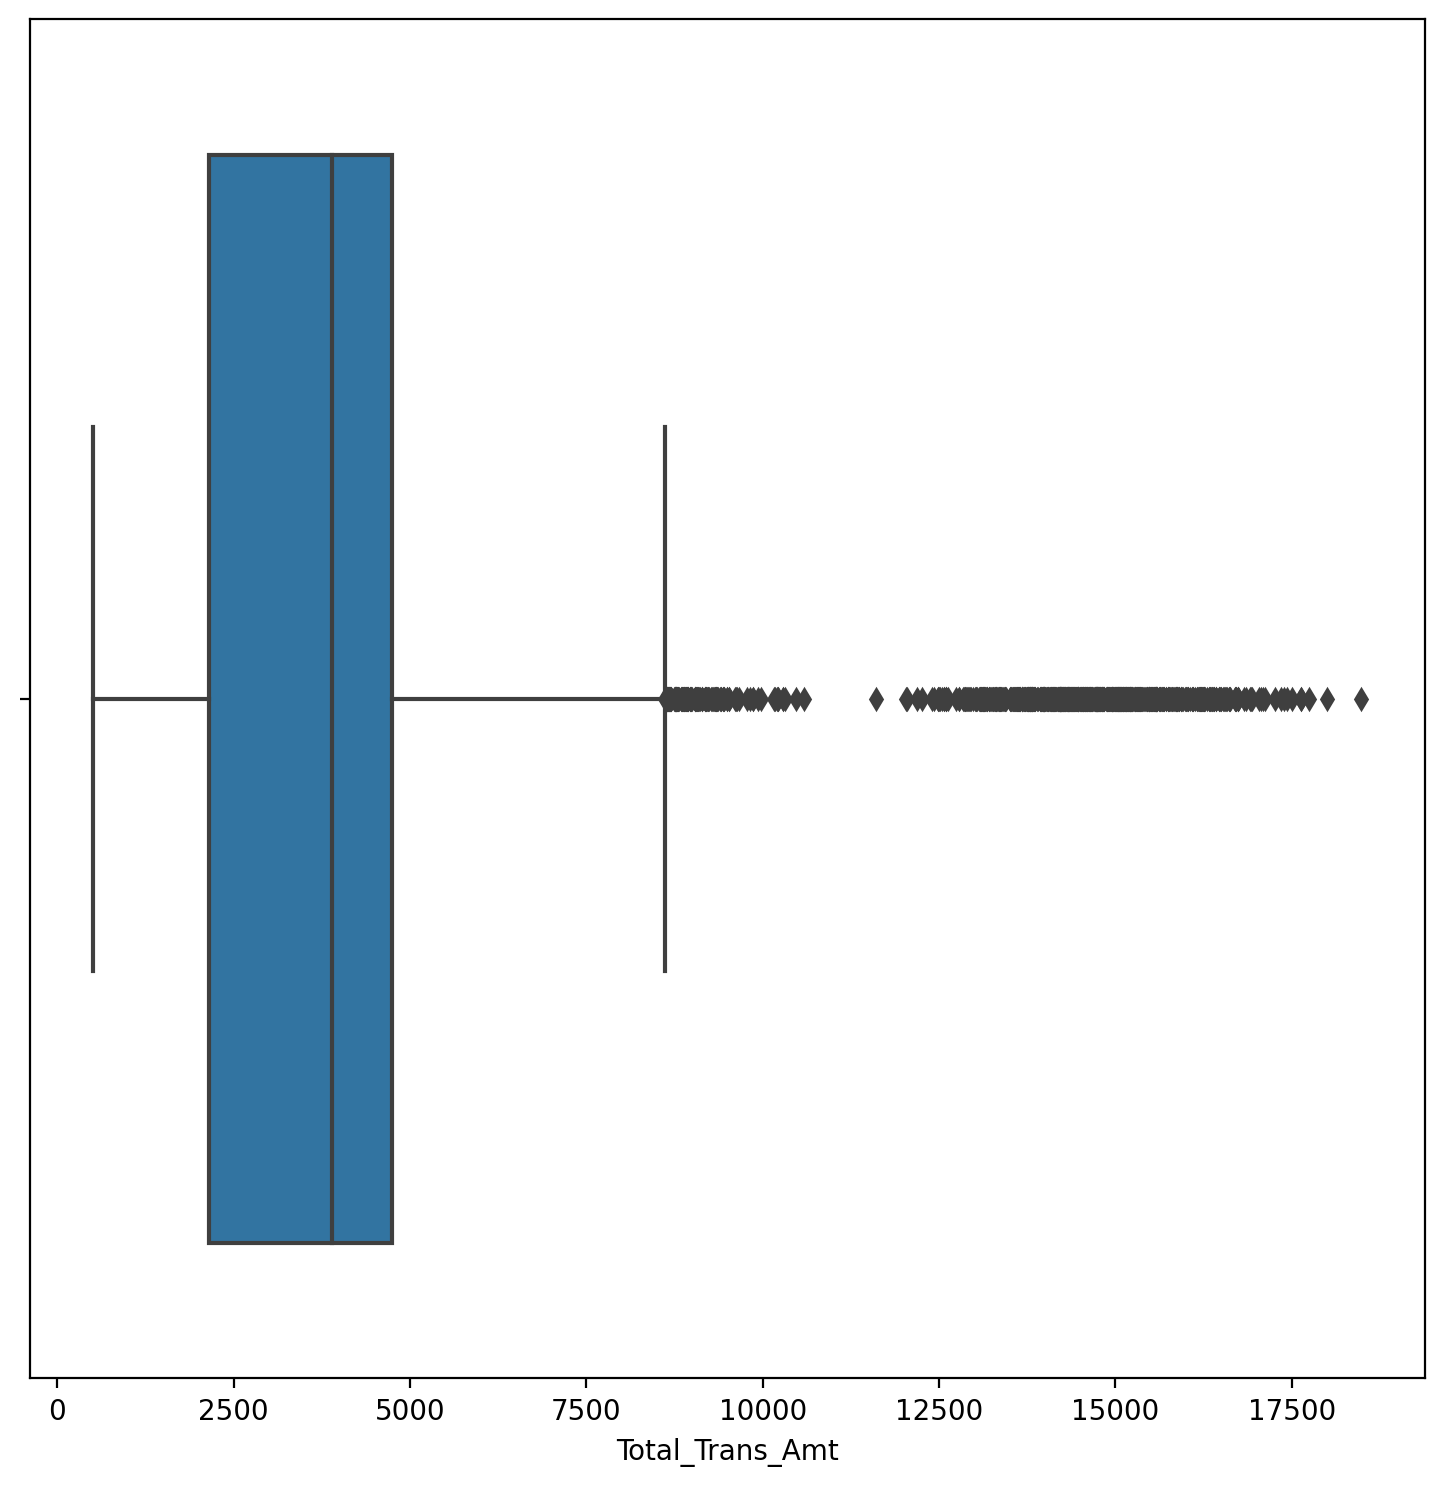

In [67]:
sns.boxplot(x=data.Total_Trans_Amt , hue='Gender' , data=data)

In [22]:
vc_Gender = data.Gender.value_counts()
vc_Gender

F    5358
M    4769
Name: Gender, dtype: int64

In [23]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
gb_Gender = data.groupby('Gender').sum()
gb_Gender

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Gender,,,,,,,,,,,,,,
F,248916,12541,192776,20403,12601,12932,26917811.2,6108180,20809631.2,4042.165,23169697,355516,3823.068,1832.203
M,220227,11219,171071,18207,11108,11933,60497983.9,5667638,54830345.9,3653.754,21430485,301308,3389.608,951.644


In [25]:
data.groupby("Gender").median()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Gender,,,,,,,,,,,,,,
F,46.0,2.0,36.0,4.0,2.0,2.0,3048.0,1247.0,1797.5,0.735,4134.0,70.0,0.710,0.304
M,46.0,2.0,36.0,4.0,2.0,3.0,8902.0,1314.0,7656.0,0.739,3513.0,64.0,0.692,0.100


In [26]:
# np.quantile(data.Total_Trans_Amt , [0.25 , 0.75])
iqr= np.quantile(data.Total_Trans_Amt , [0.25 , 0.75])[1]-np.quantile(data.Total_Trans_Amt , [0.25 , 0.75])[0]

np.quantile(data.Total_Trans_Amt , [0.25 ,0.5  ,0.75]) , iqr

(array([2155.5, 3899. , 4741. ]), 2585.5)

In [27]:
f,m = gb_Gender.loc['F','Total_Trans_Amt']/vc_Gender['F'] , gb_Gender.loc['M','Total_Trans_Amt']/vc_Gender['M']

f,m = [f-iqr , f+iqr] , [m-iqr , m+iqr]
f,m

([1738.818215752146, 6909.818215752146],
 [1908.206227720696, 7079.206227720696])

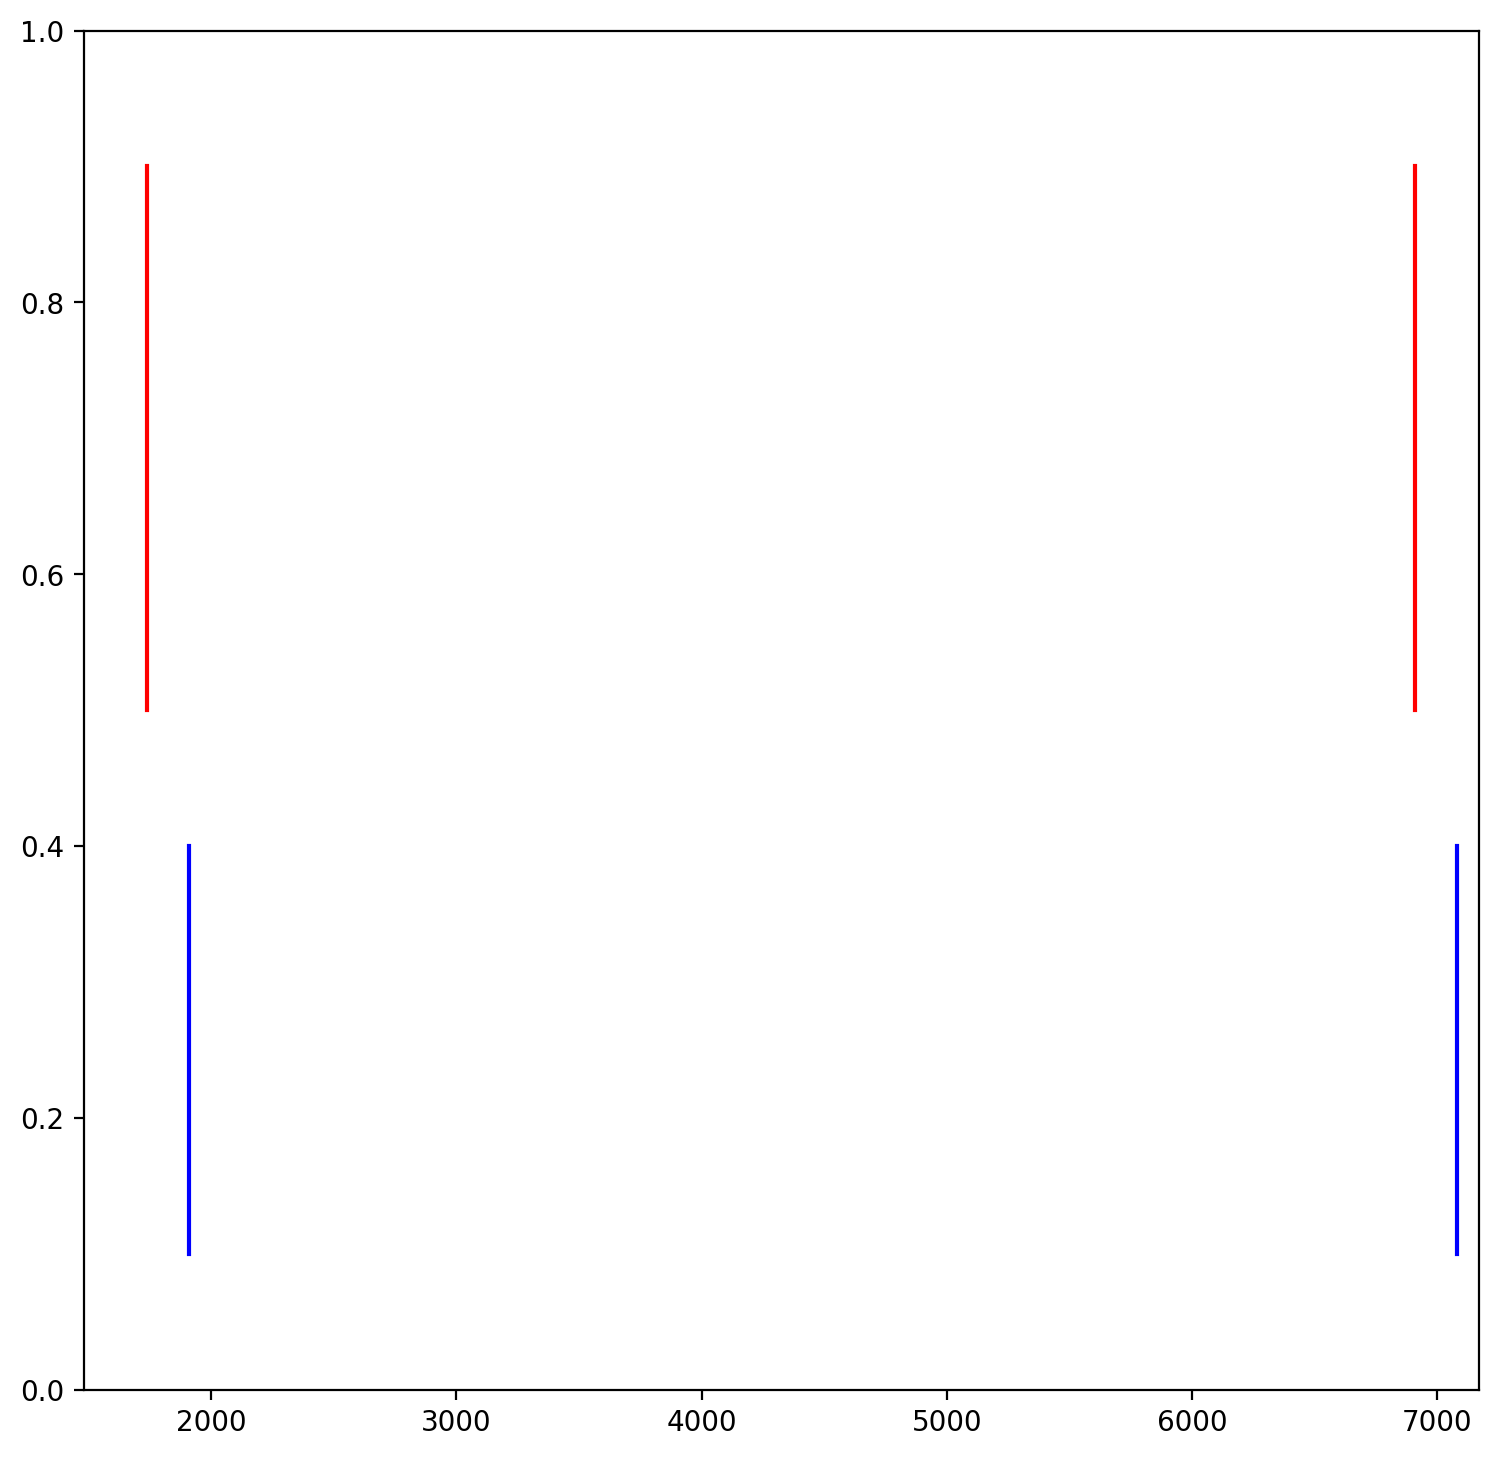

In [28]:
plt.axvline(f[0],c='red' , ymax=0.9 , ymin=0.5)
plt.axvline(f[1], c='red', ymax=0.9 , ymin=0.5)

plt.axvline(m[0],c='blue', ymax=0.4 , ymin=0.1)
plt.axvline(m[1],c='blue', ymax=0.4 , ymin=0.1)

In [29]:
# sns.boxplot(gb_Gender.loc['F','Total_Trans_Amt'])
# sns.boxplot(gb_Gender.loc['M','Total_Trans_Amt'])
# plt.show()

<AxesSubplot:xlabel='Total_Trans_Amt'>

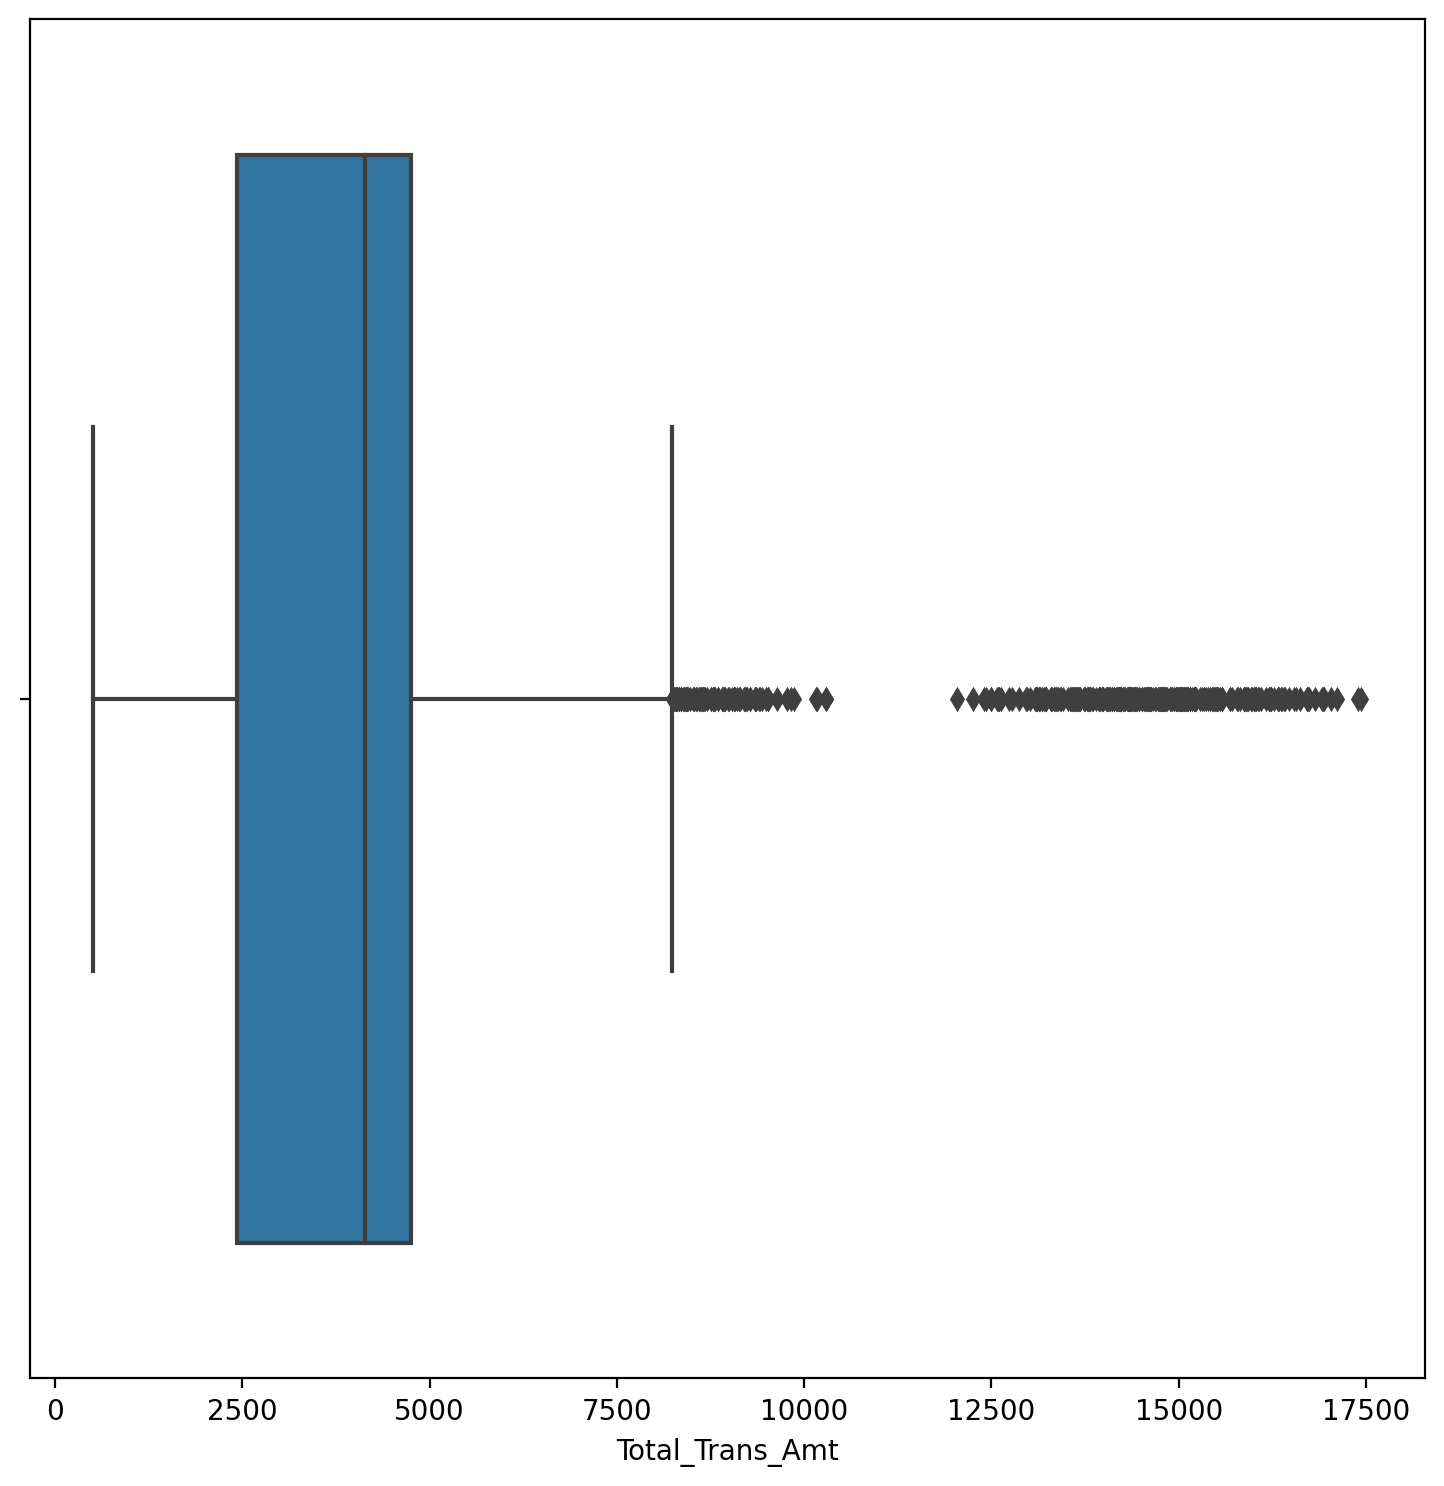

In [30]:
sns.boxplot(data[data['Gender']=='F']['Total_Trans_Amt'] , )

In [31]:
a = data.iloc[:,1:-2]
a

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62


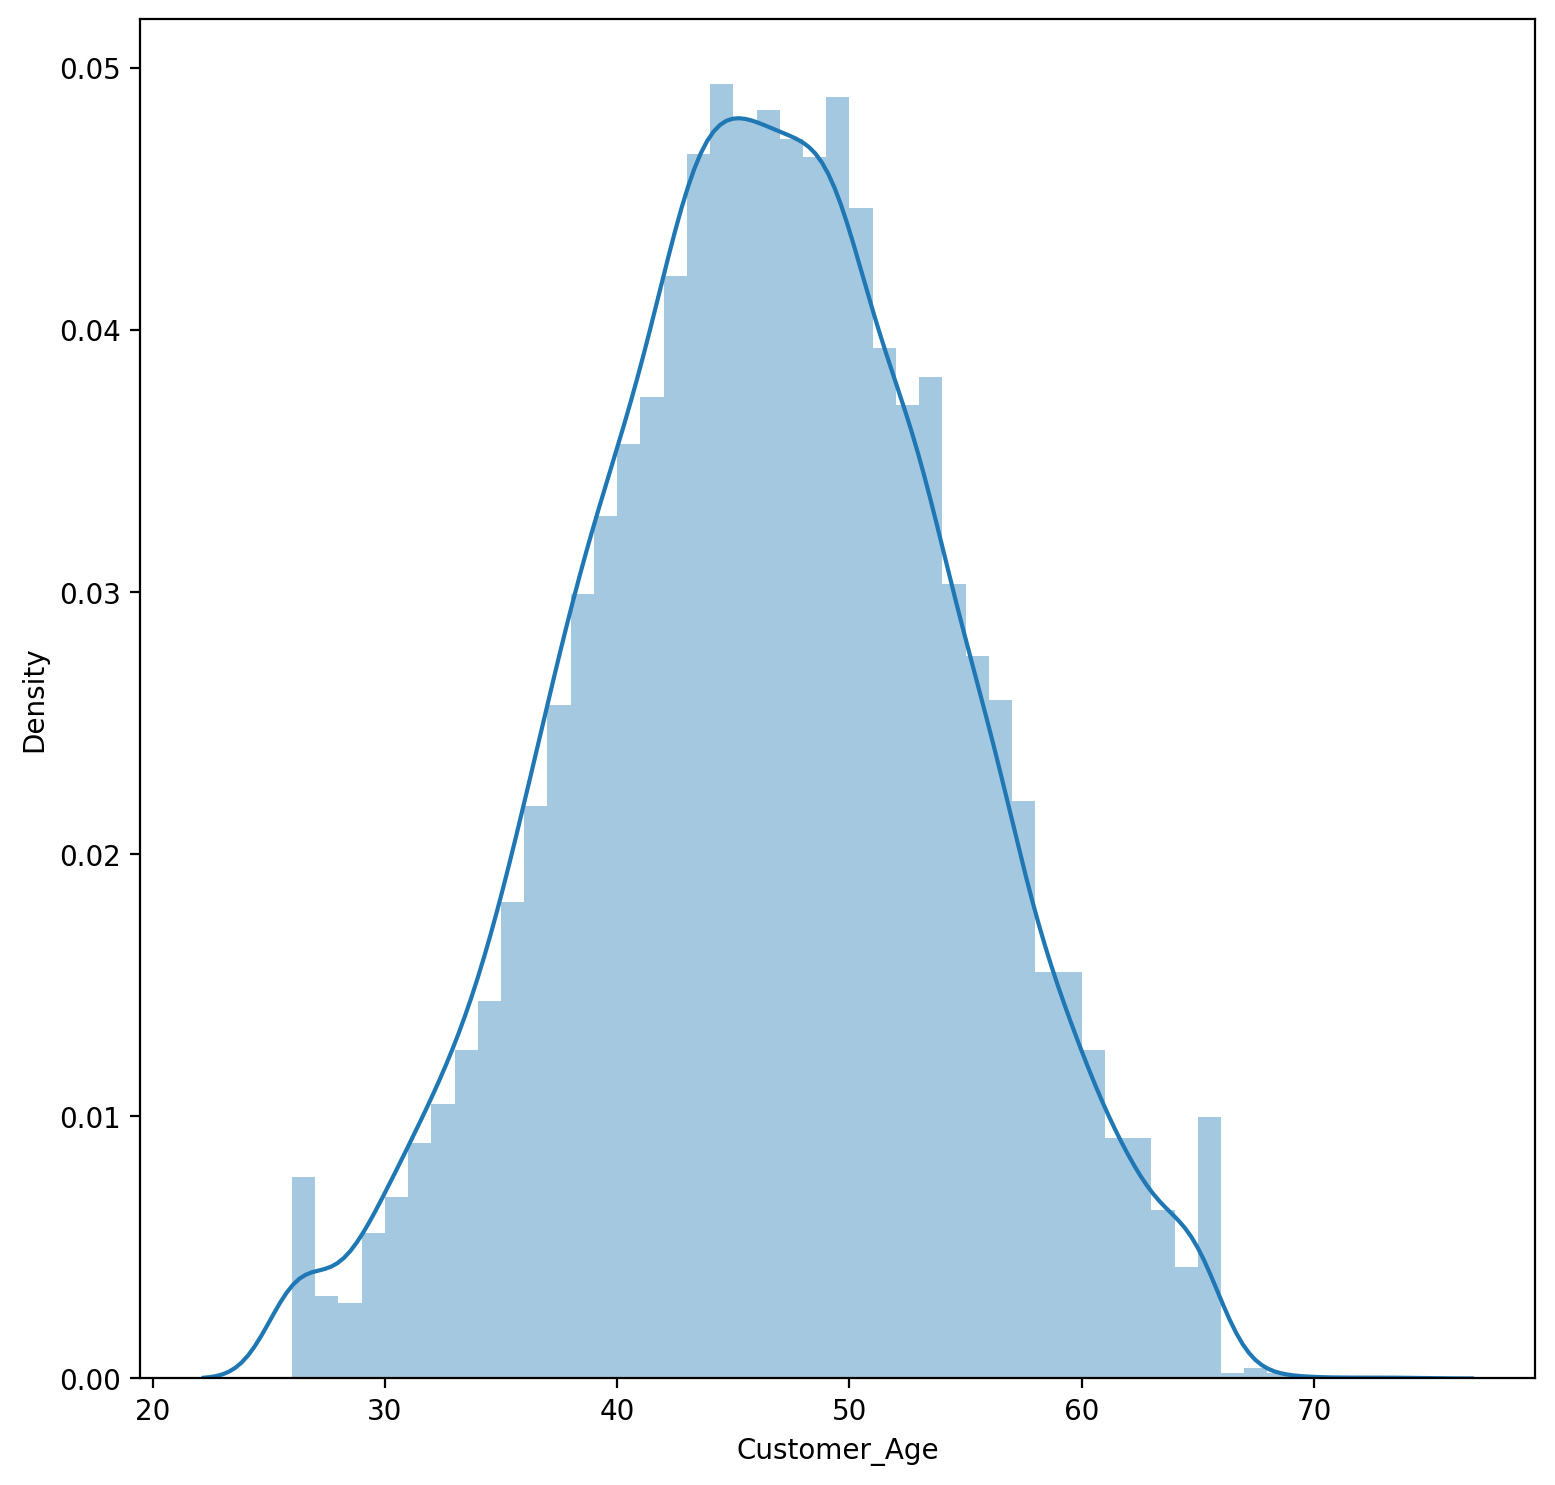

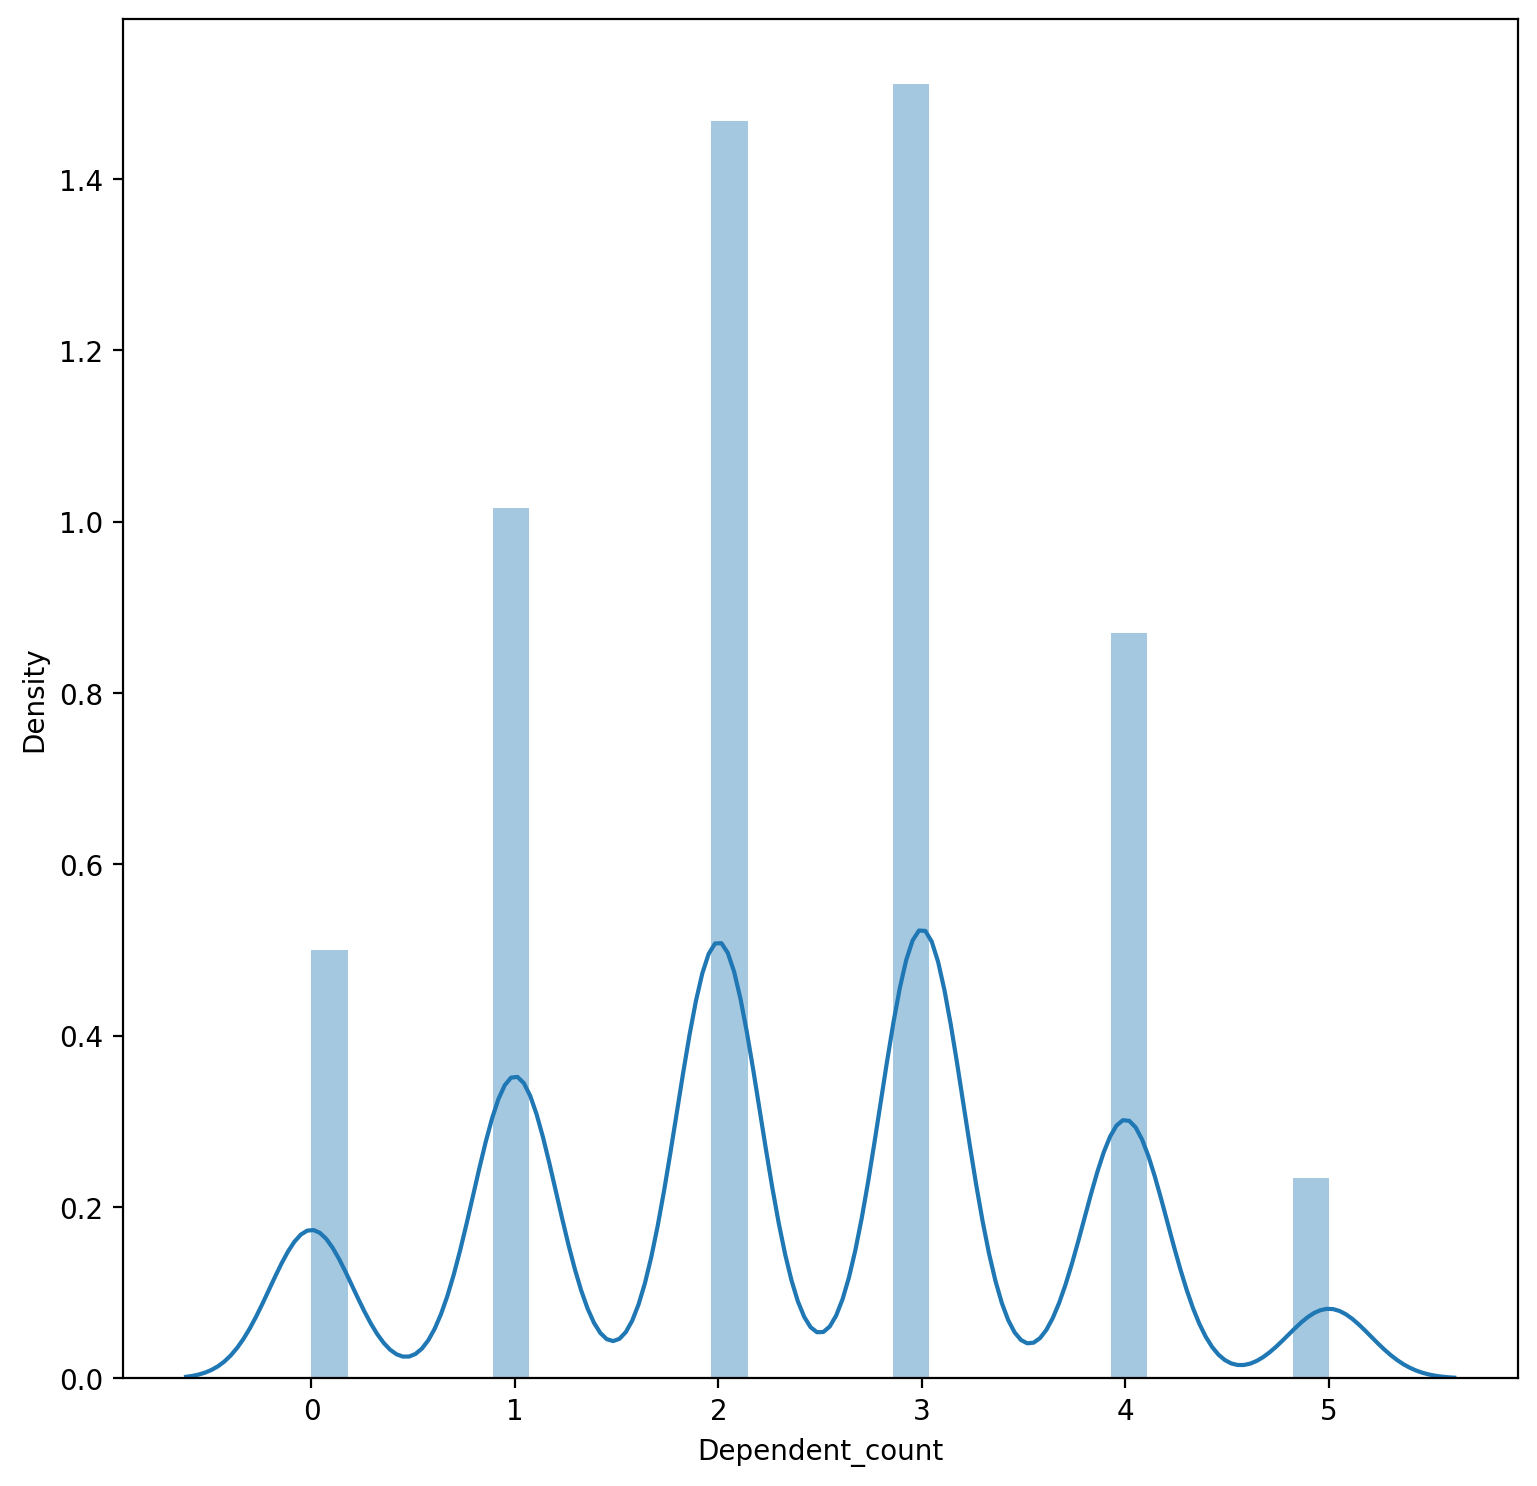

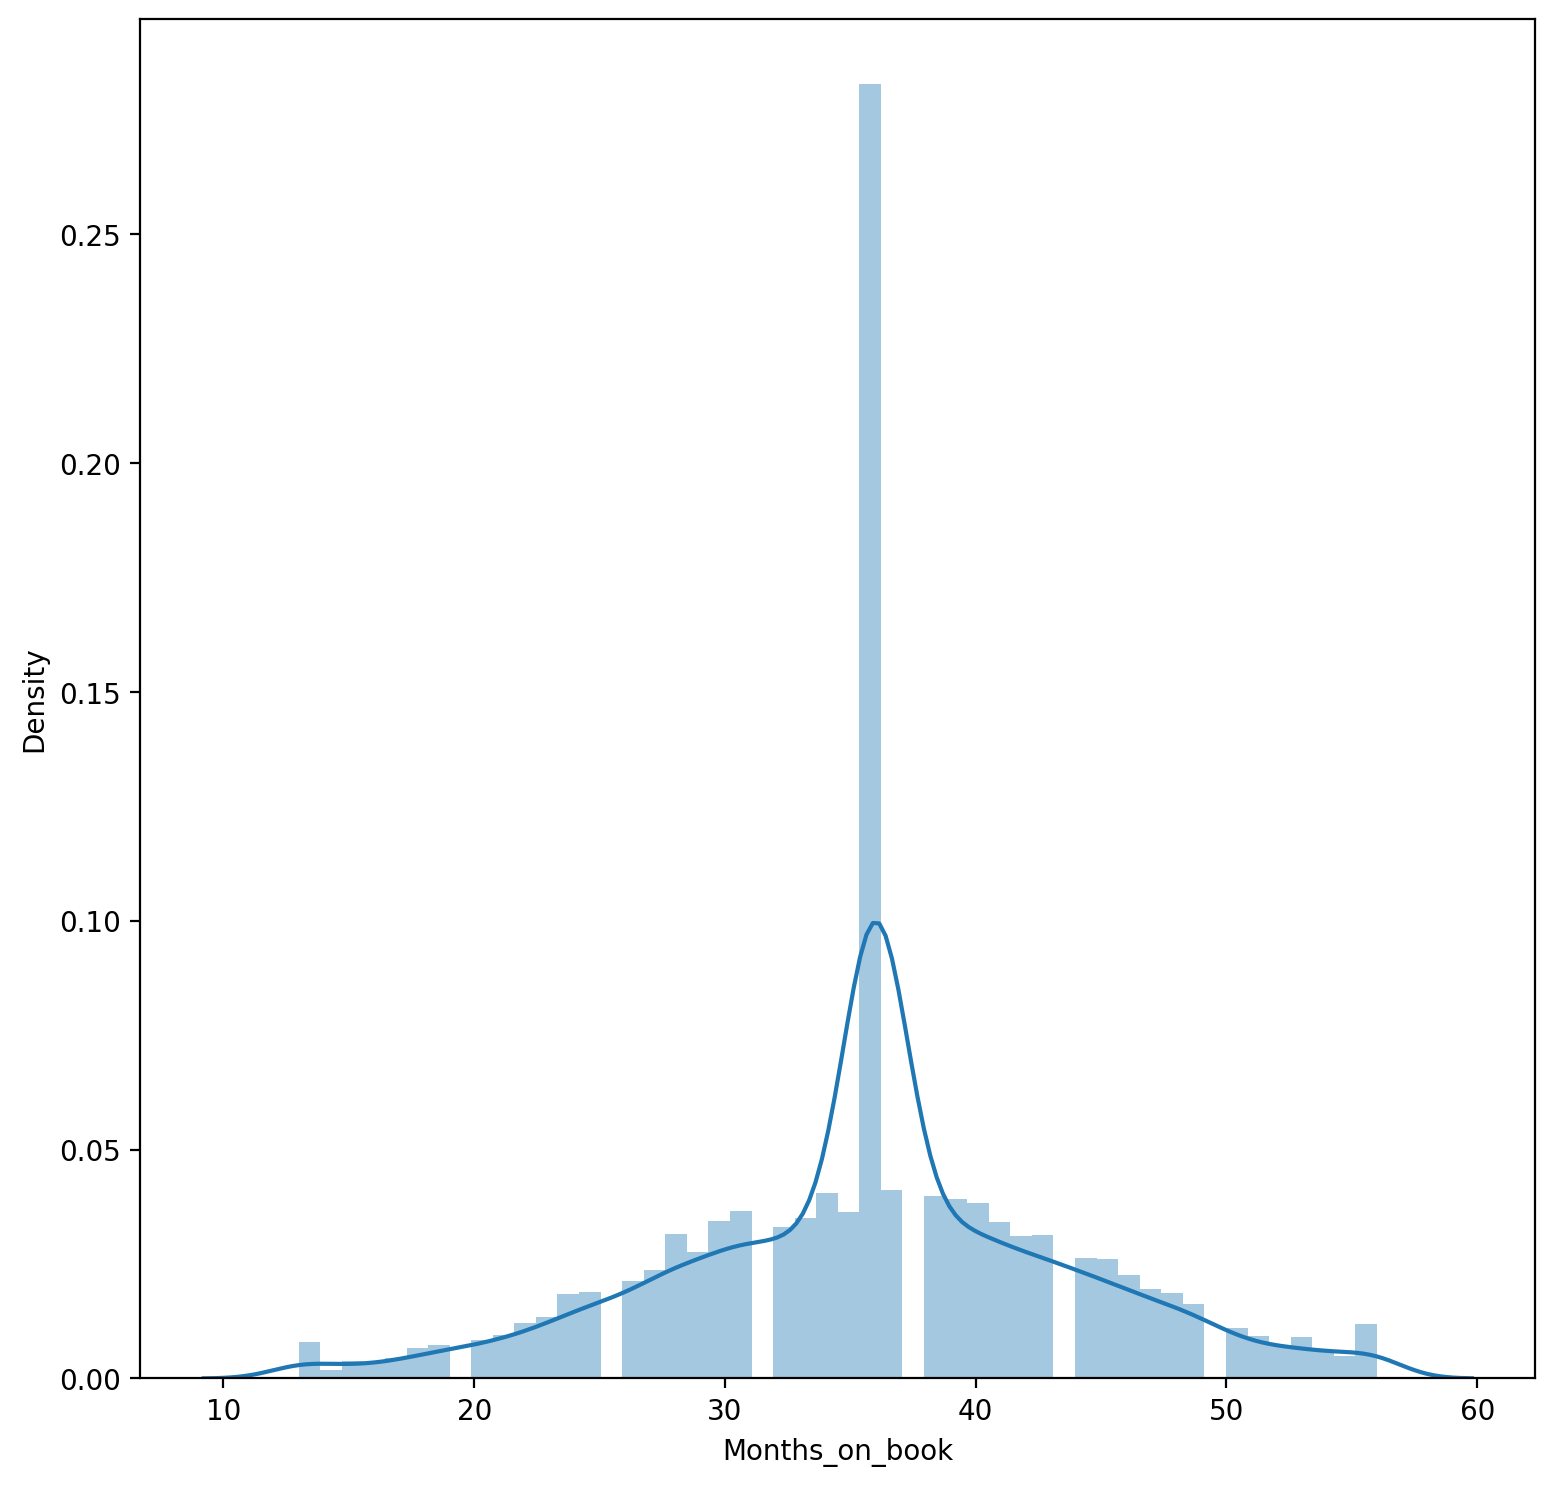

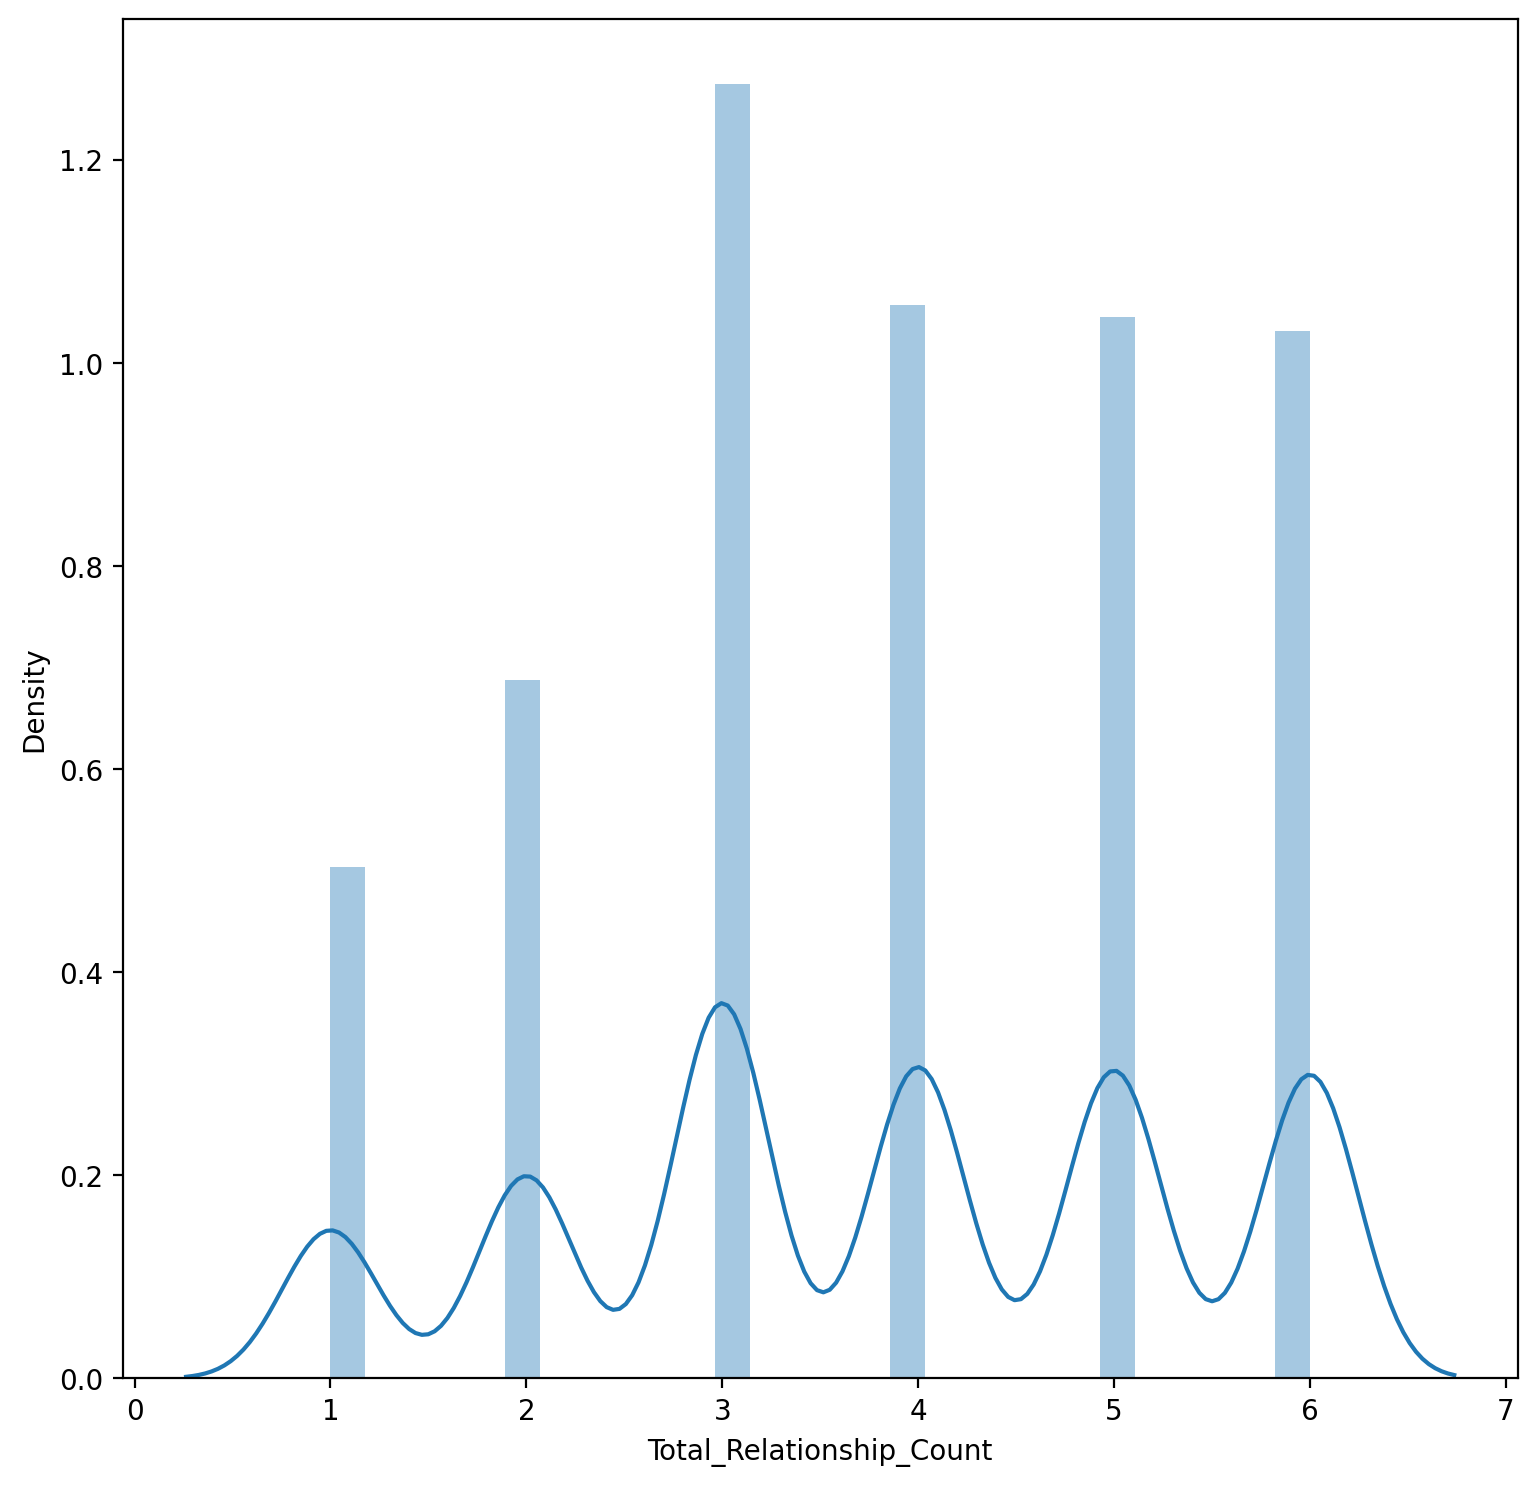

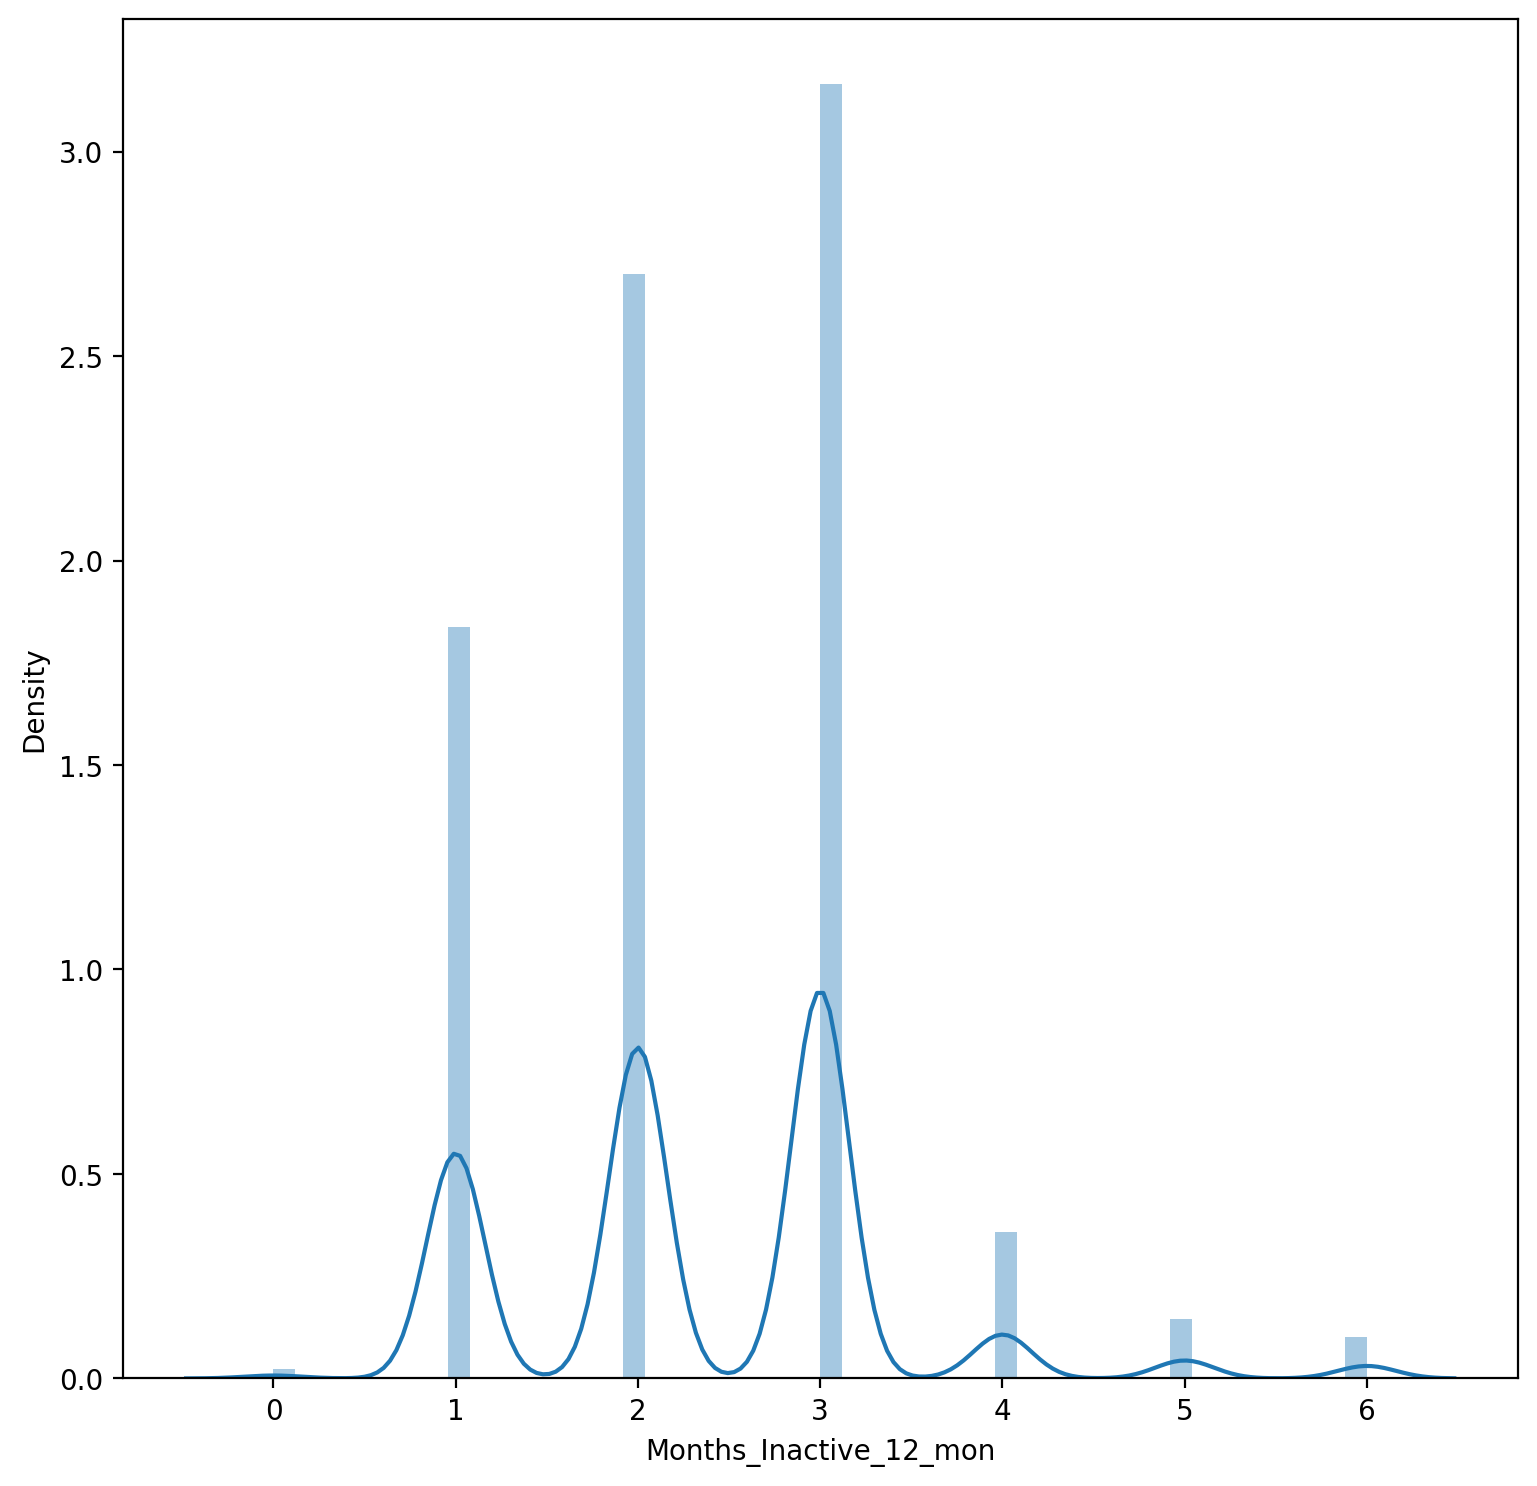

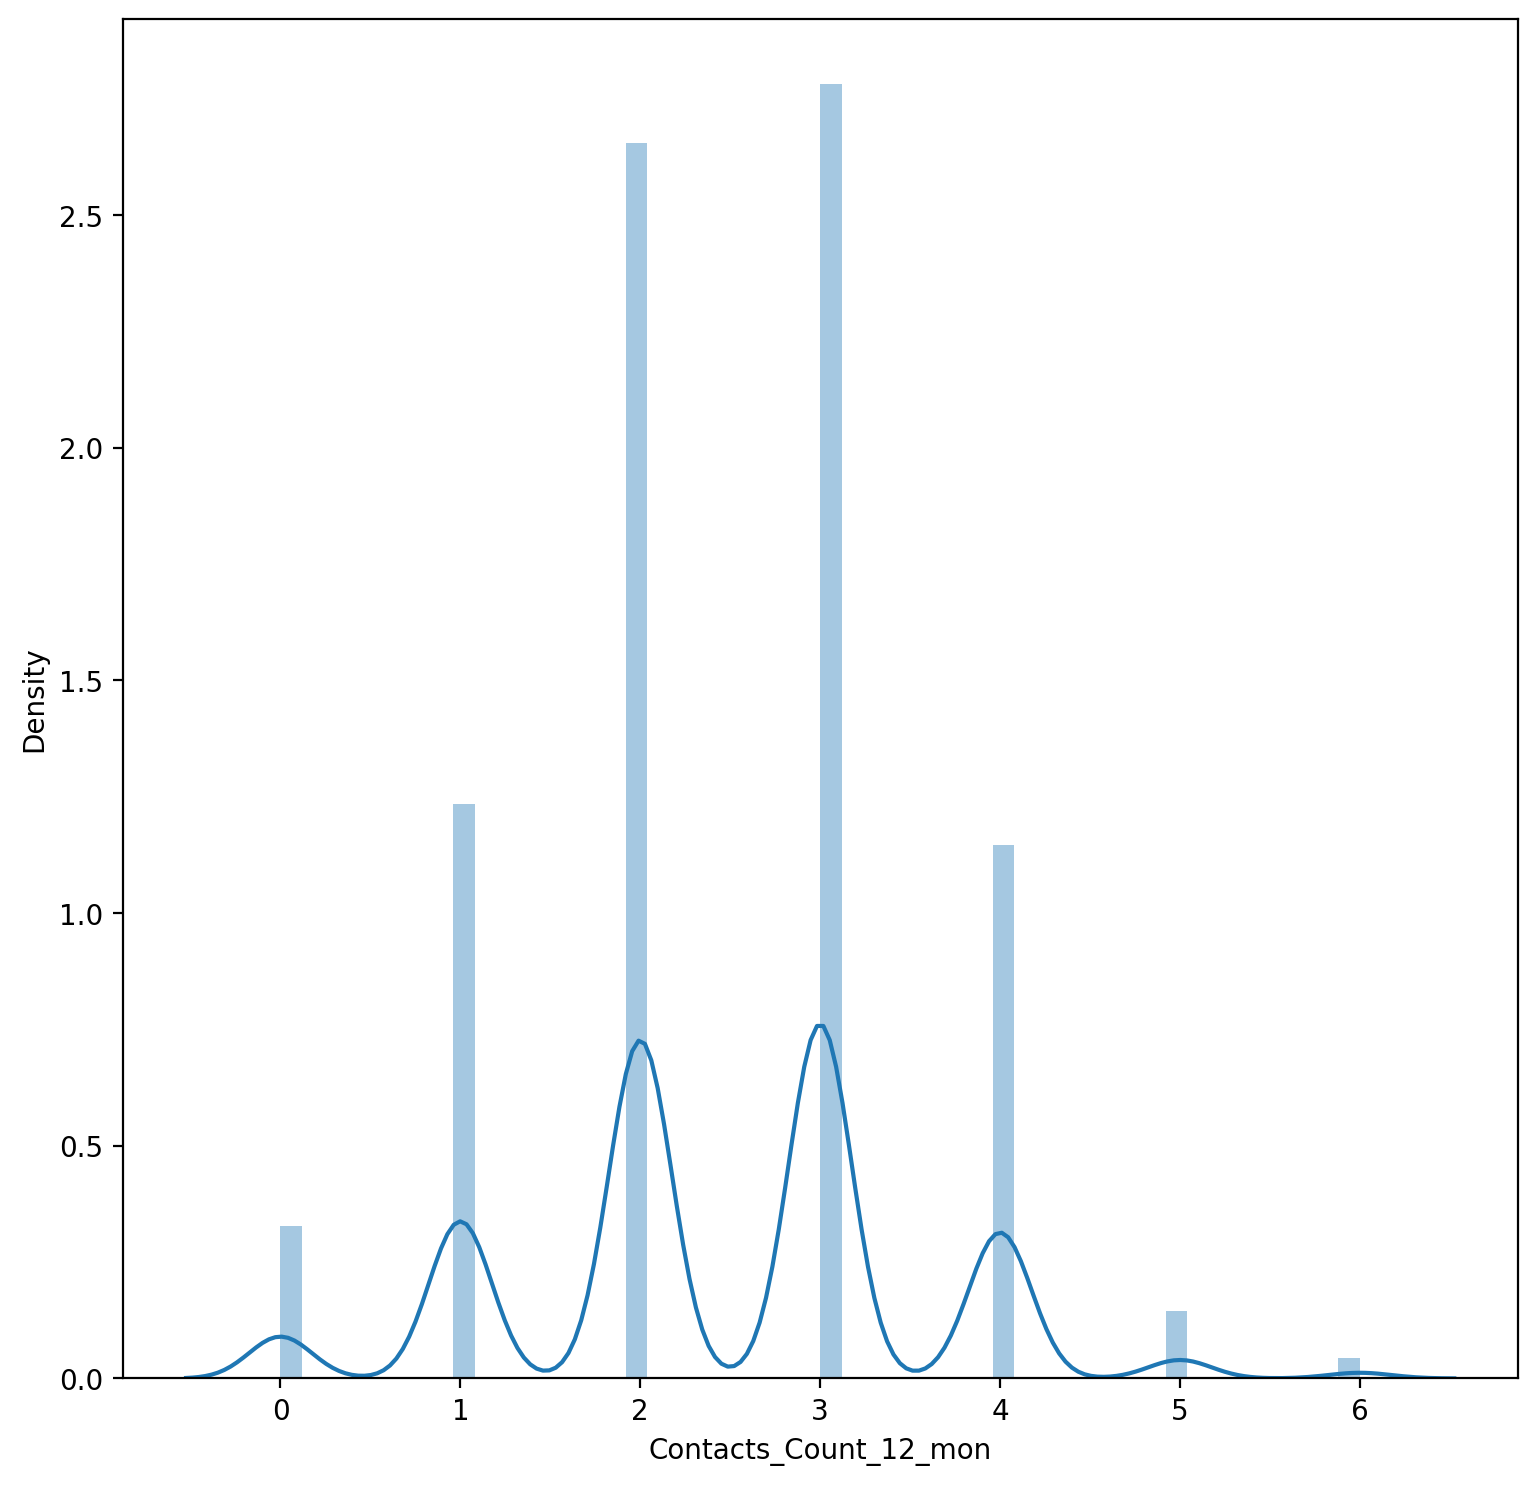

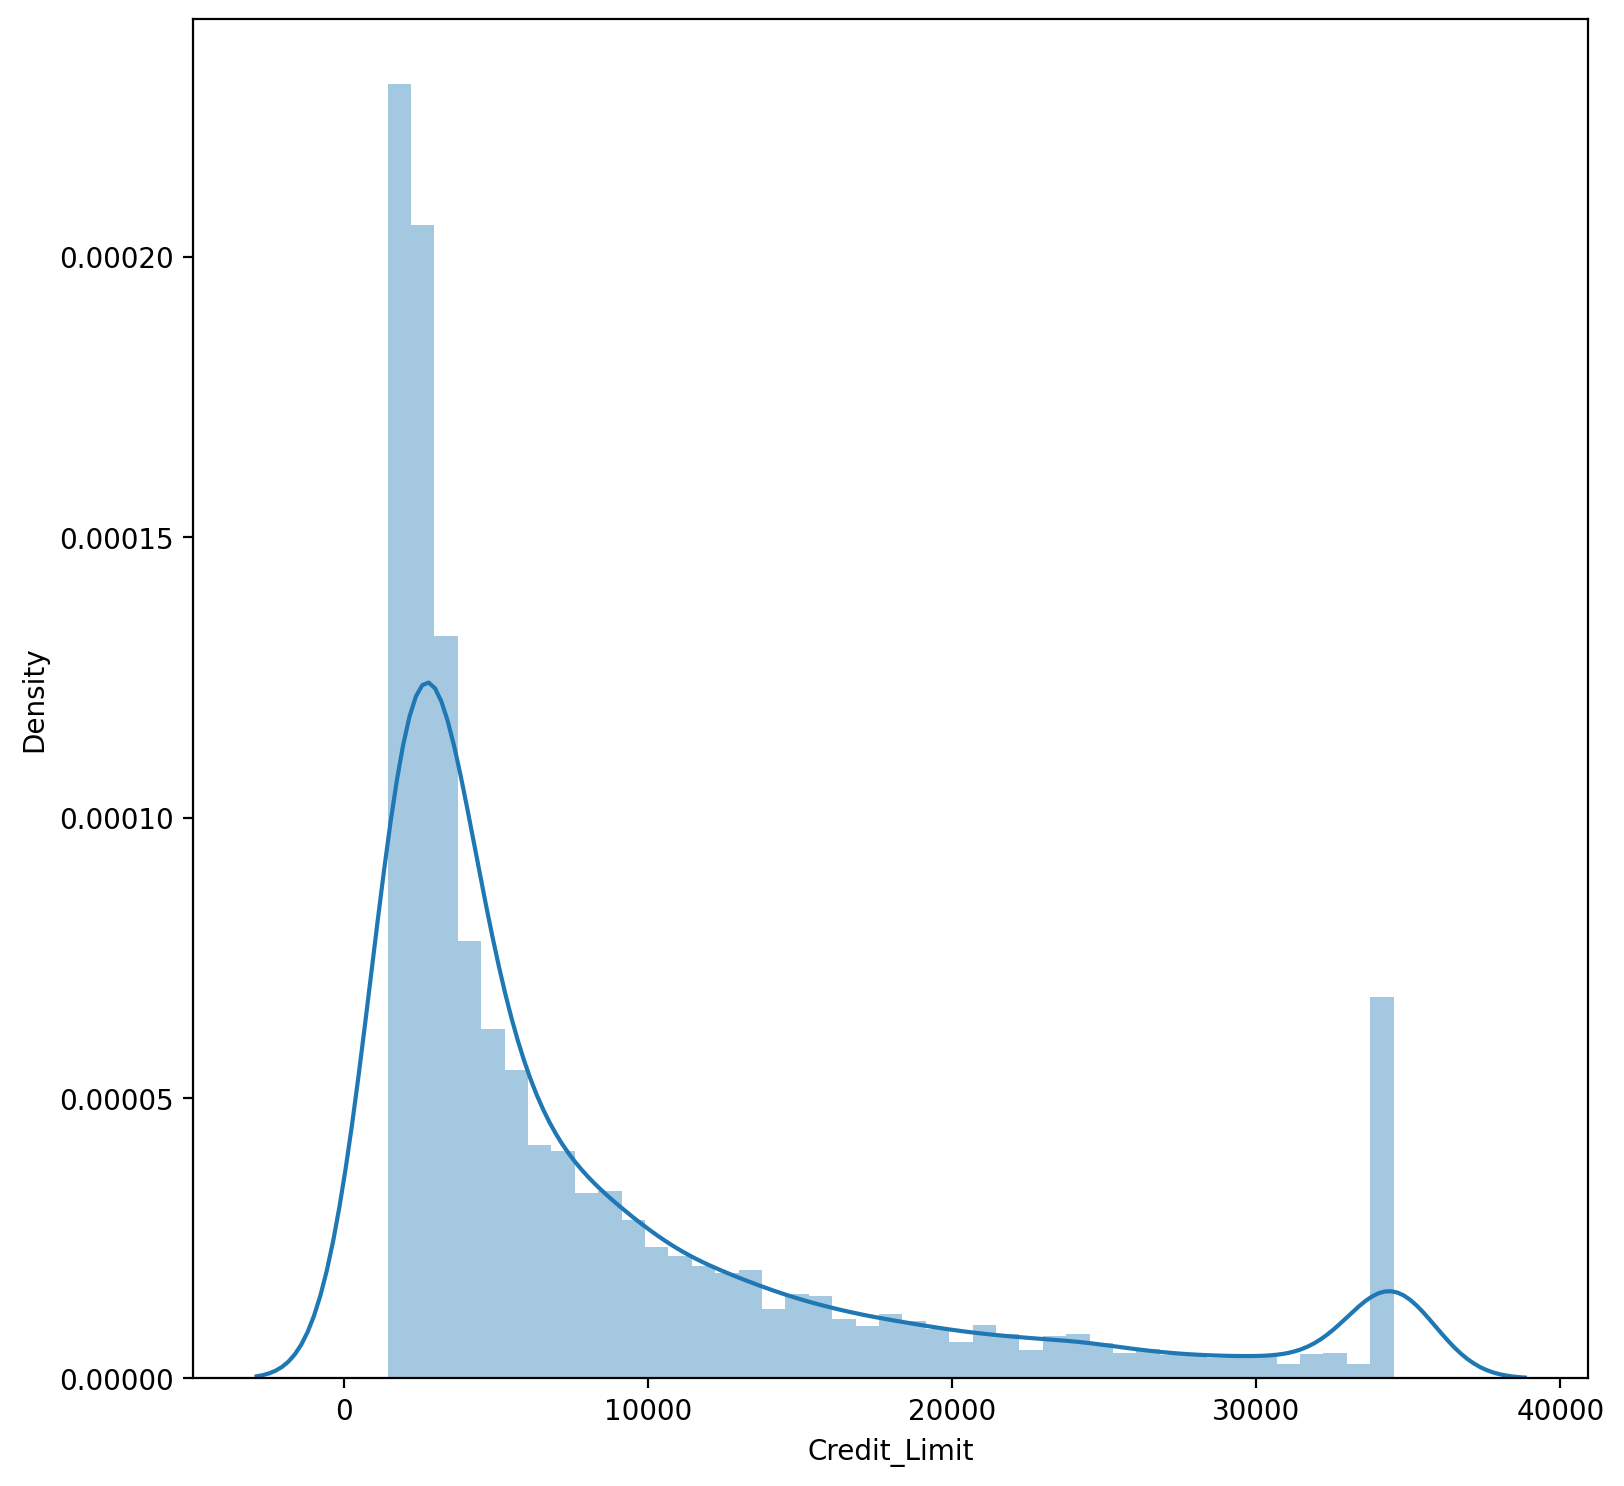

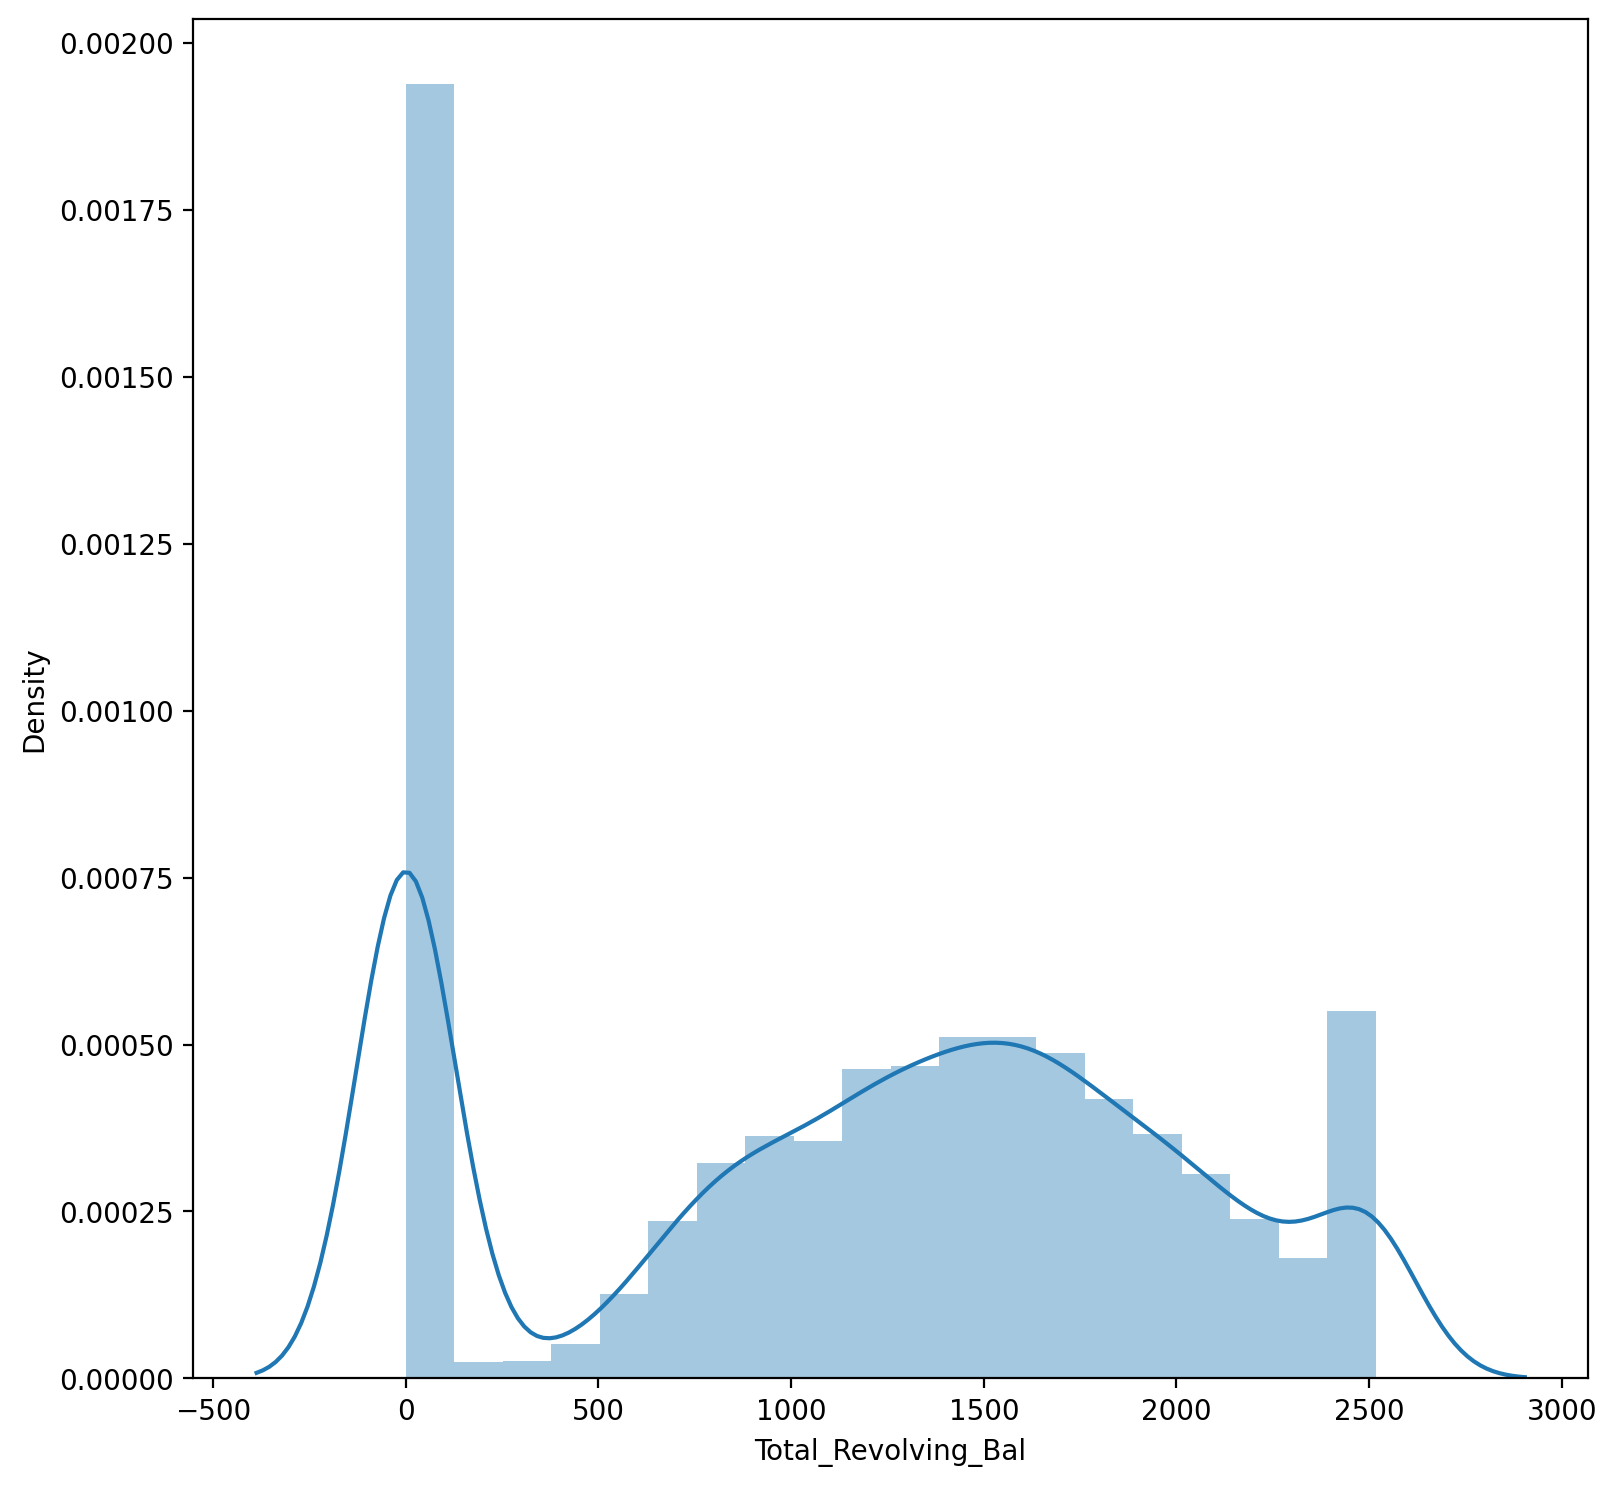

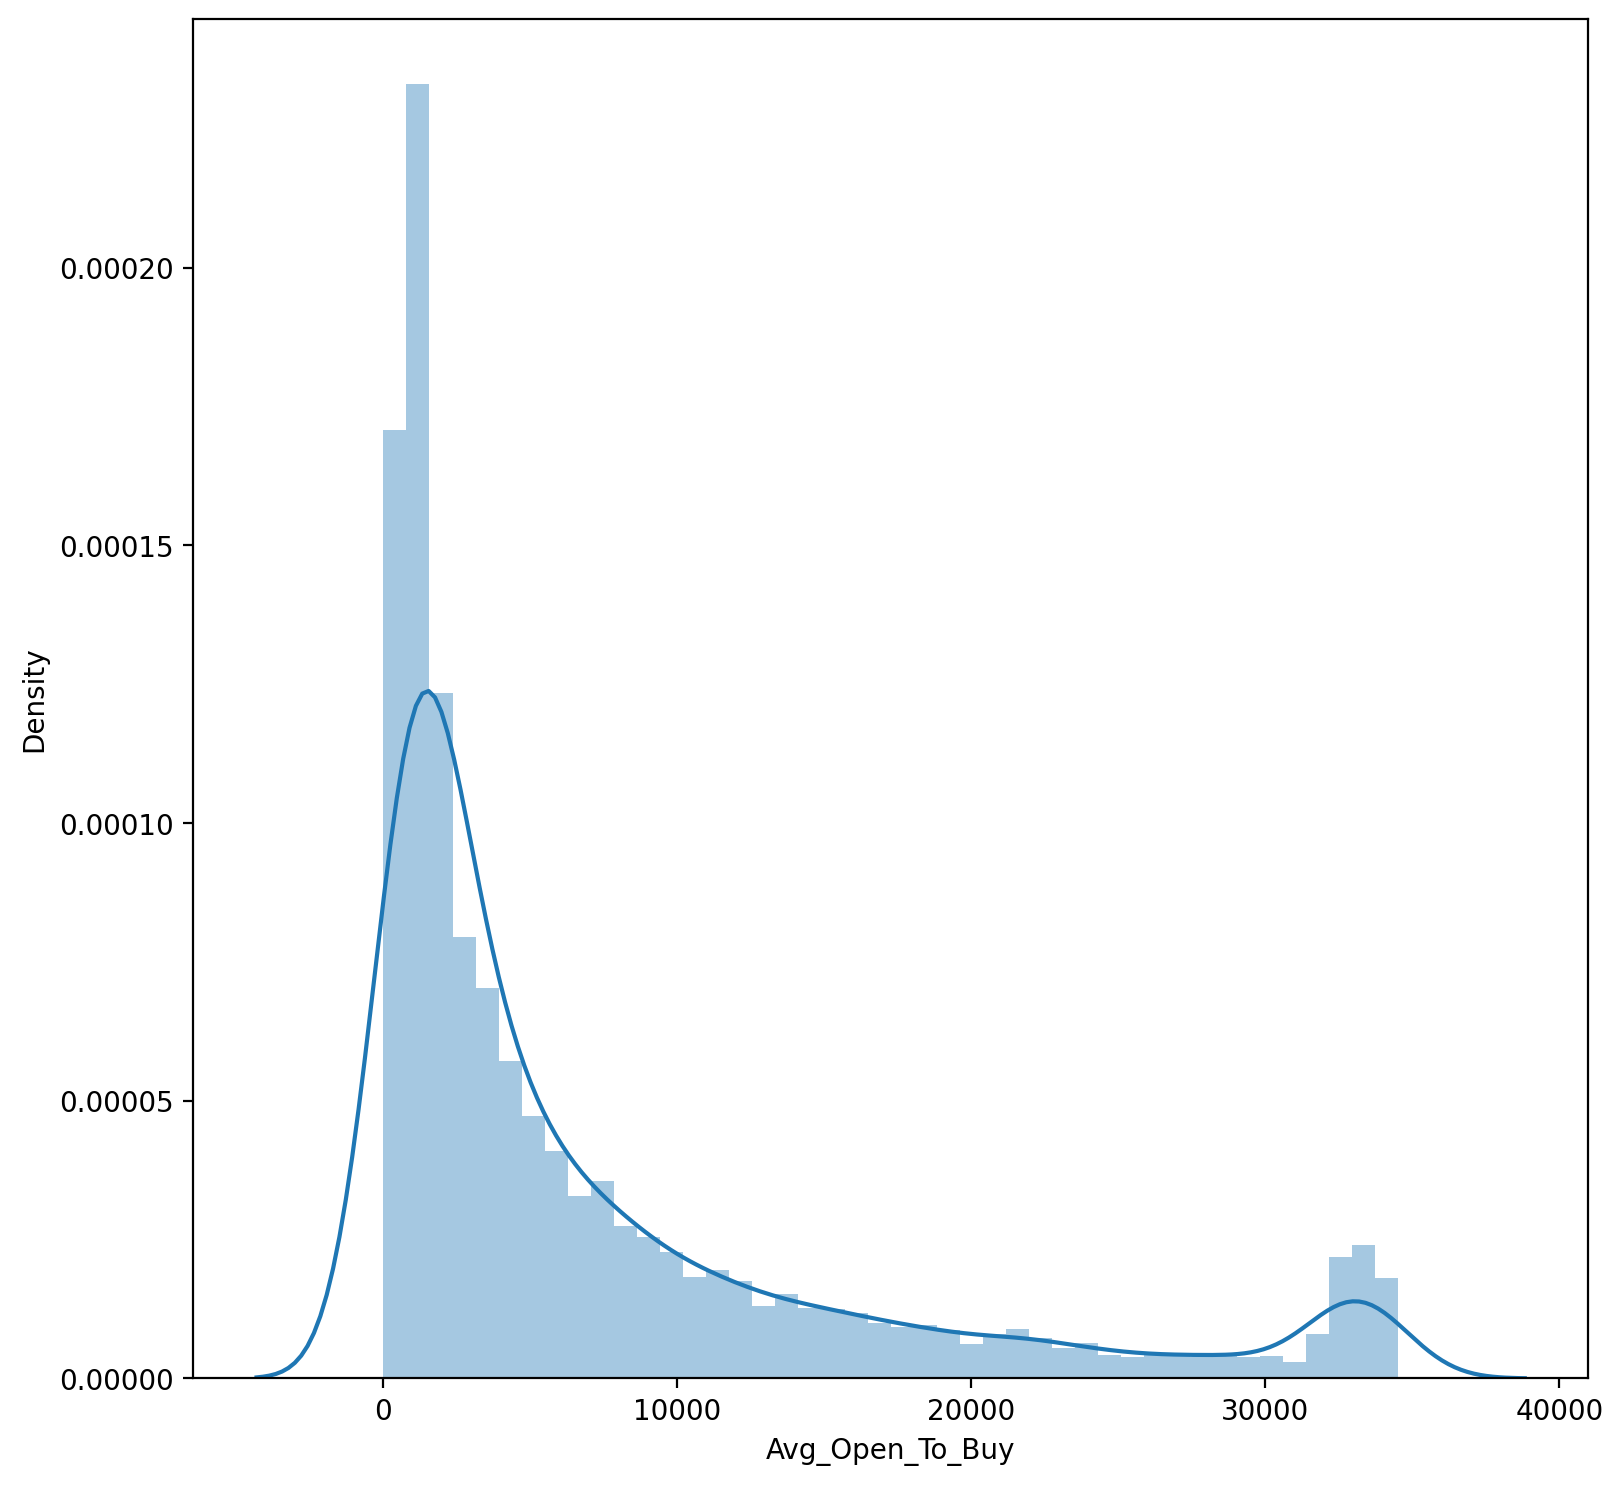

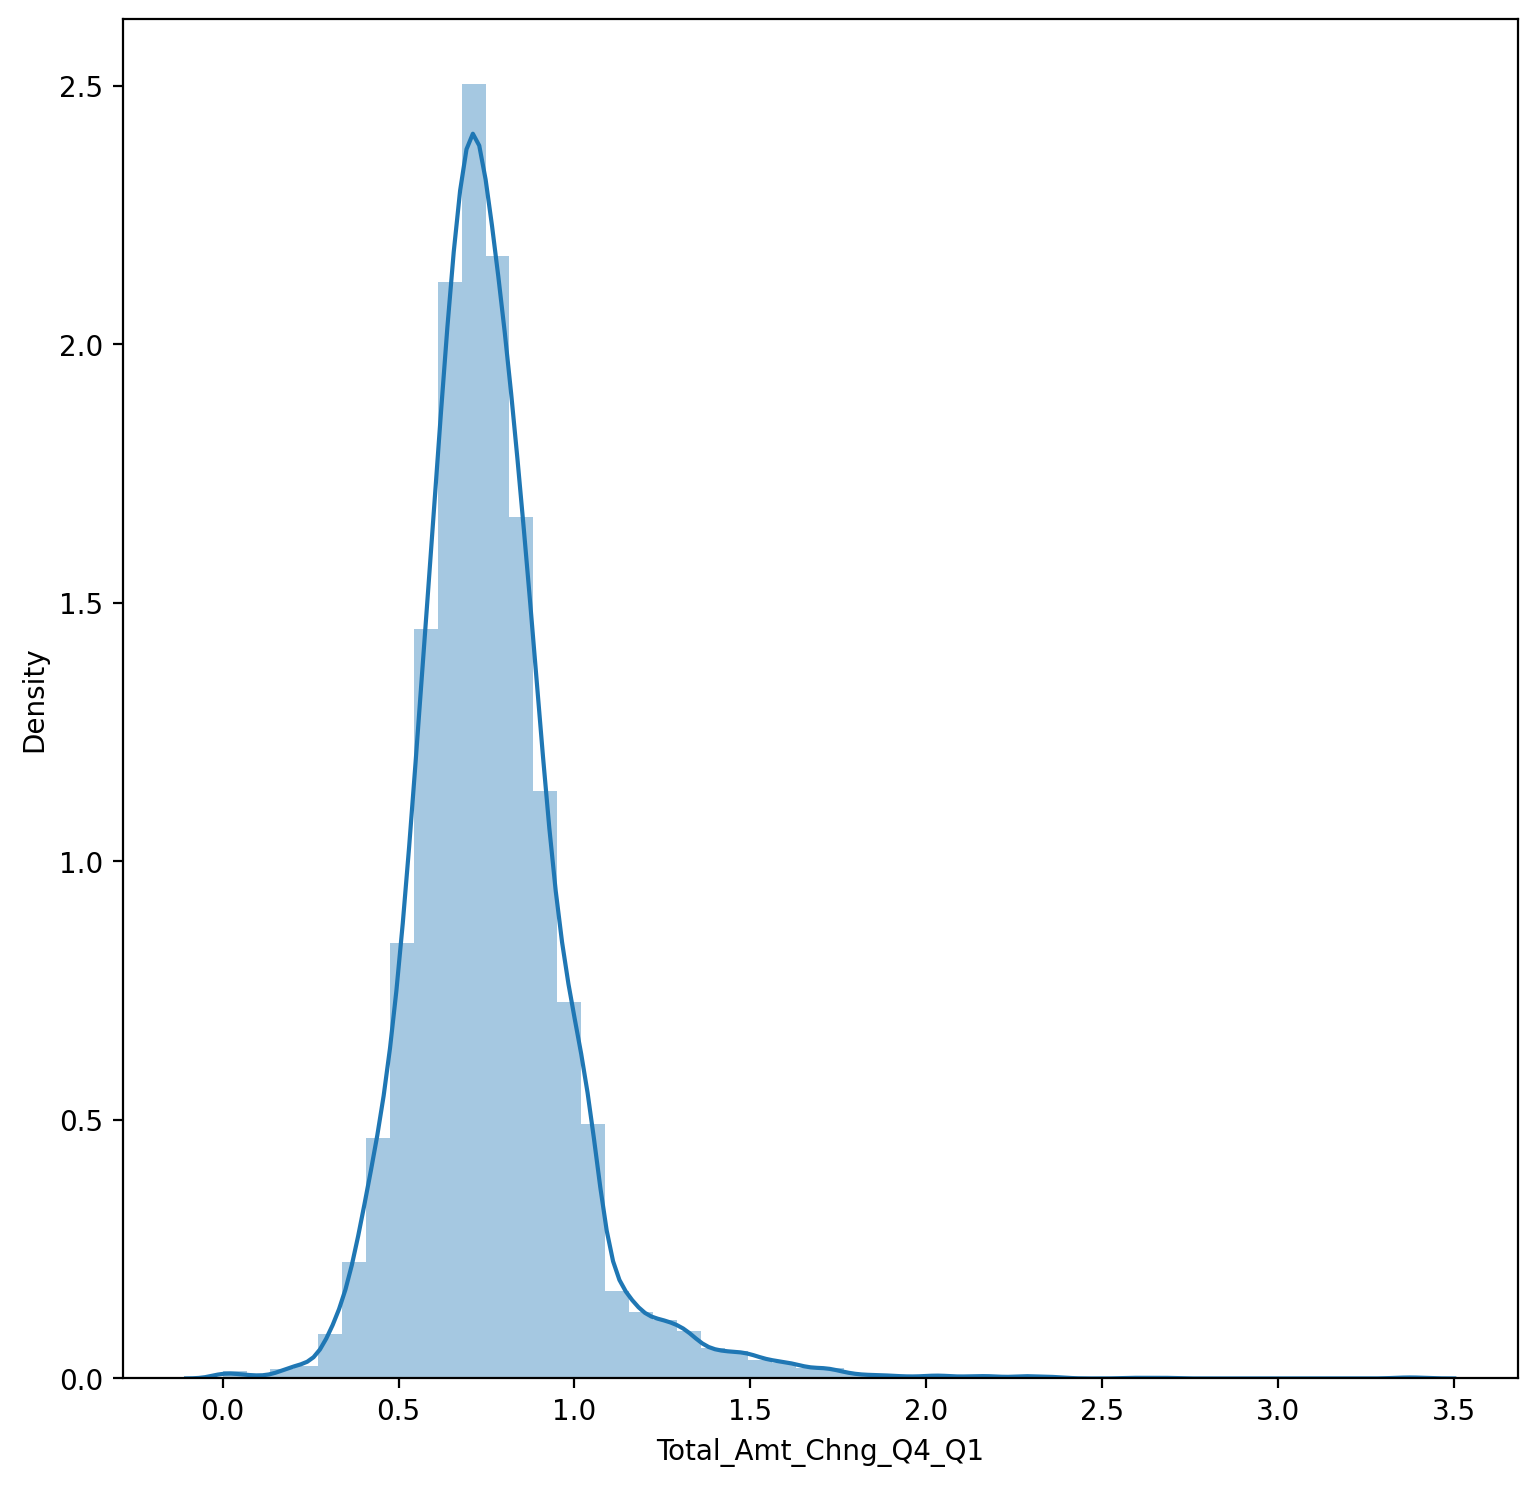

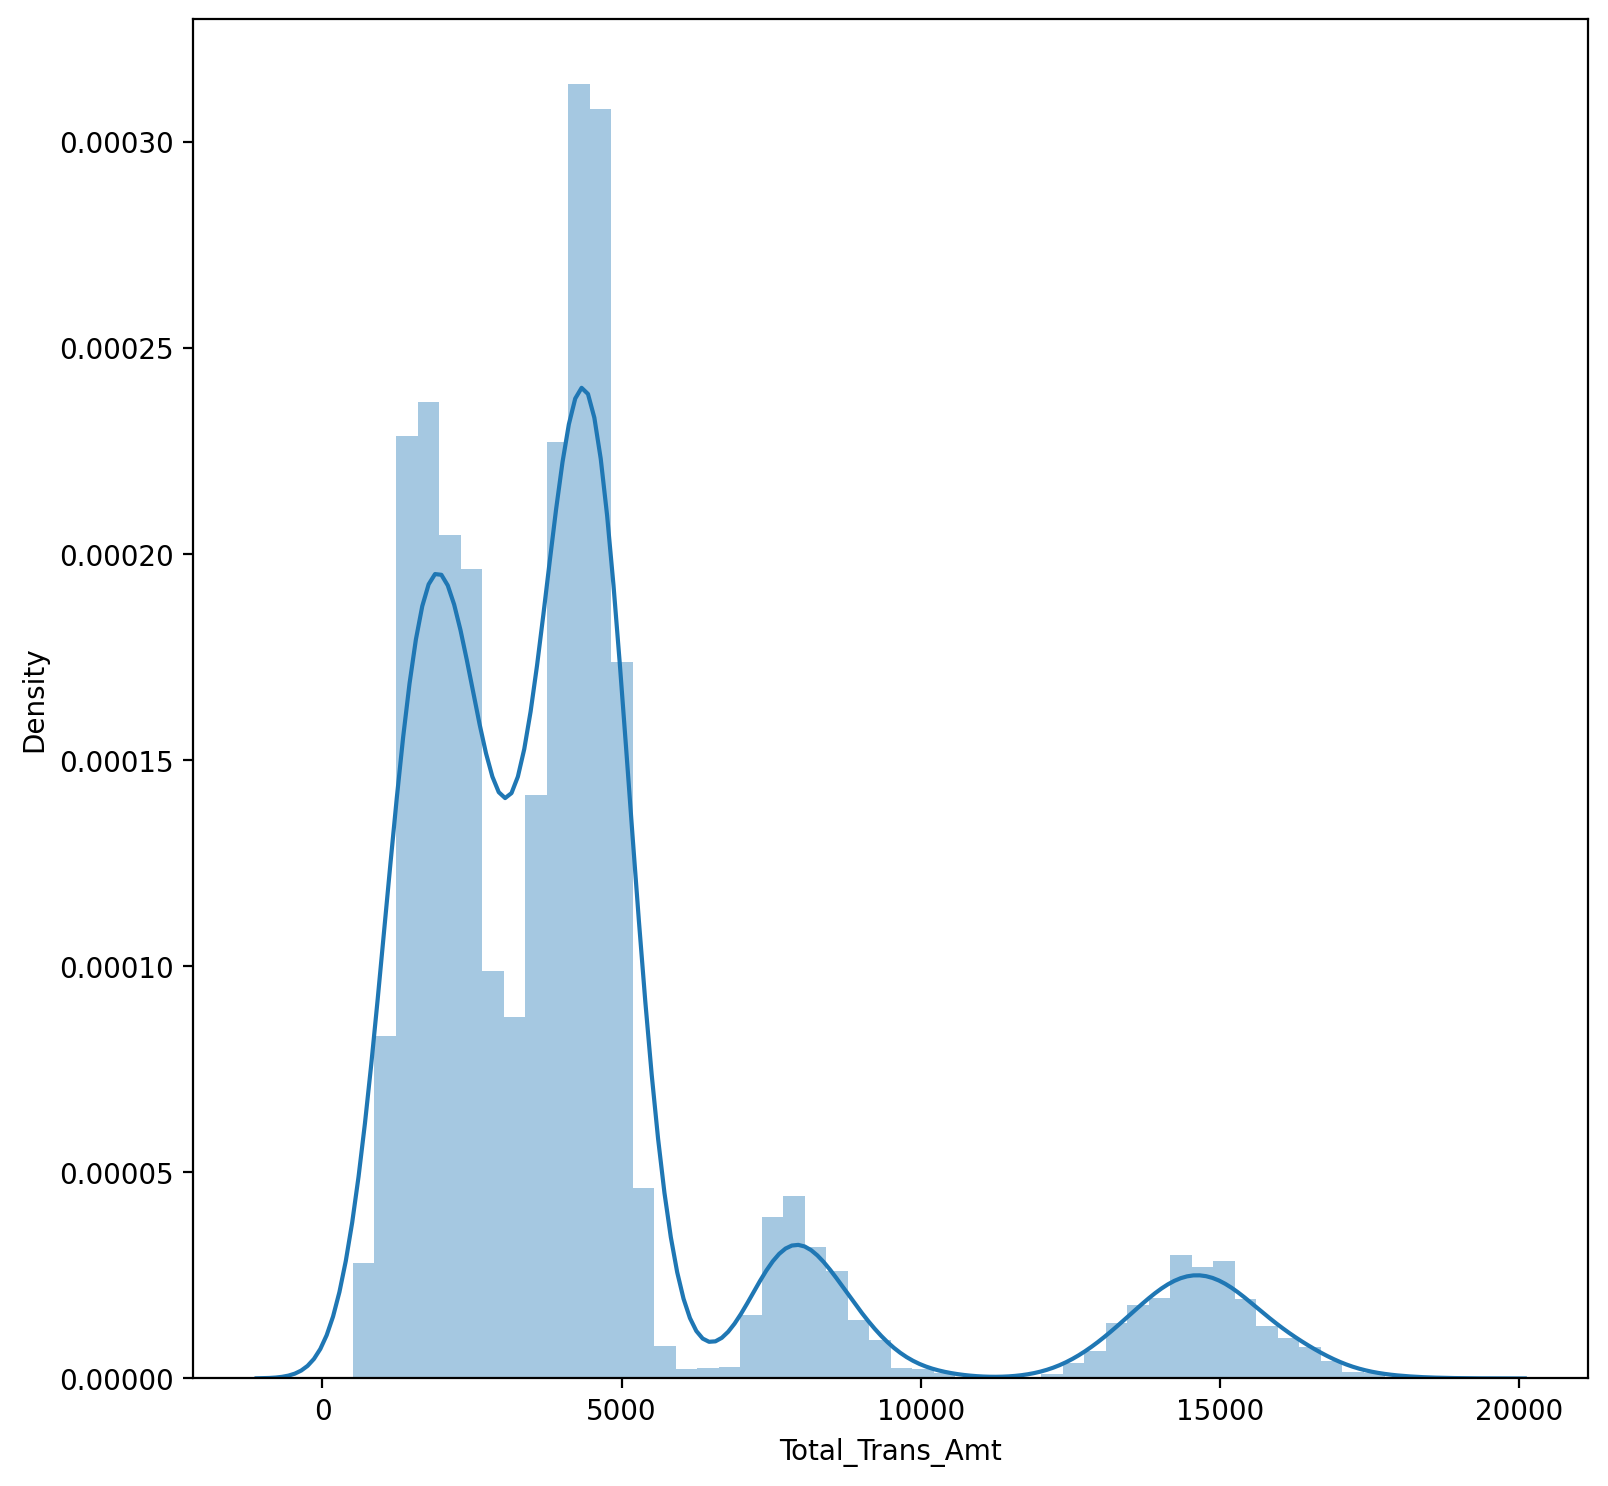

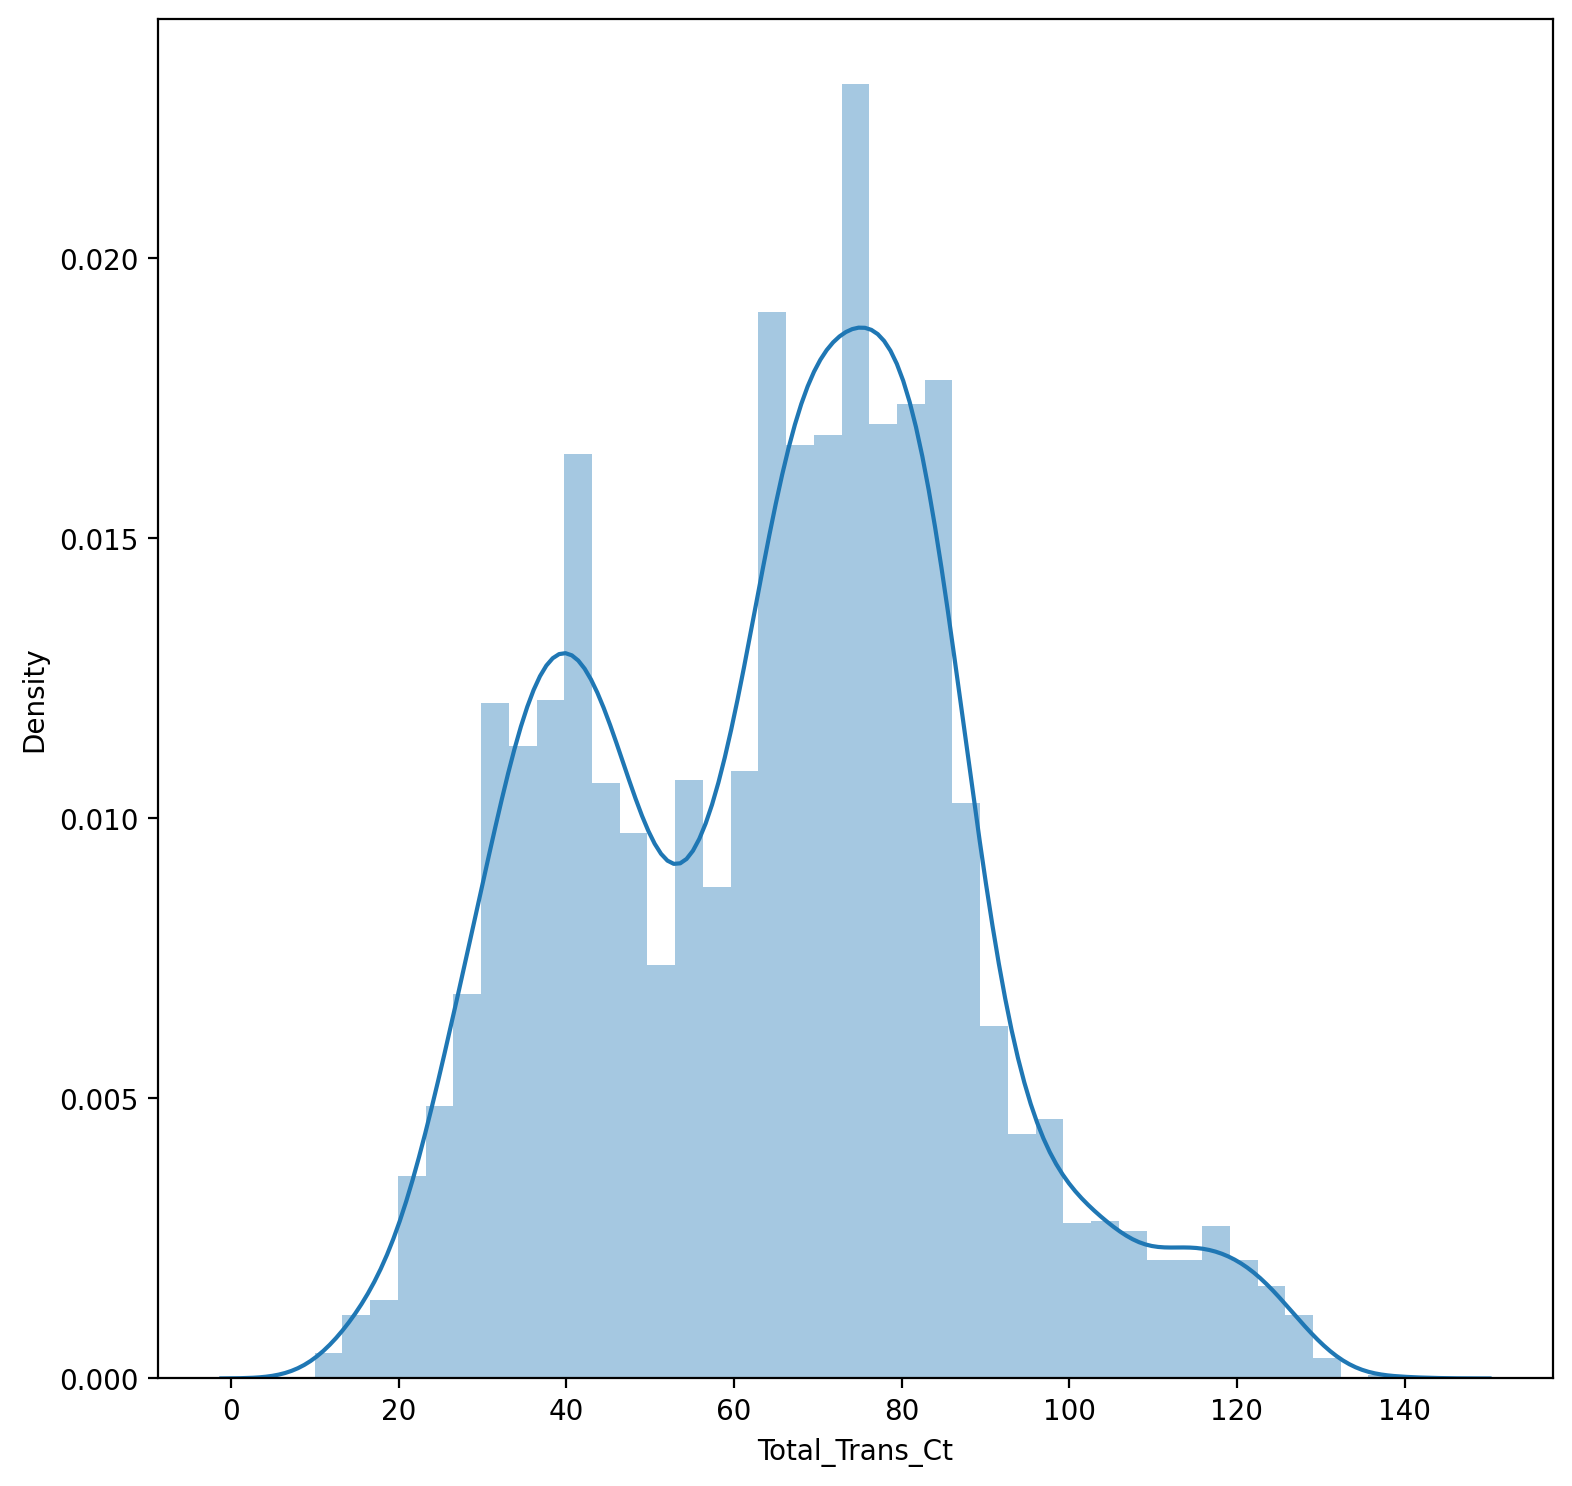

In [32]:

t = [col for col in a if data[col].dtype!='O']
for i in t:
    
    sns.distplot(data[i],kde=True)
    plt.show()

In [33]:
data.isnull().values.any()

False

In [34]:
data.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [35]:
data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

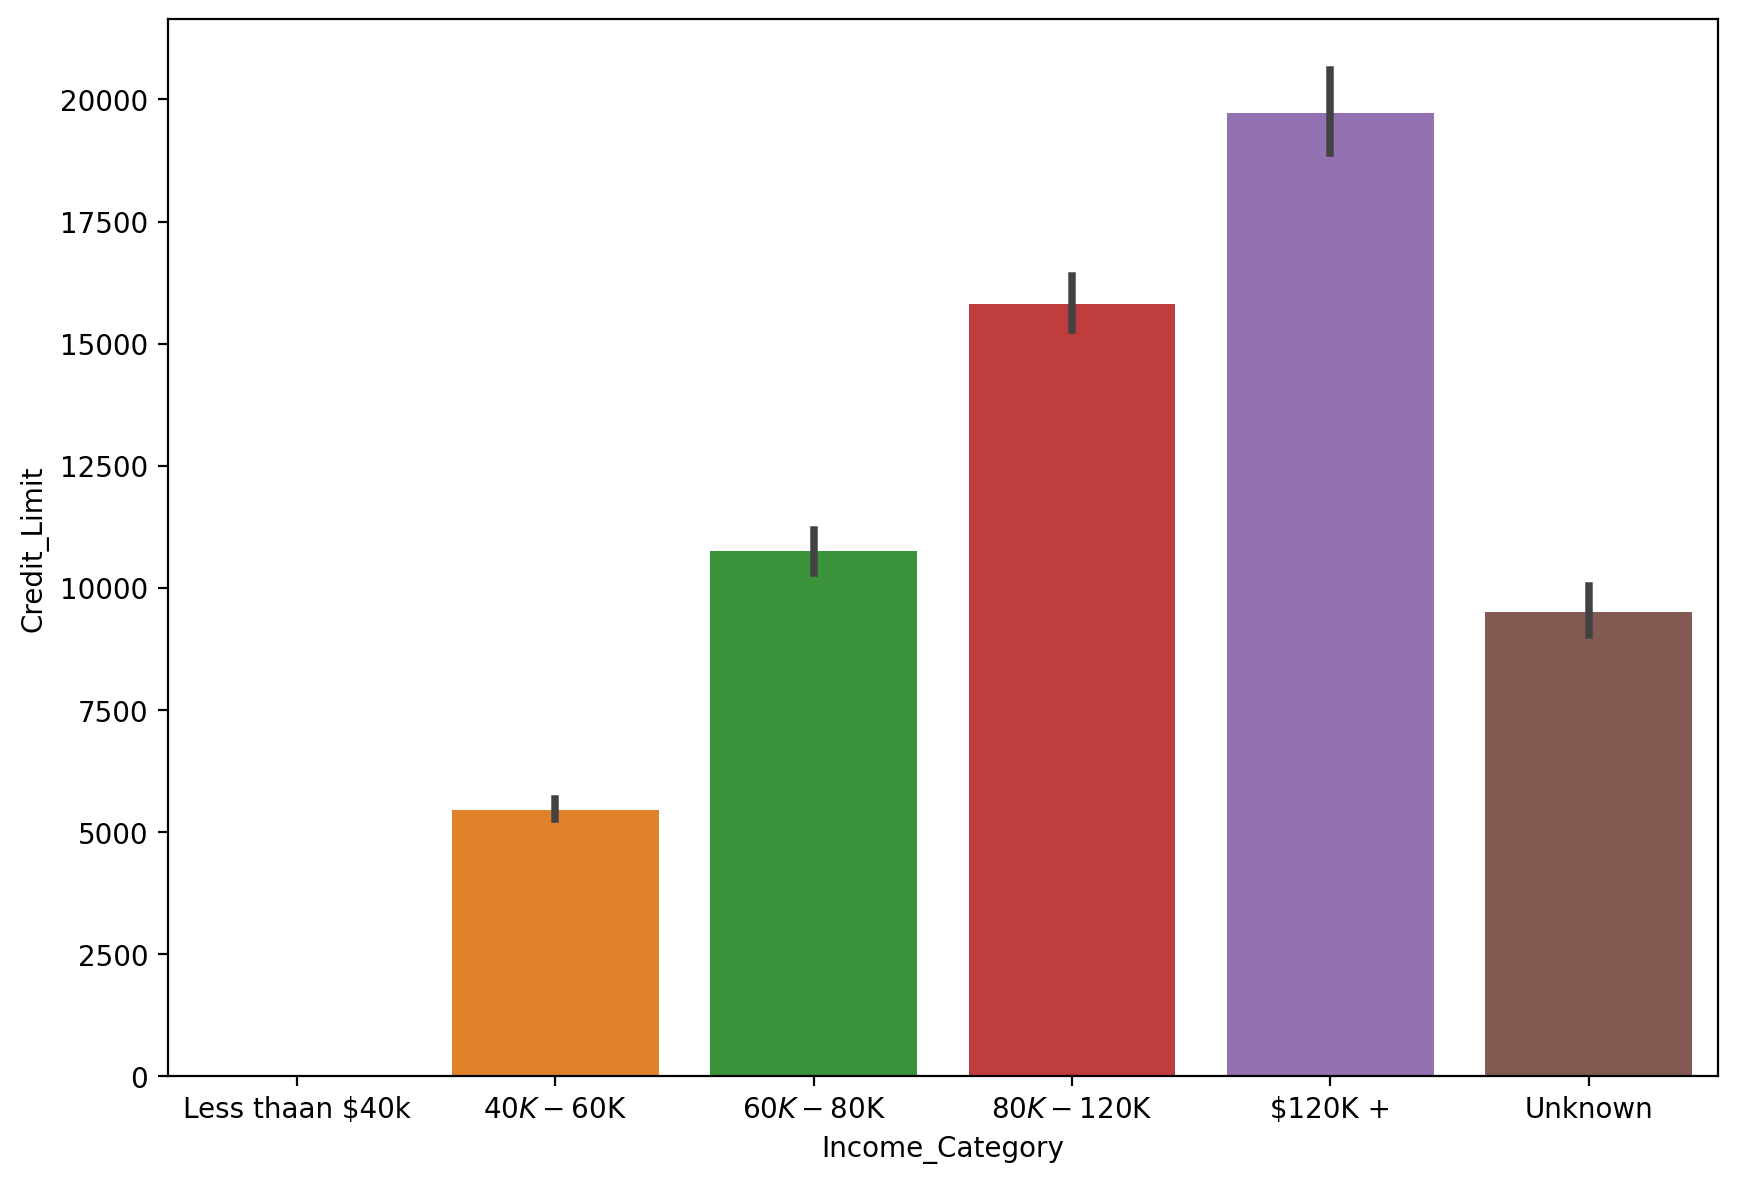

In [36]:
plt.figure(figsize = (10,7))
x=data['Income_Category']
sns.barplot(x ,y = data['Credit_Limit'],order=['Less thaan $40k','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'])

<AxesSubplot:xlabel='Gender', ylabel='Avg_Utilization_Ratio'>

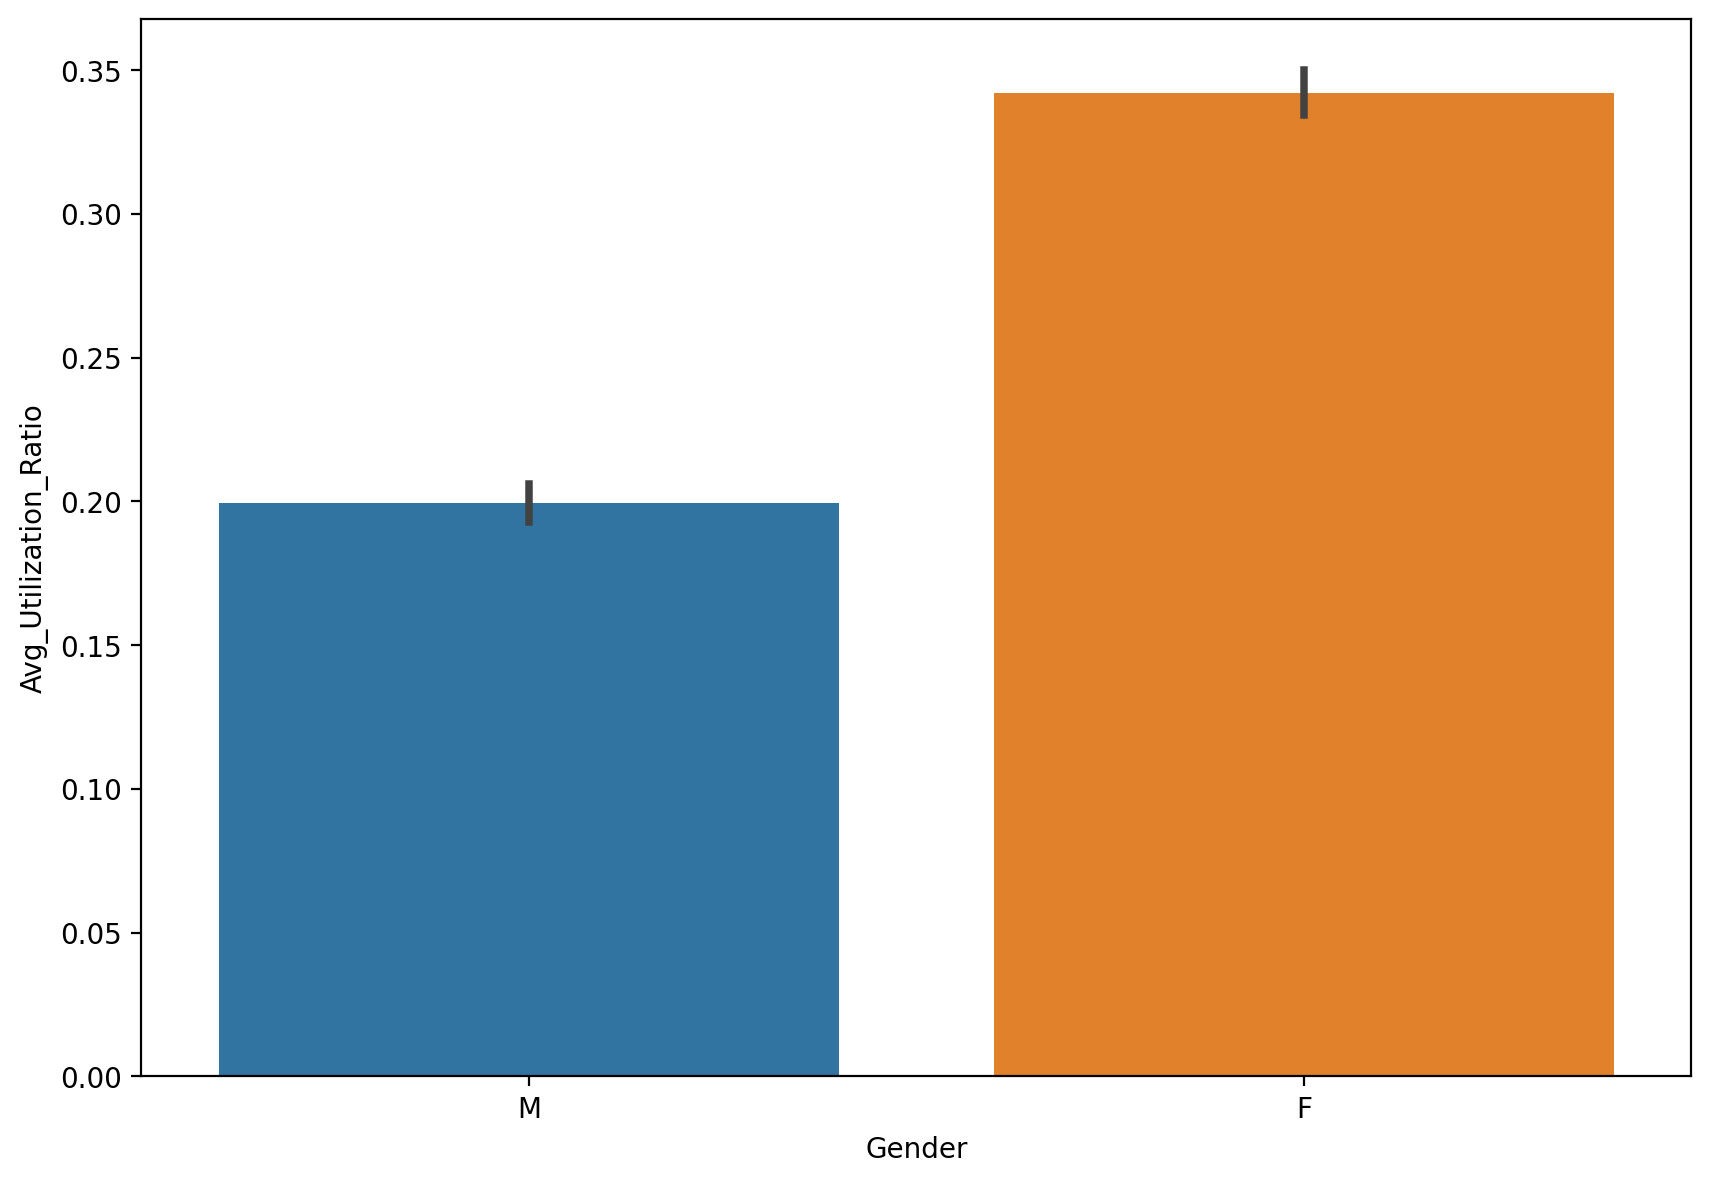

In [37]:
plt.figure(figsize = (10,7))
x=data['Gender']
sns.barplot(x ,y = data['Avg_Utilization_Ratio'])

<AxesSubplot:xlabel='Marital_Status', ylabel='Avg_Utilization_Ratio'>

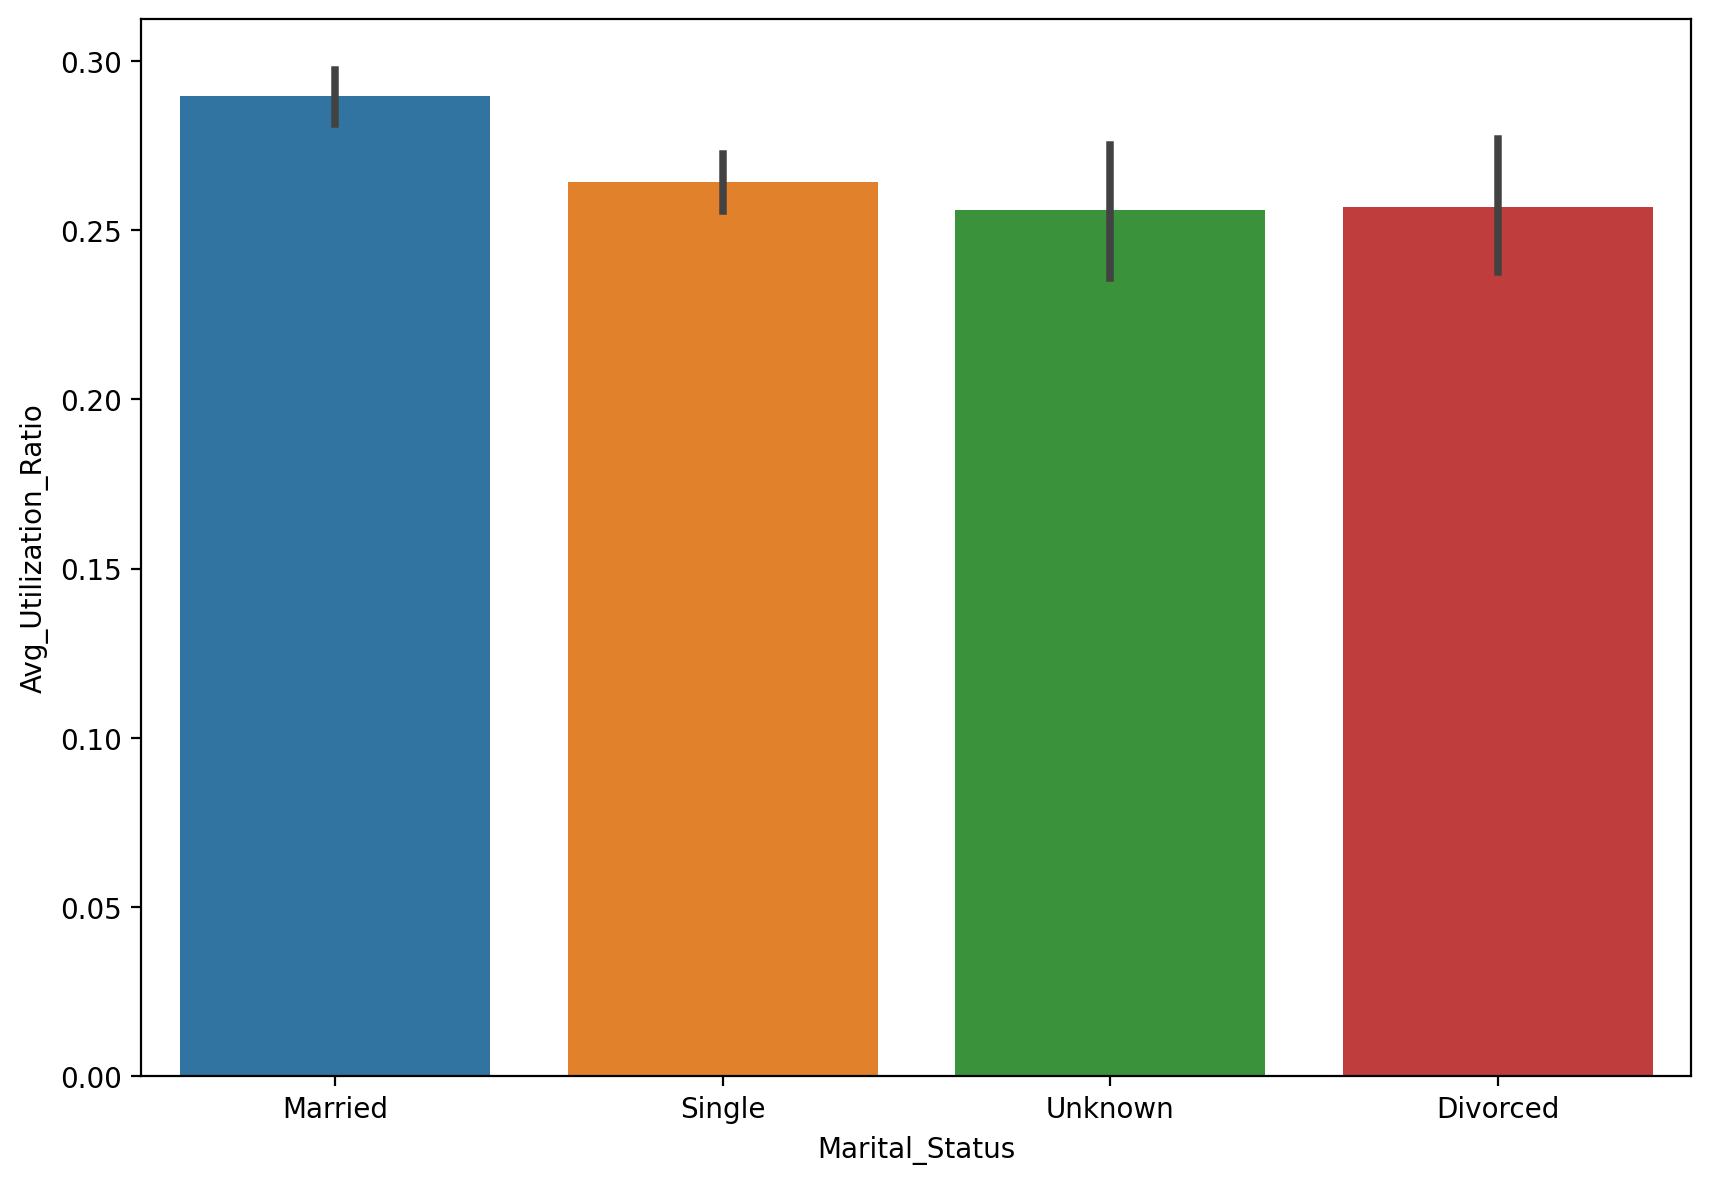

In [38]:

plt.figure(figsize = (10,7))
x=data['Marital_Status']
sns.barplot(x ,y = data['Avg_Utilization_Ratio'])

<AxesSubplot:xlabel='Education_Level', ylabel='Avg_Utilization_Ratio'>

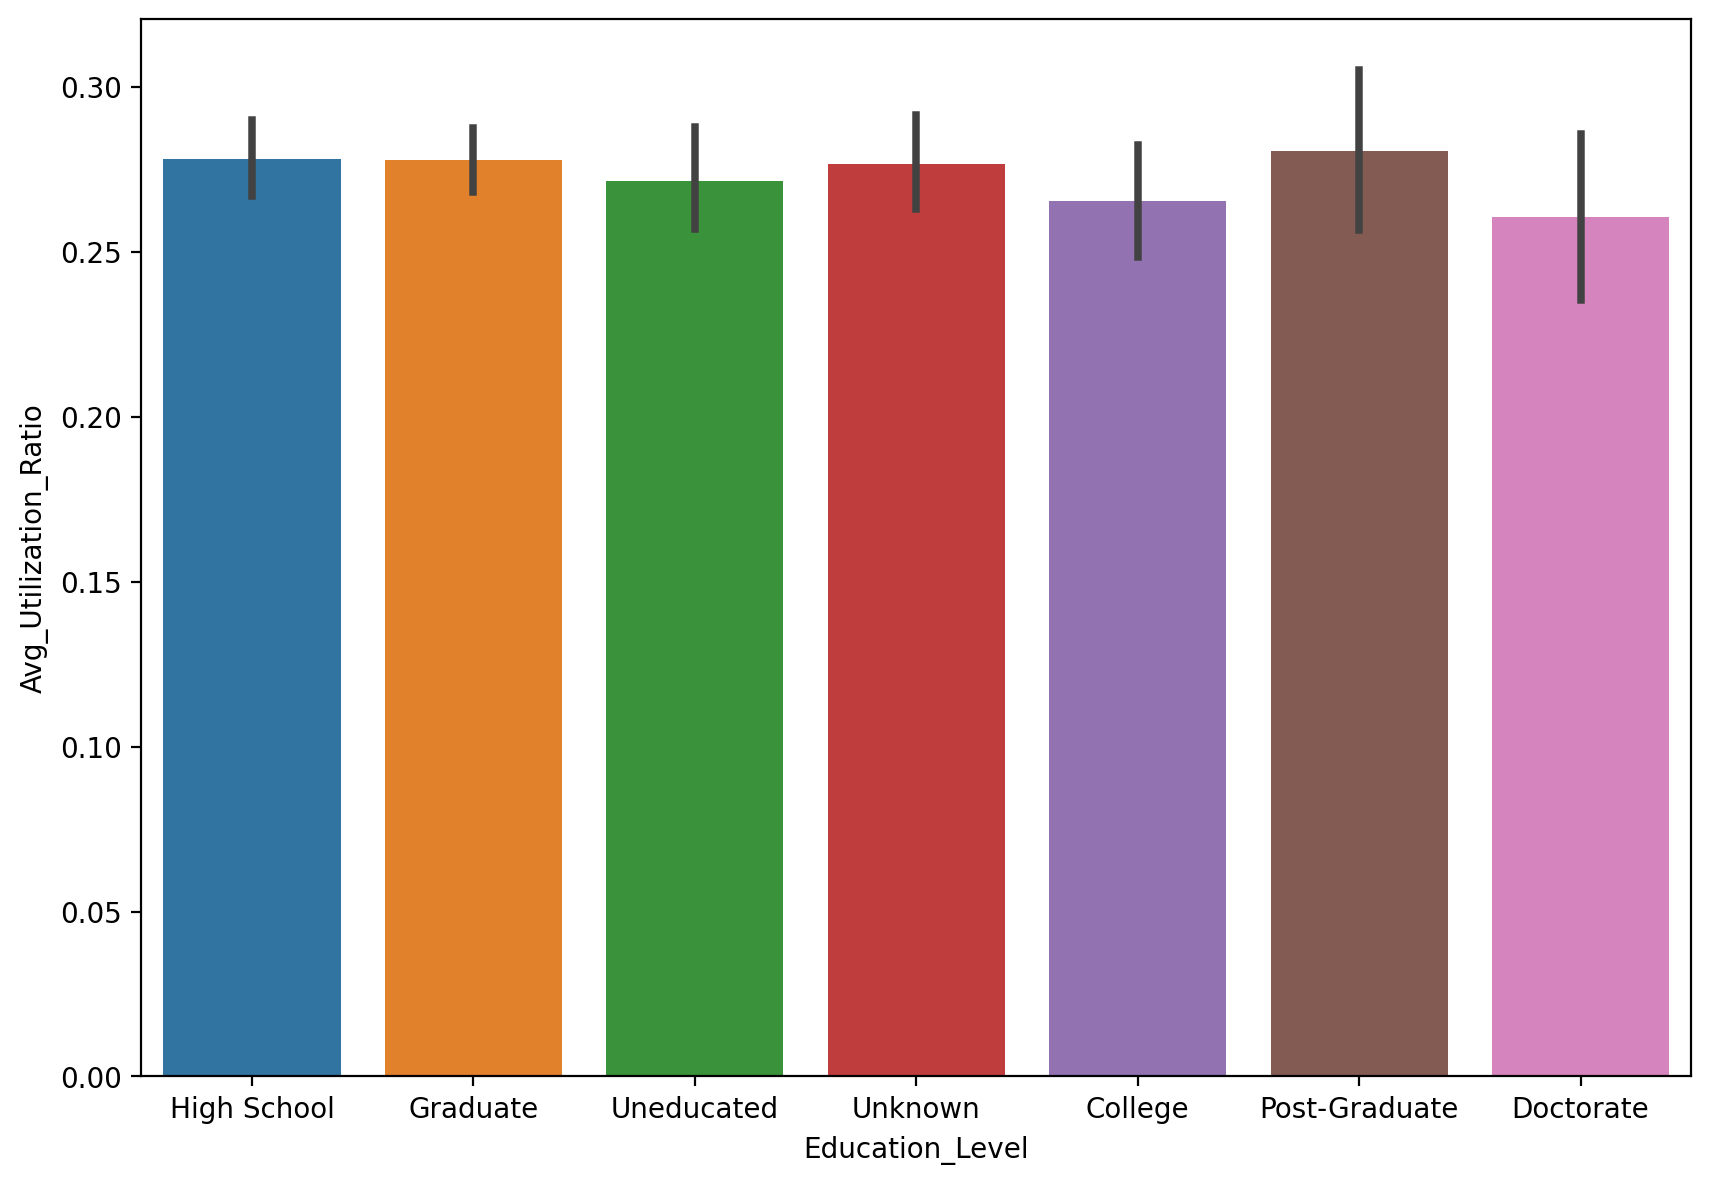

In [39]:
plt.figure(figsize = (10,7))
x=data['Education_Level']
sns.barplot(x ,y = data['Avg_Utilization_Ratio'])


## Data Preprocessing

In [40]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [41]:
data = data.iloc[:,1:-2]

In [42]:
data.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [43]:
data.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

<AxesSubplot:>

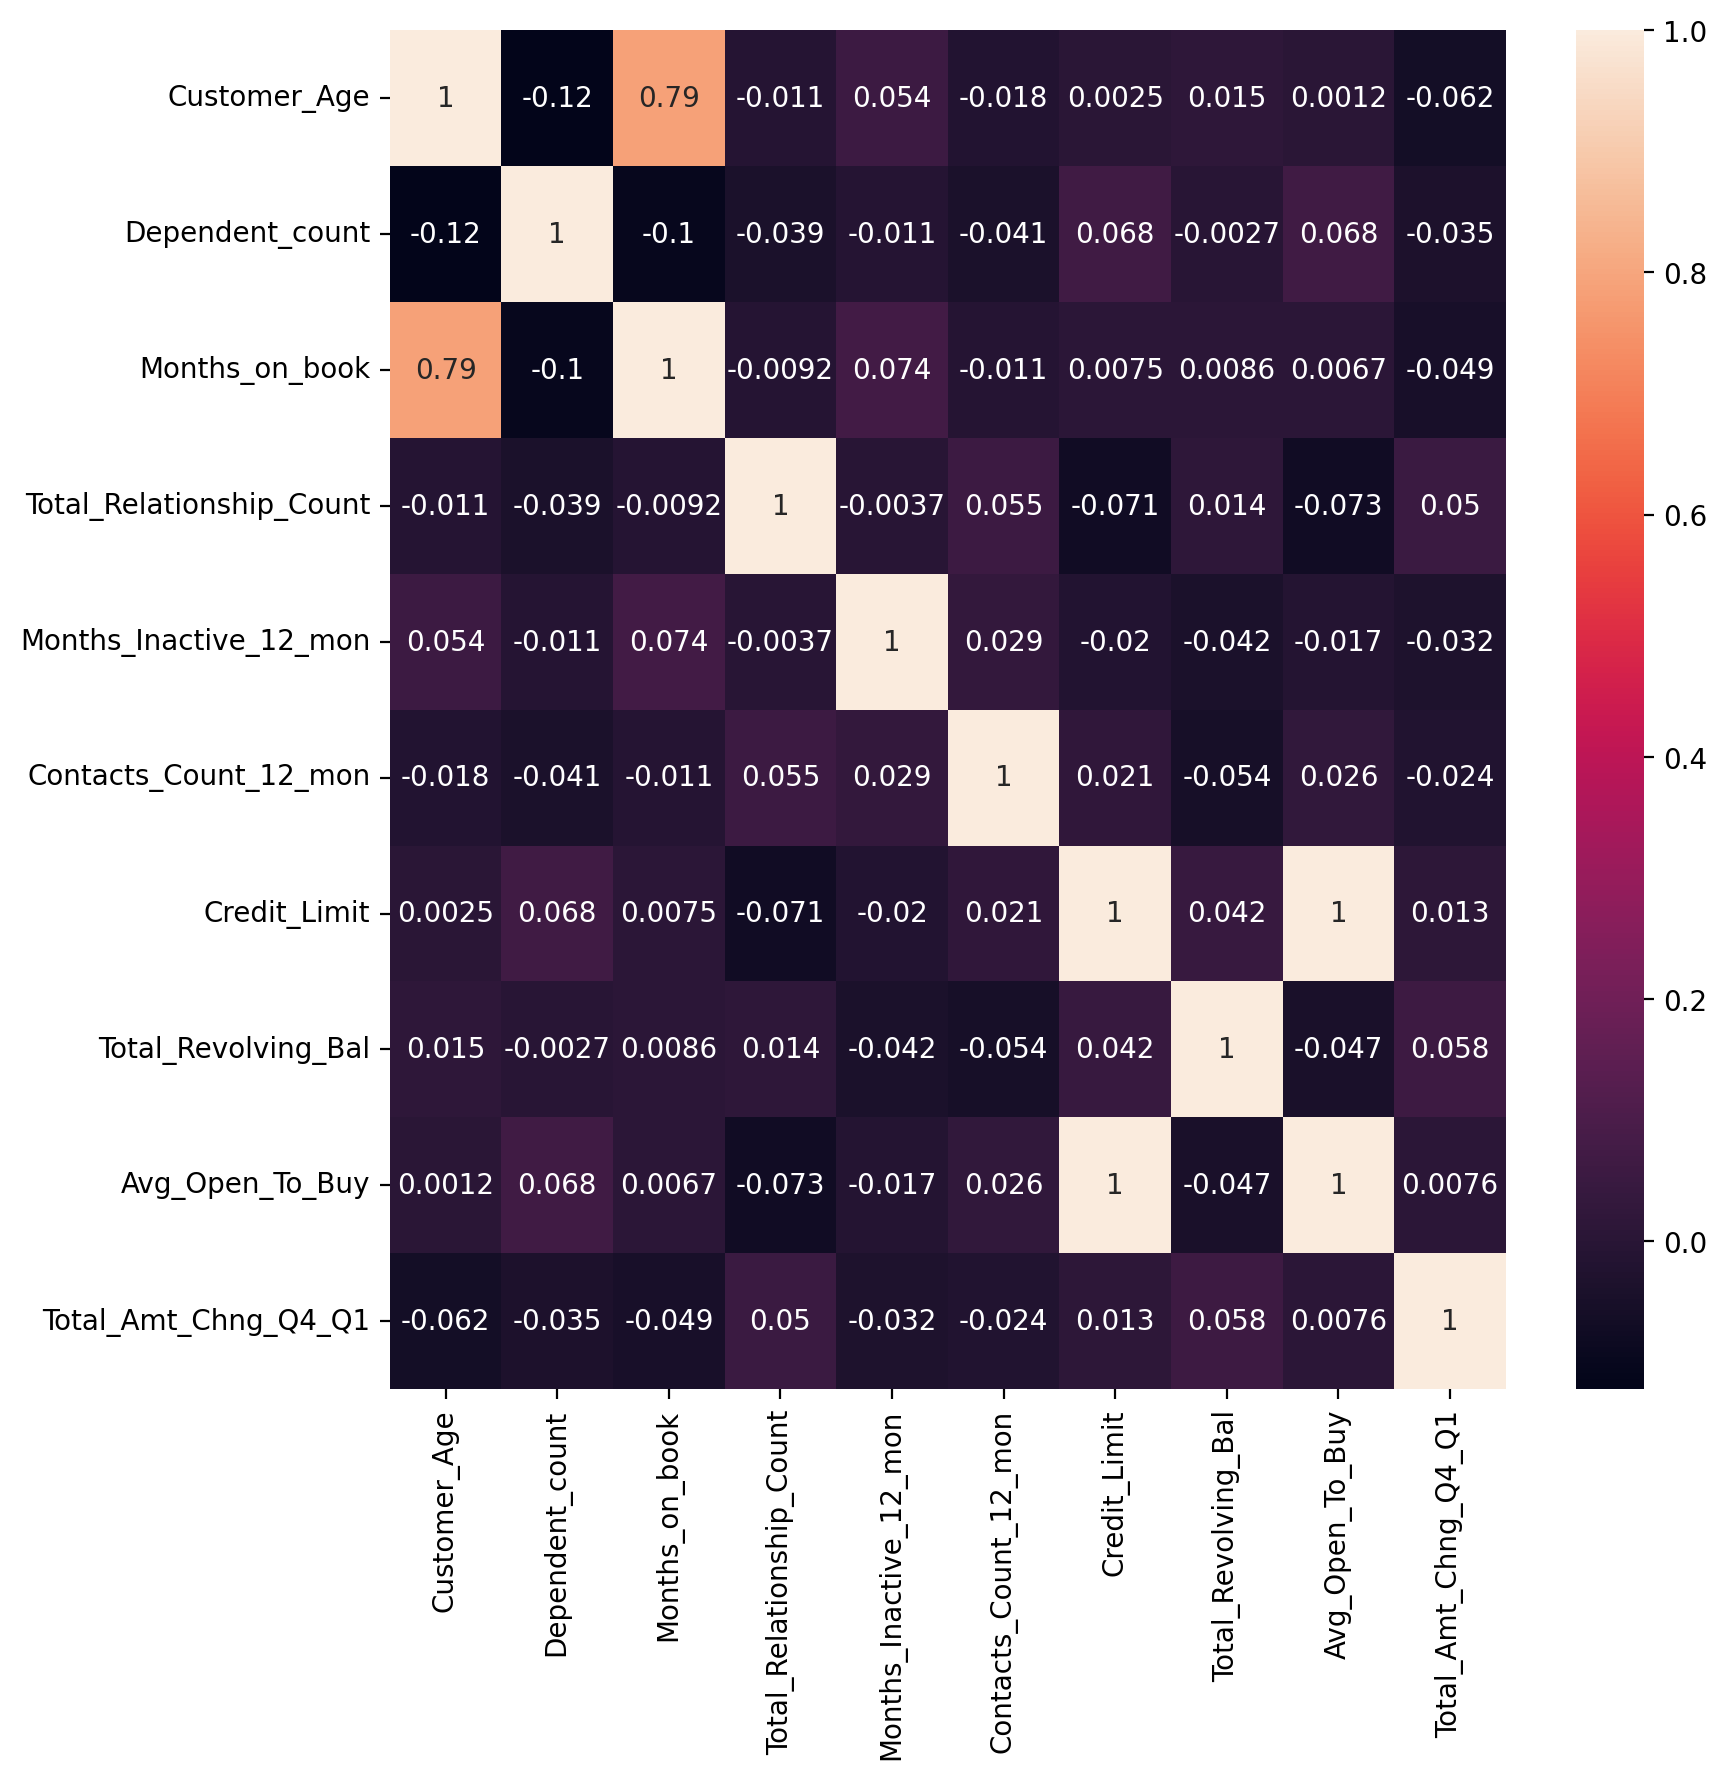

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(data.iloc[:,:-2].corr(),annot=True)

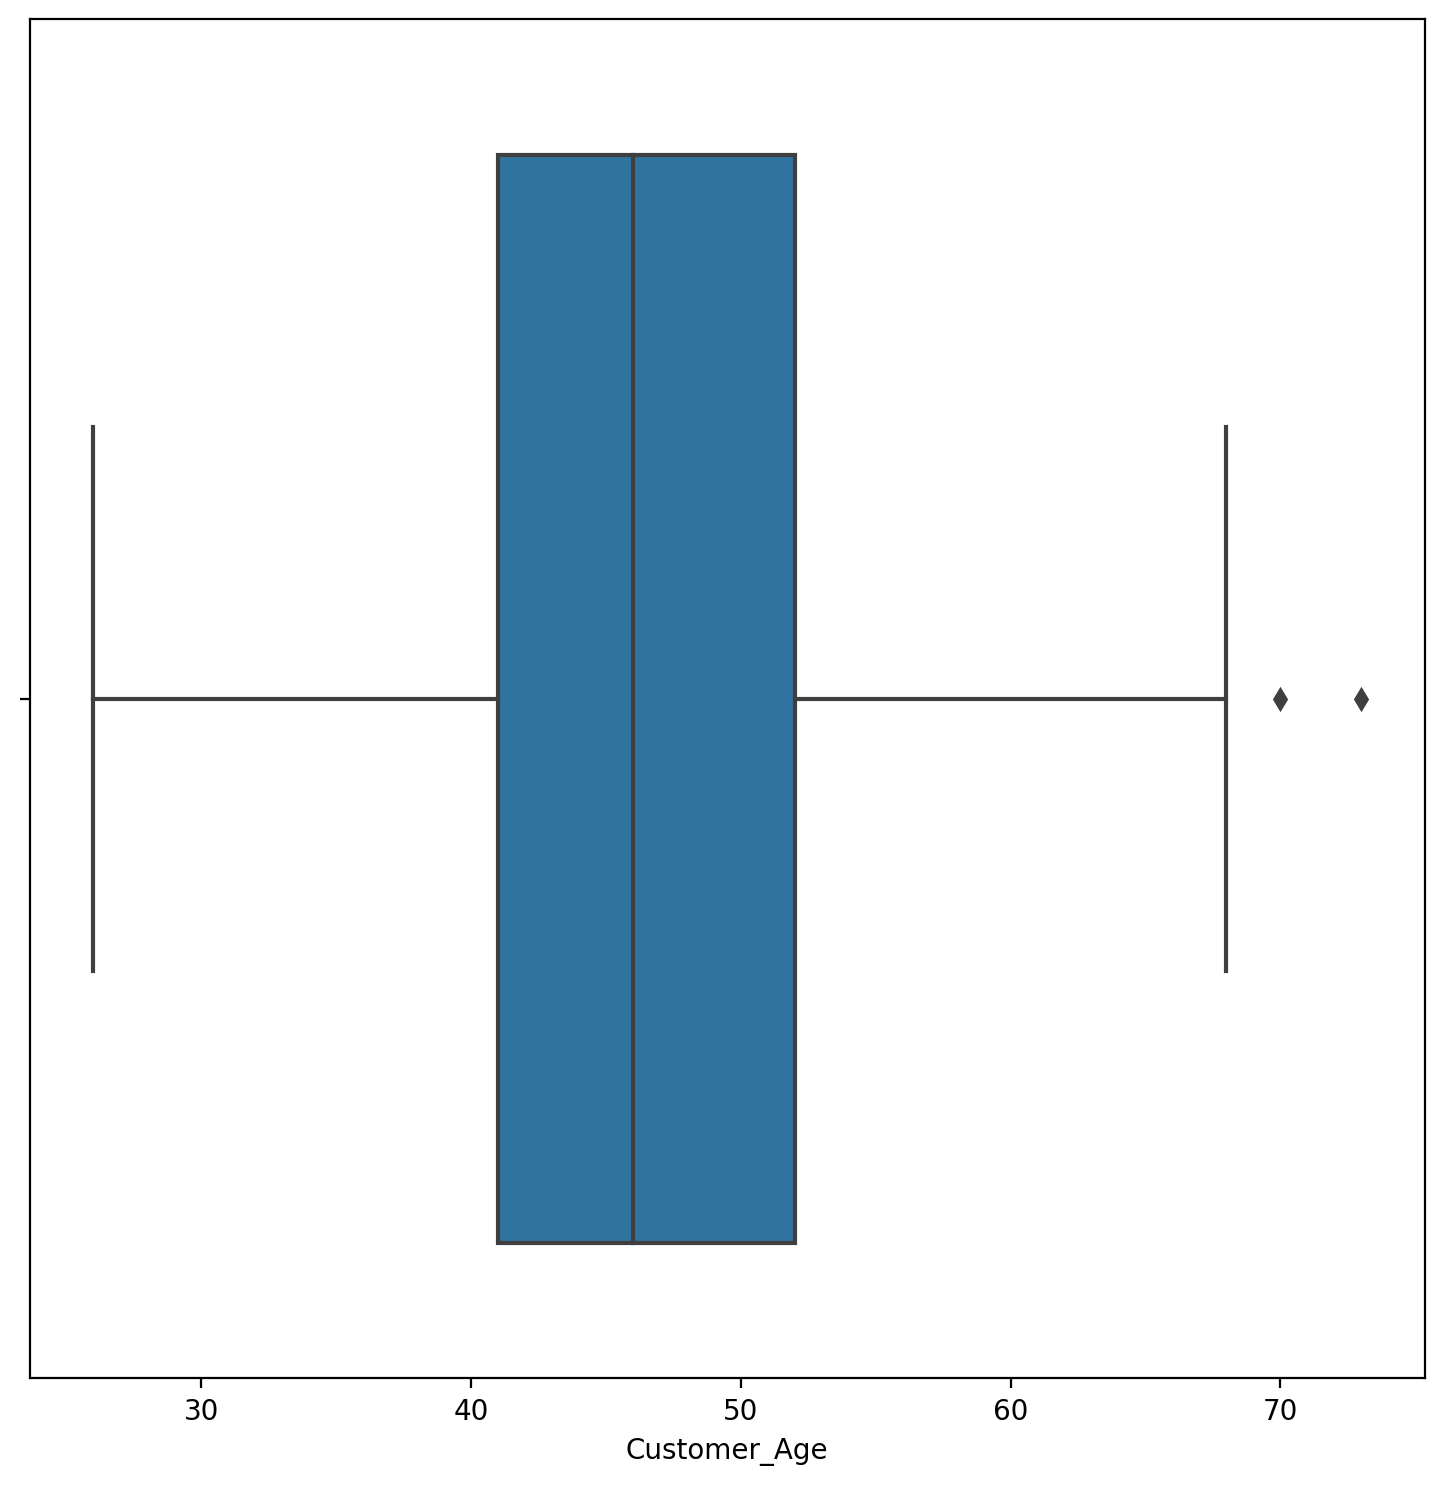

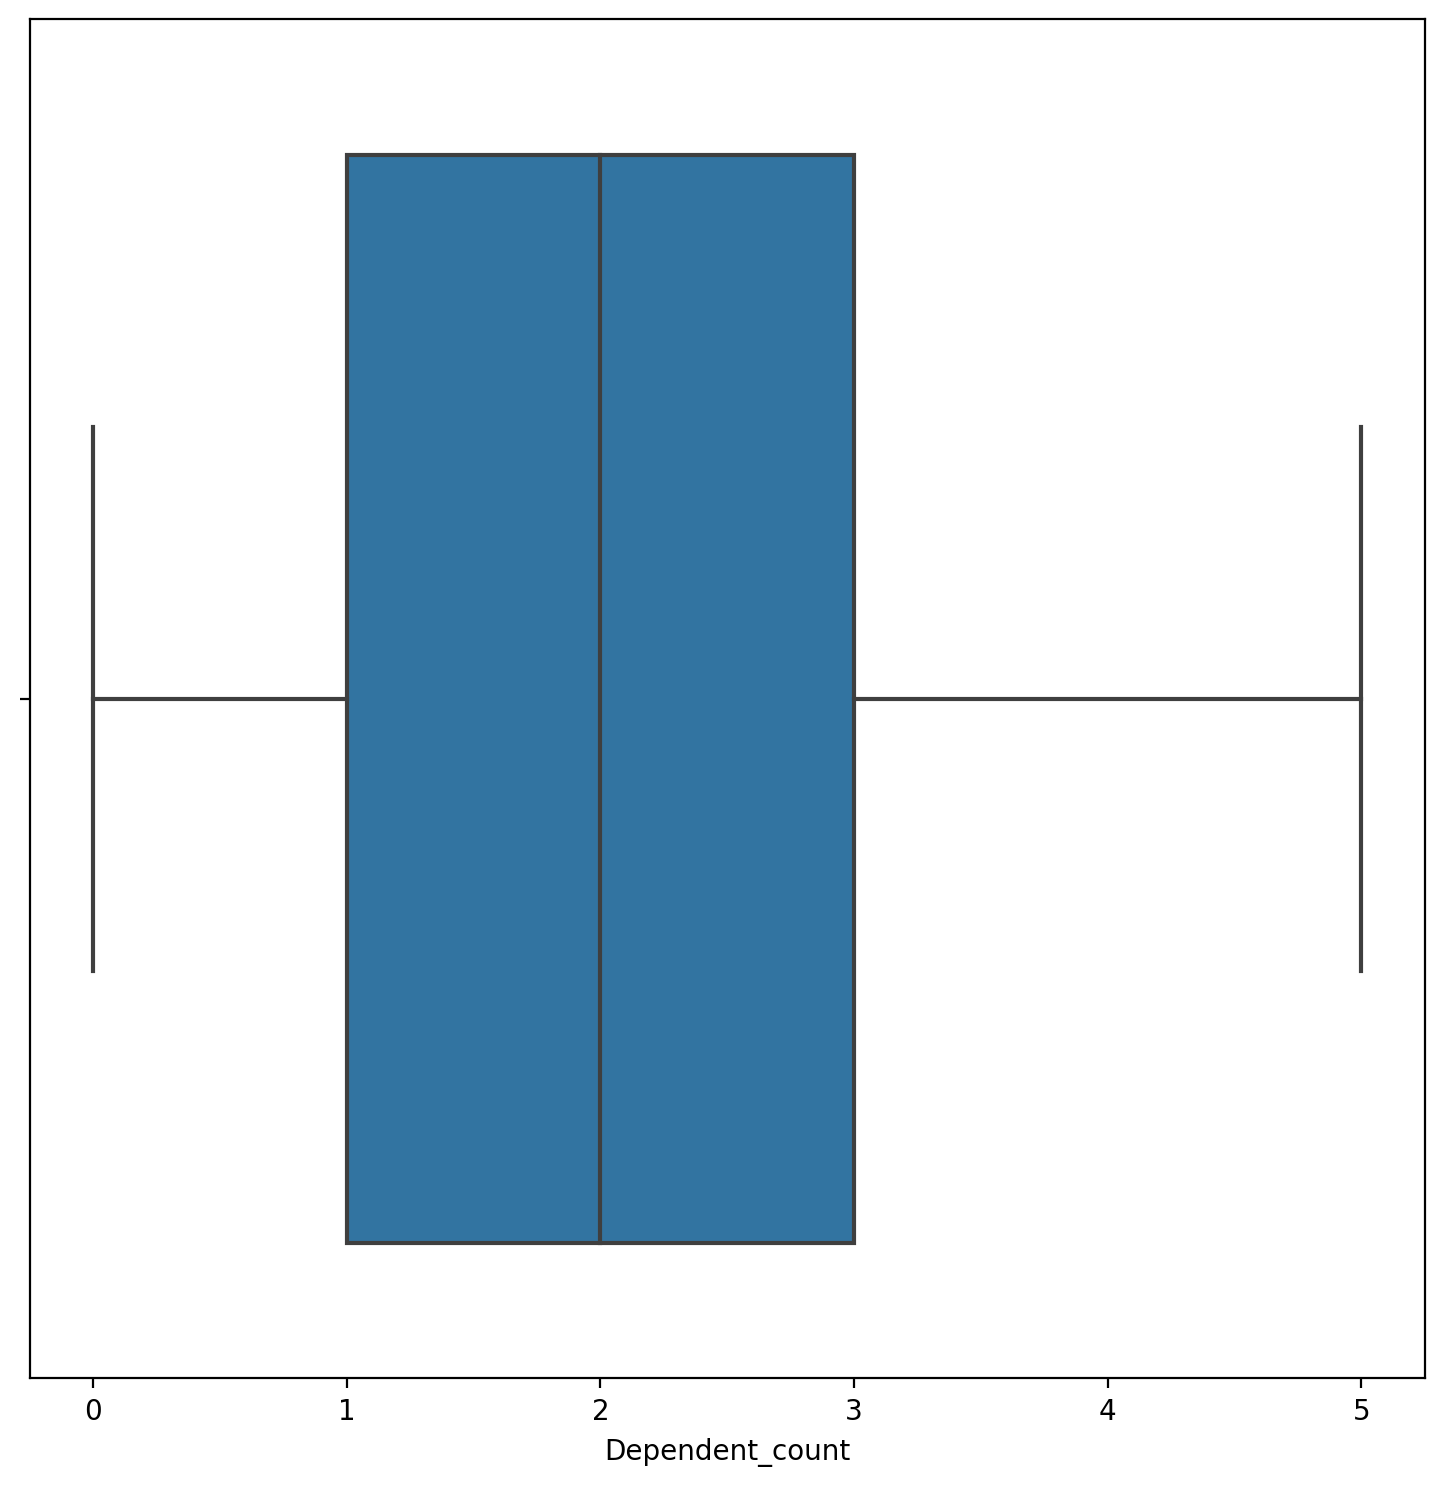

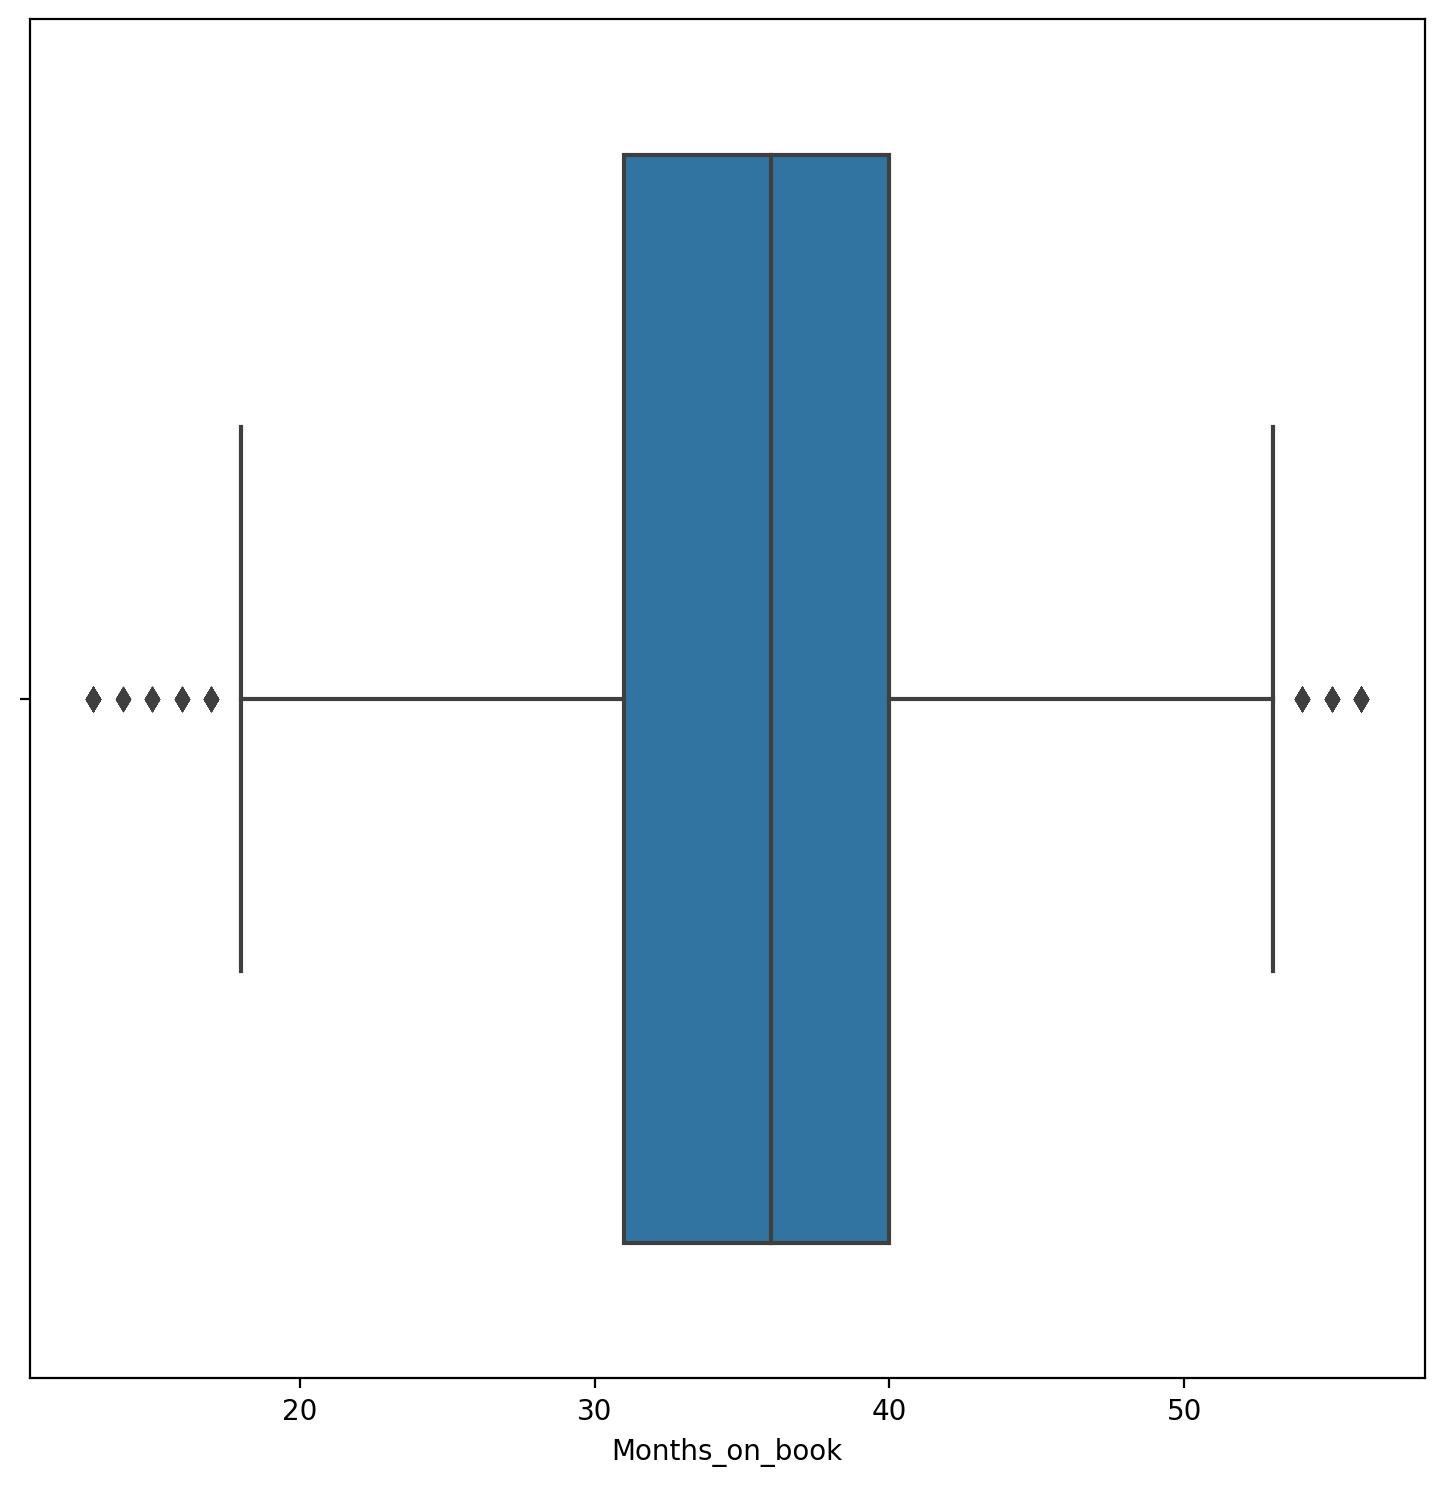

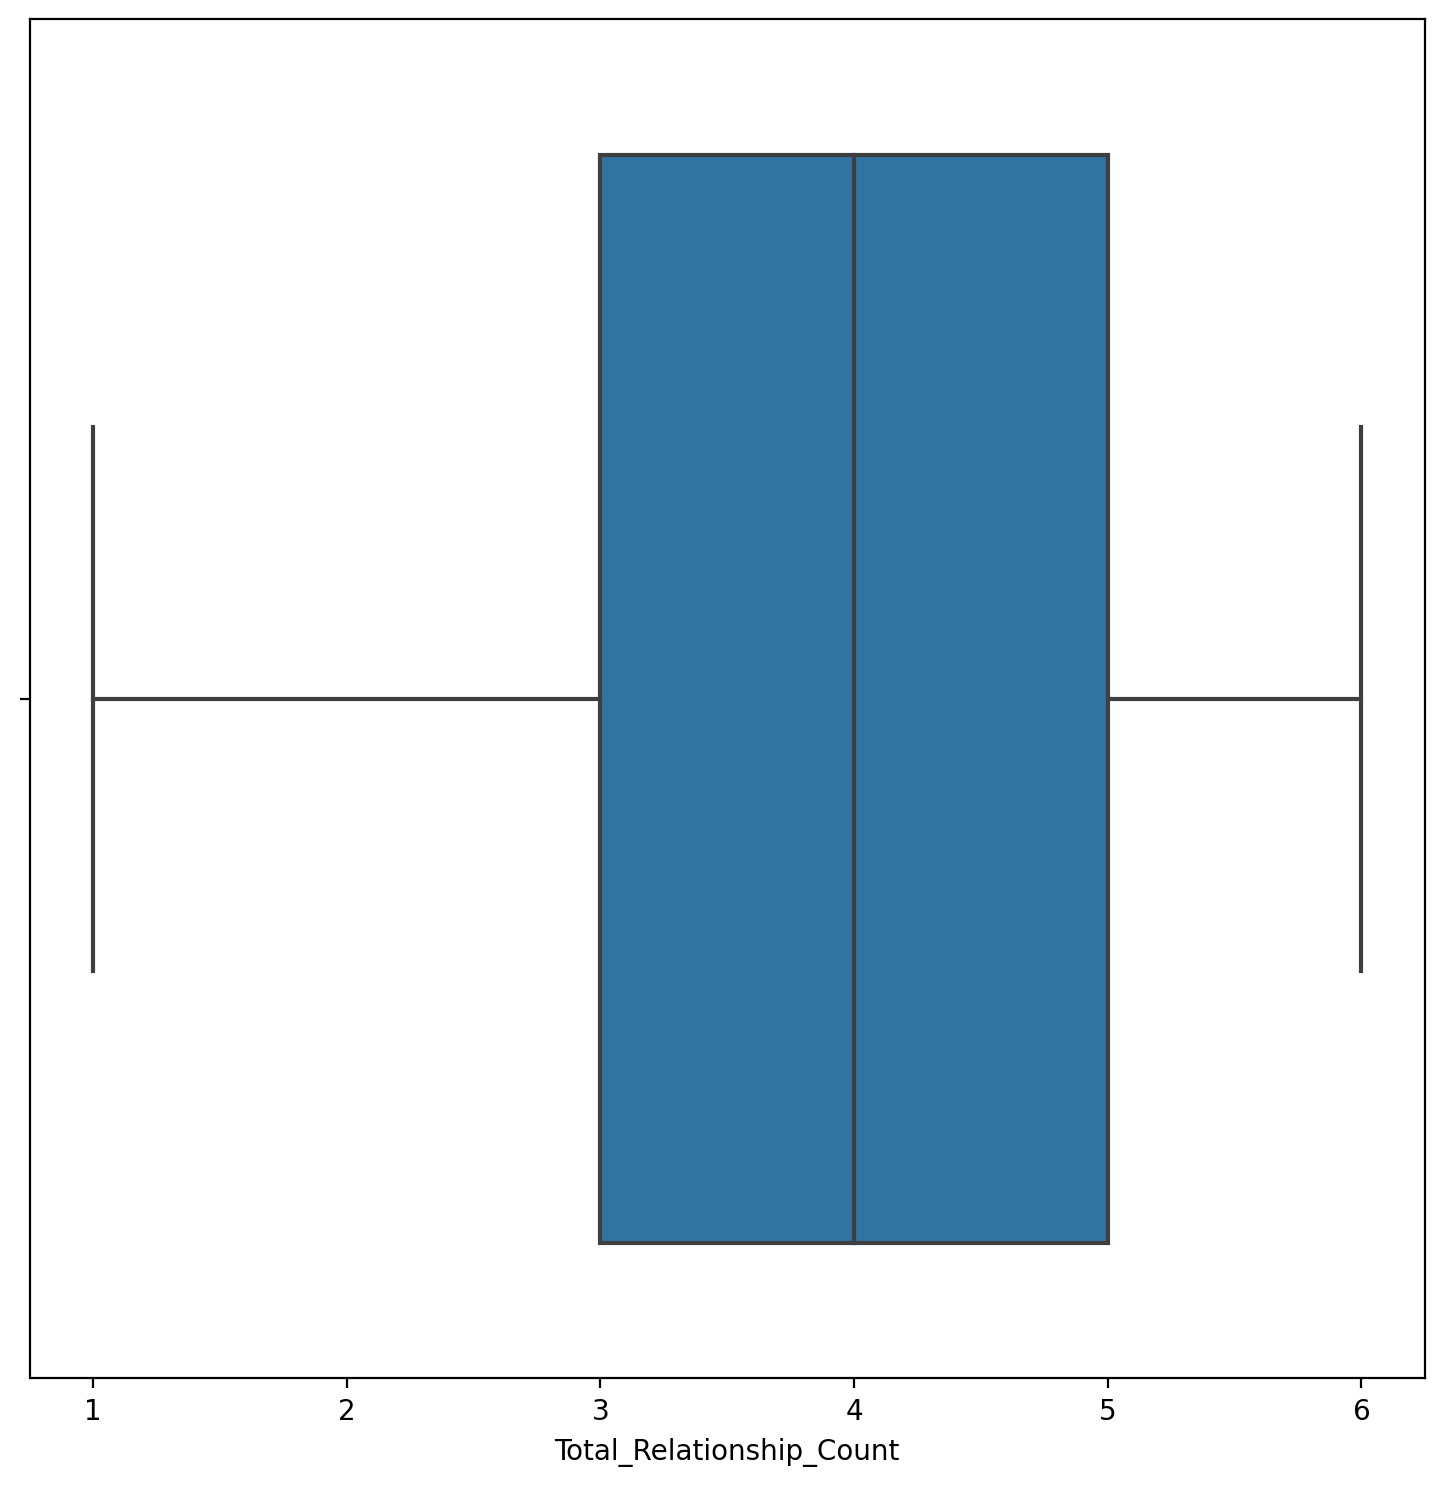

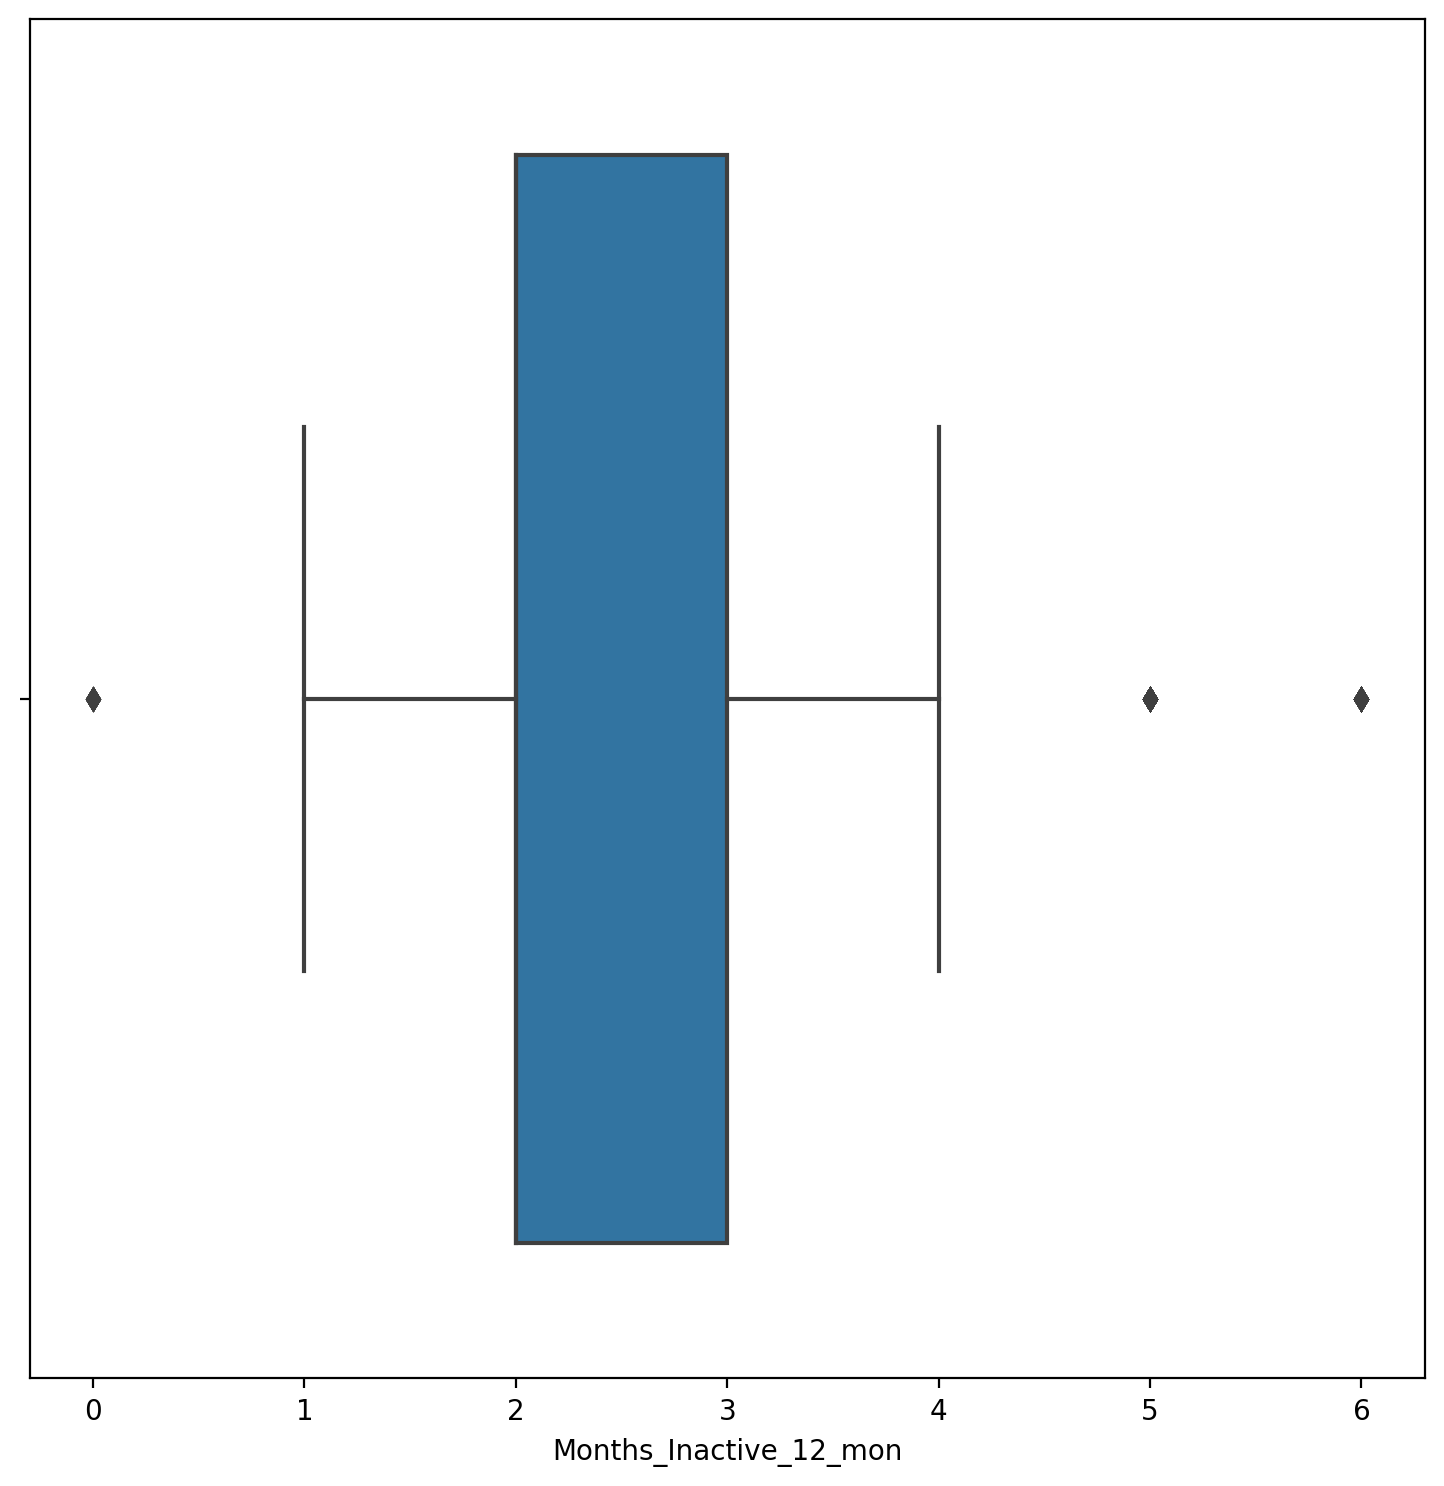

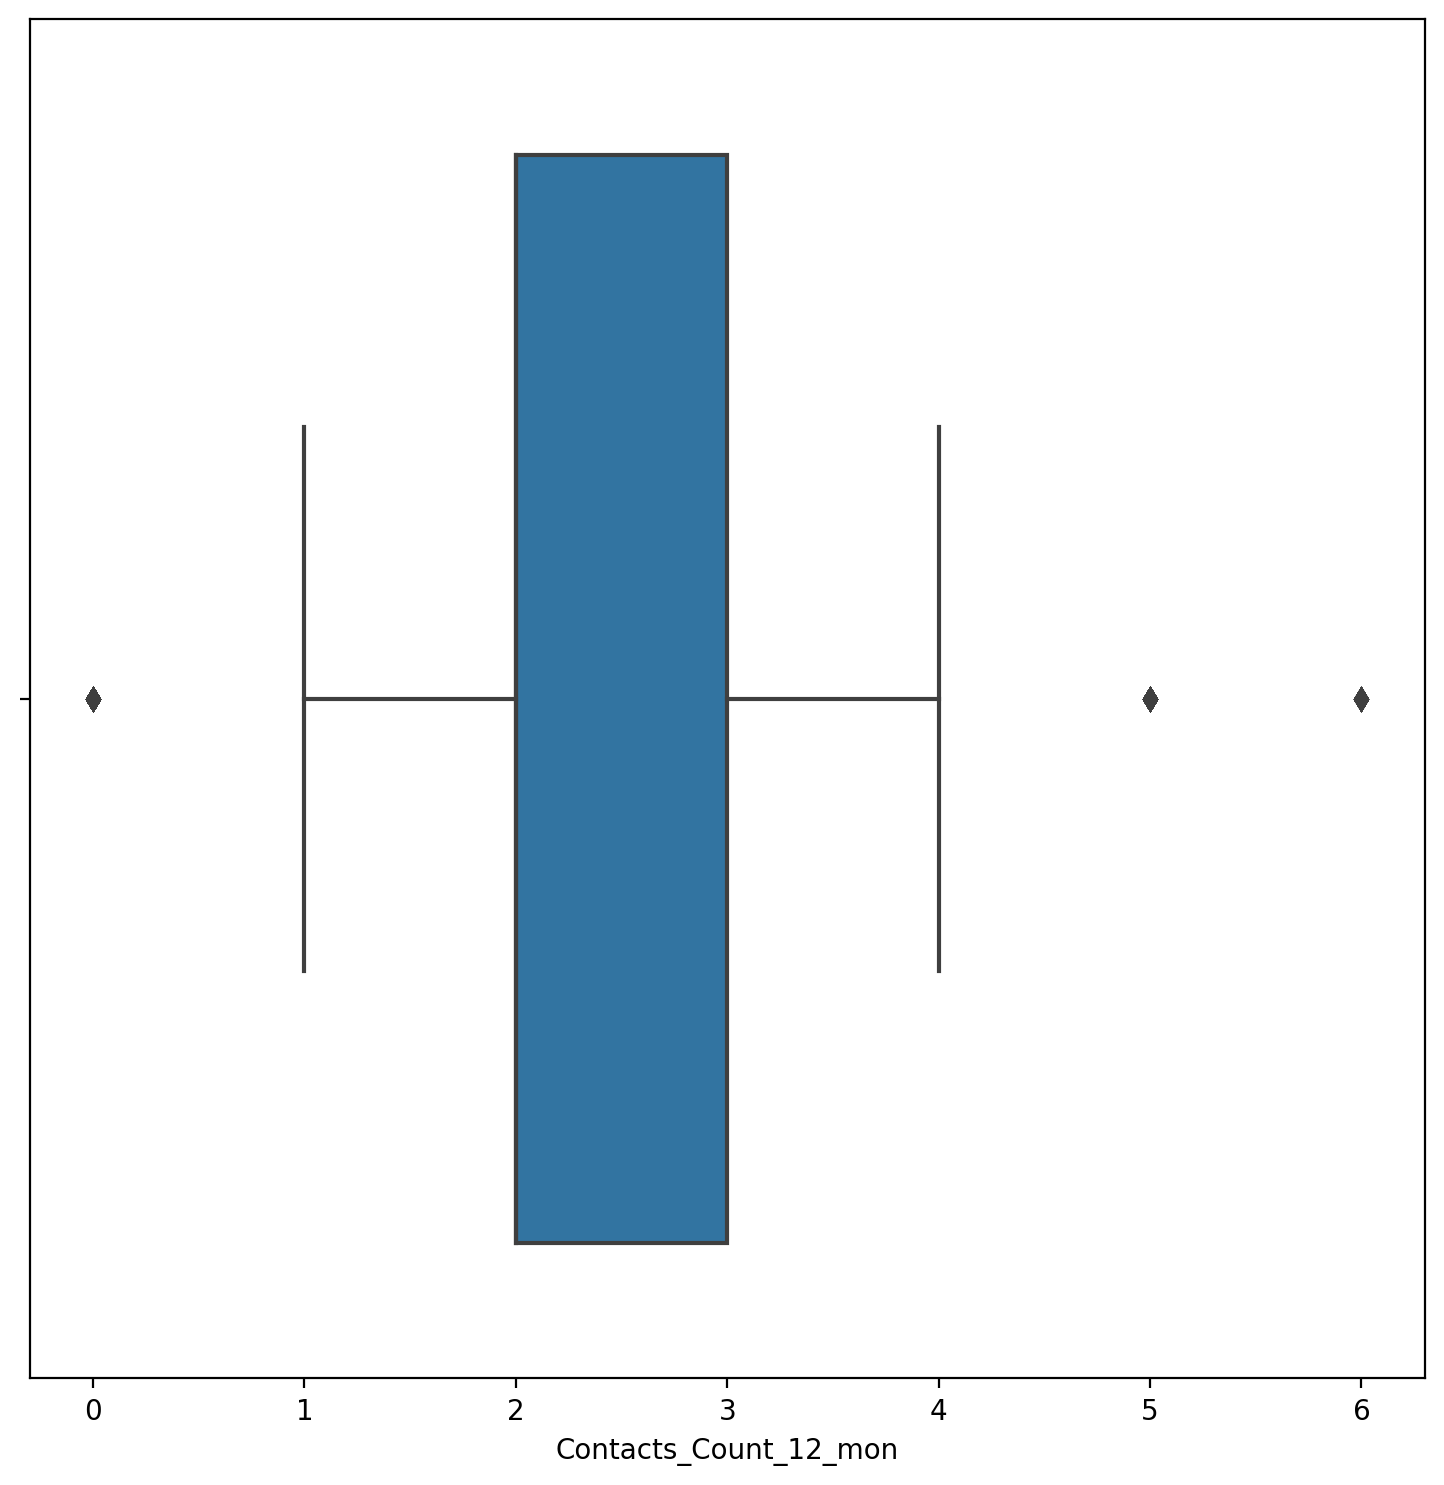

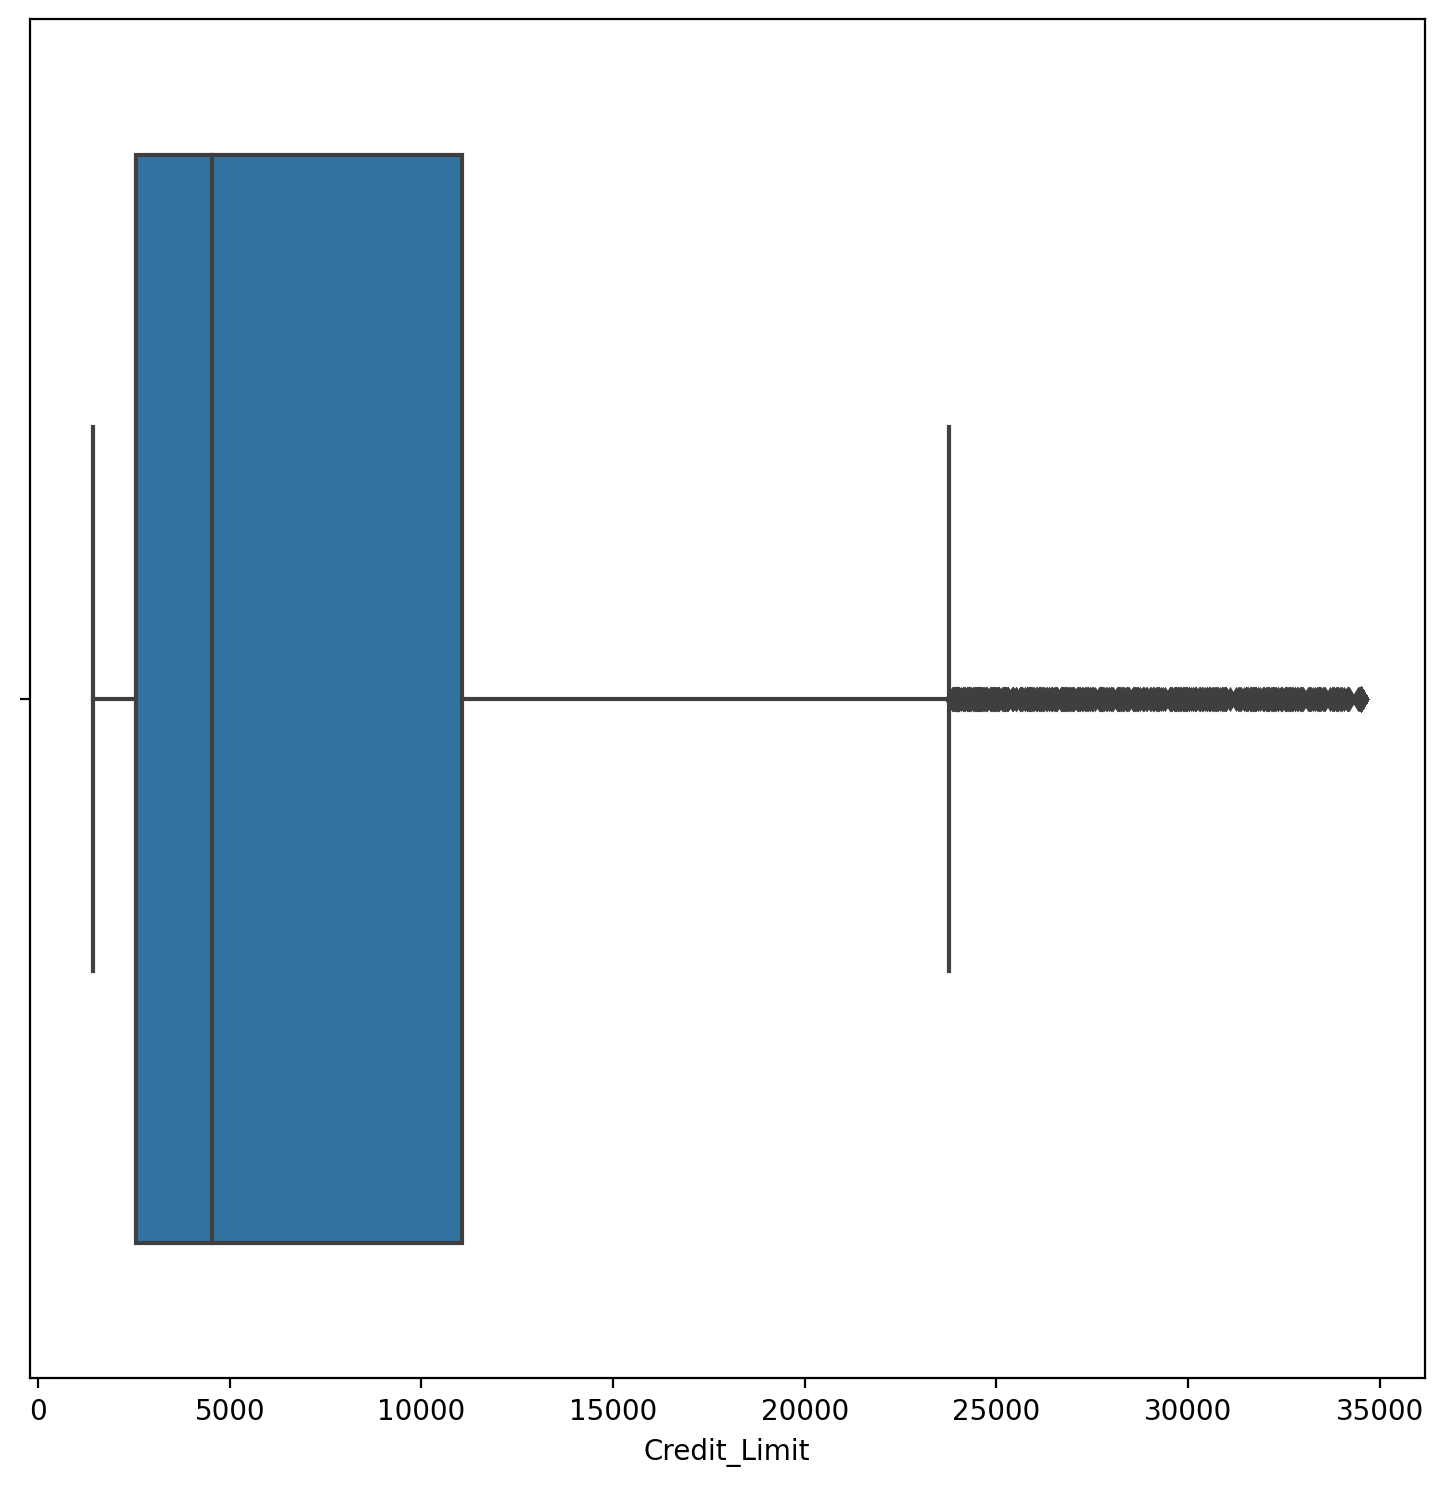

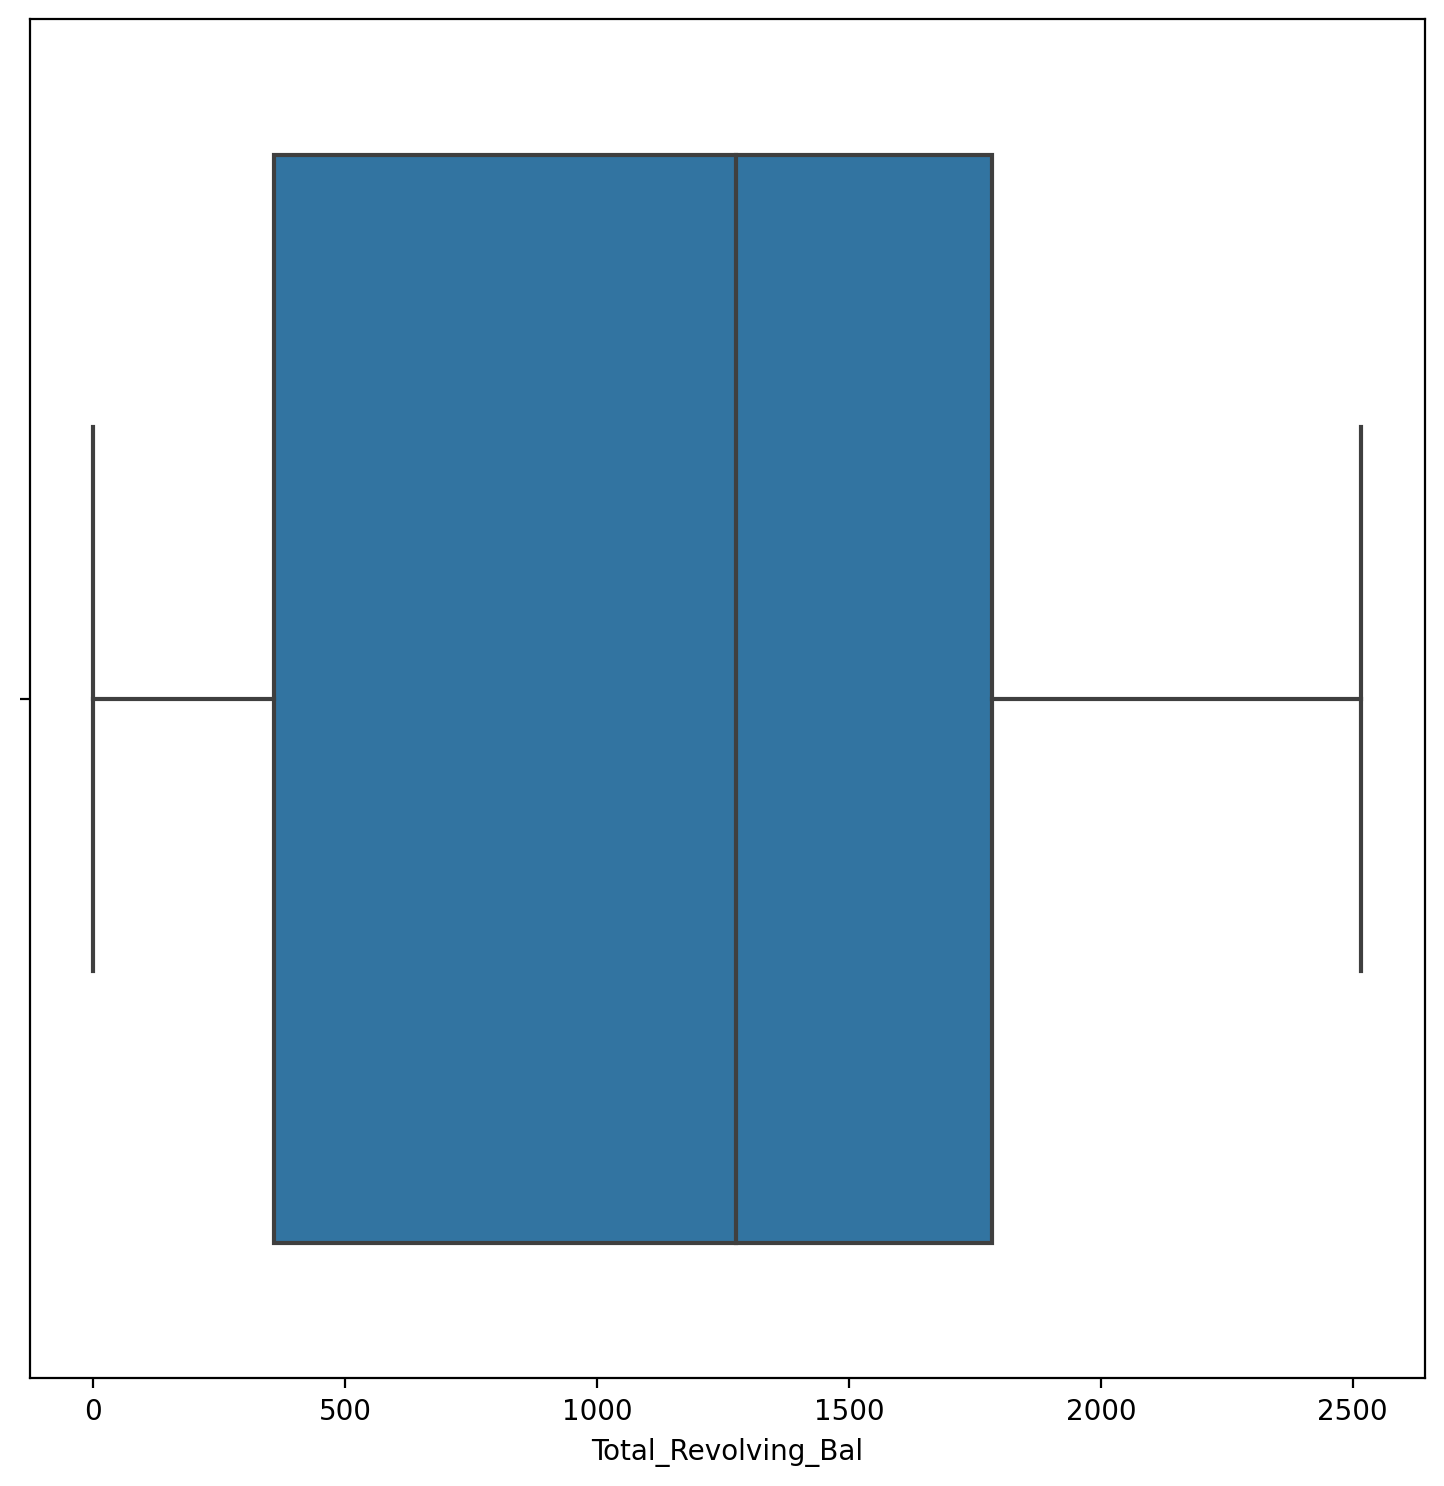

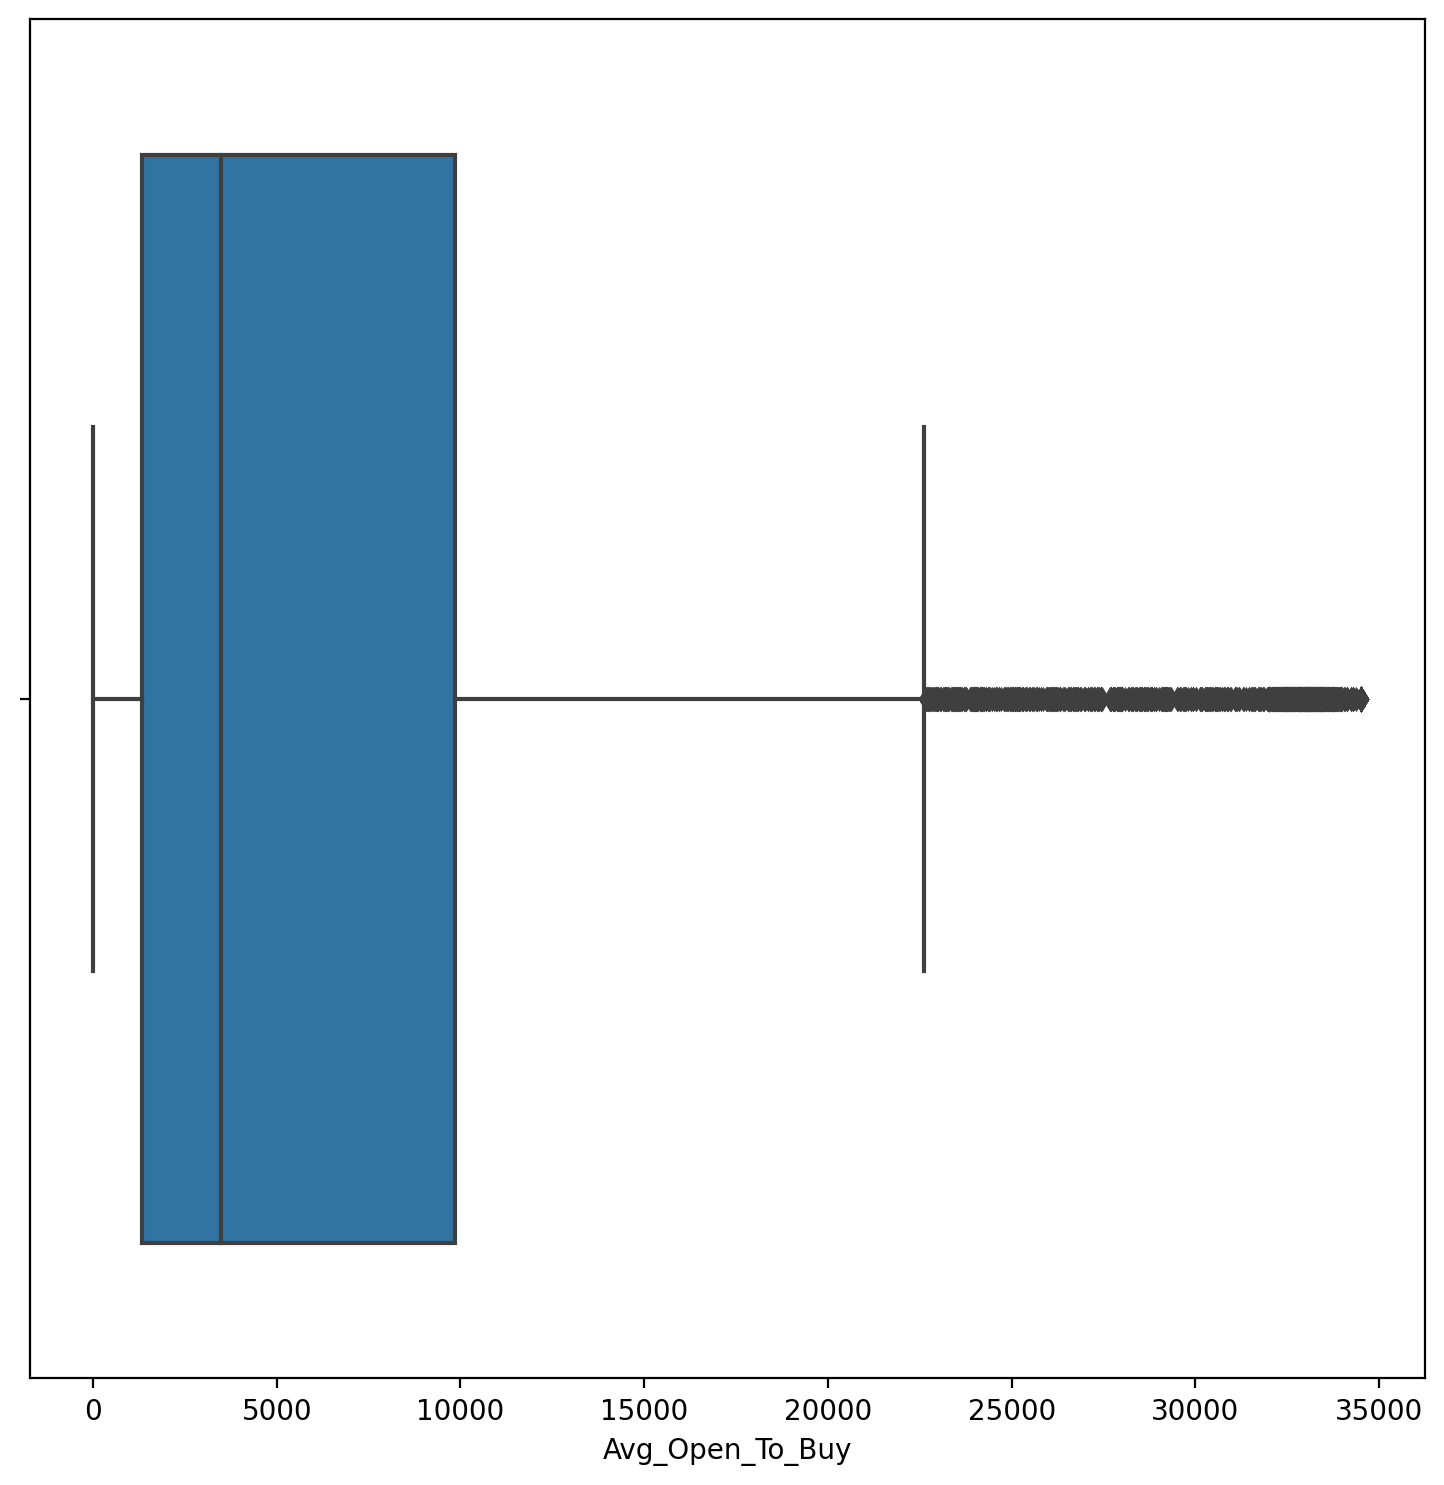

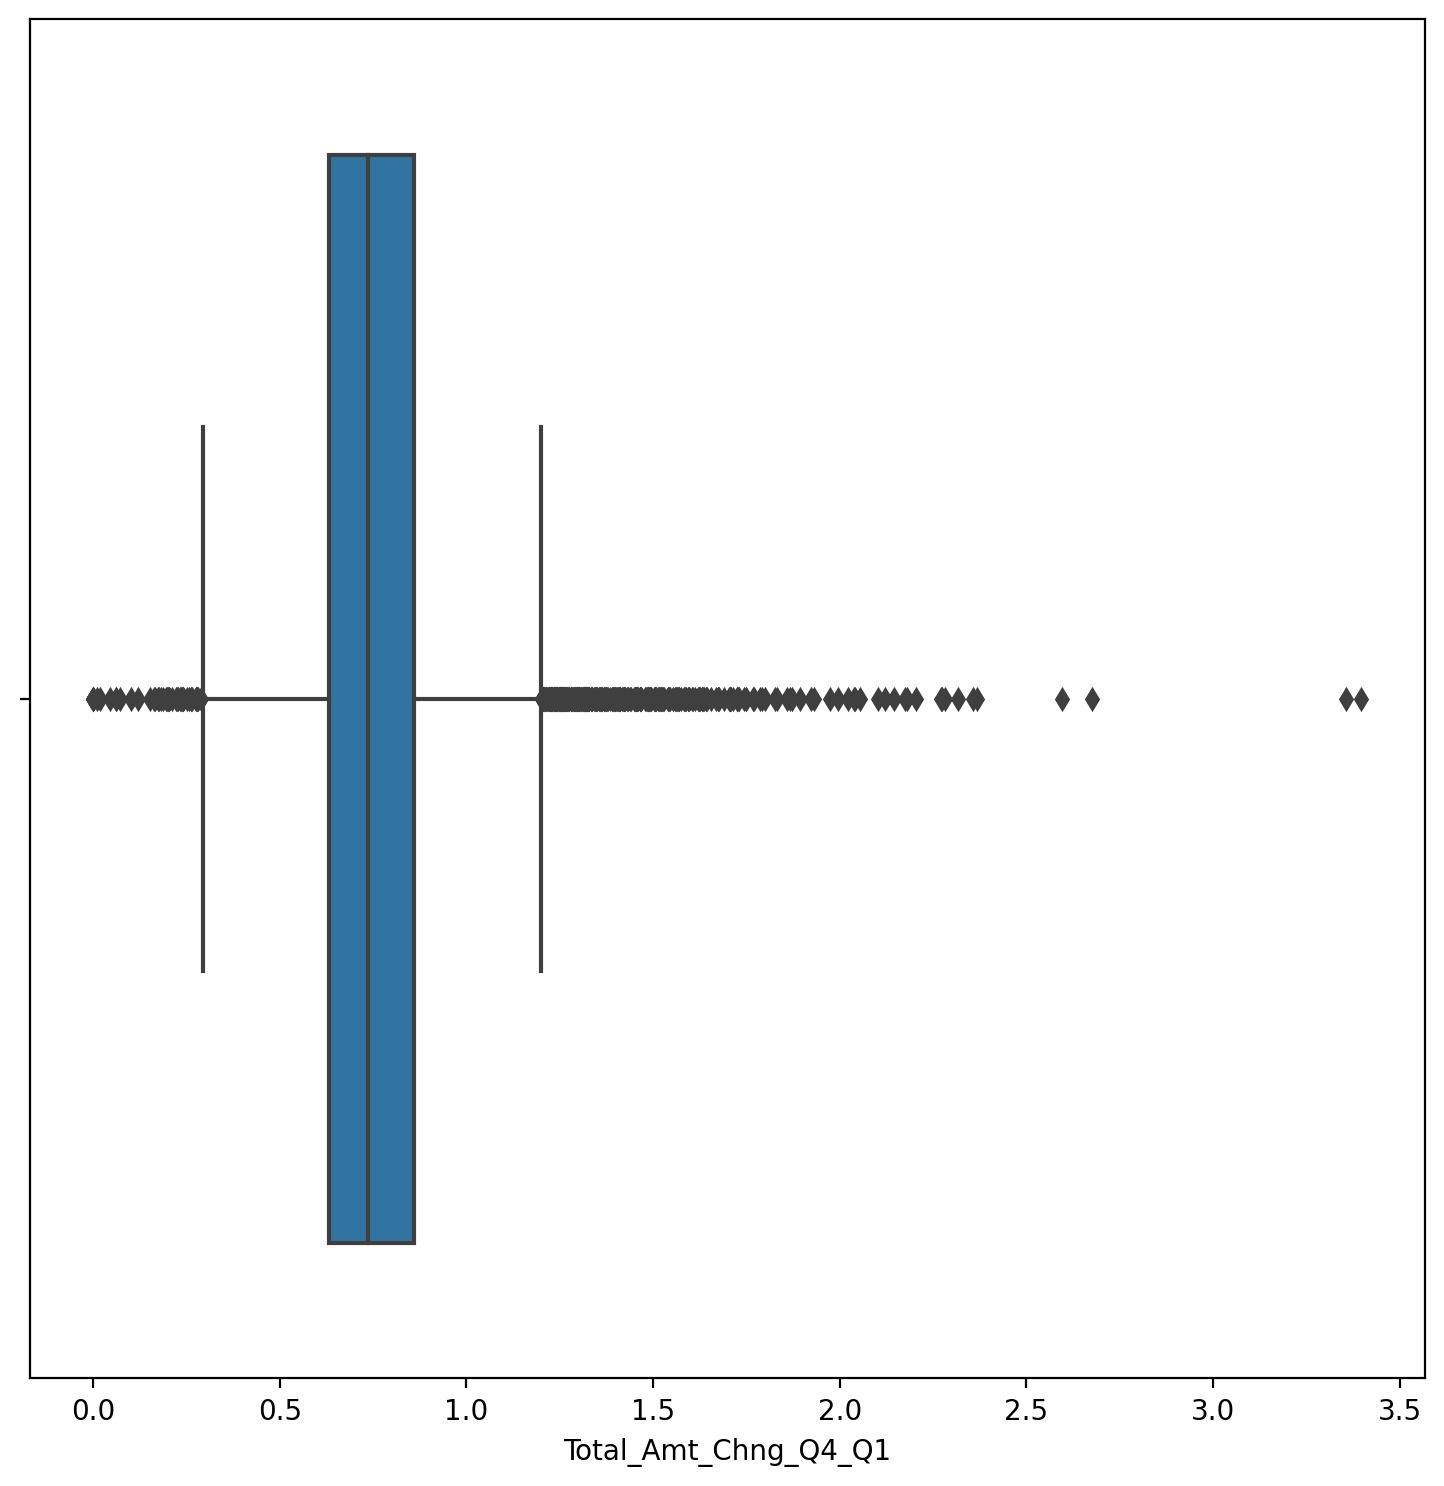

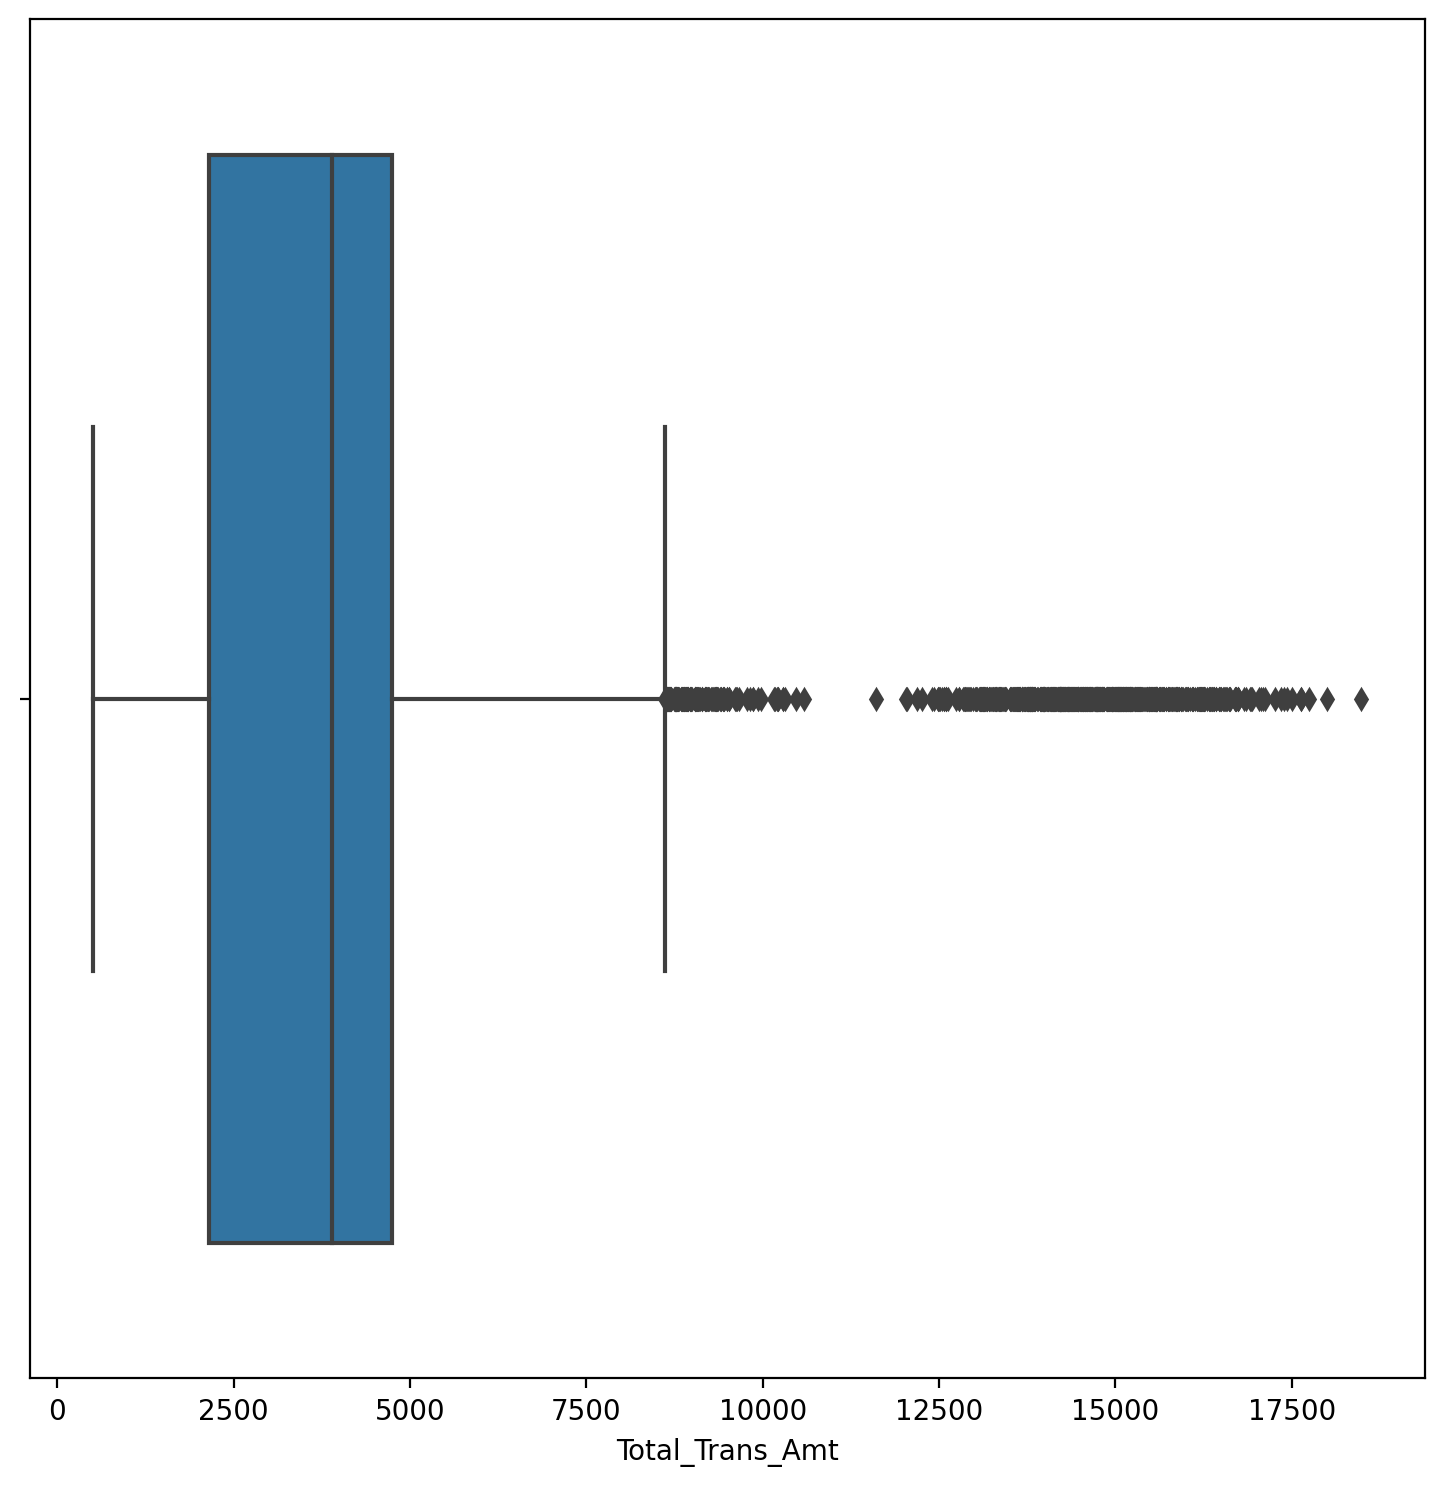

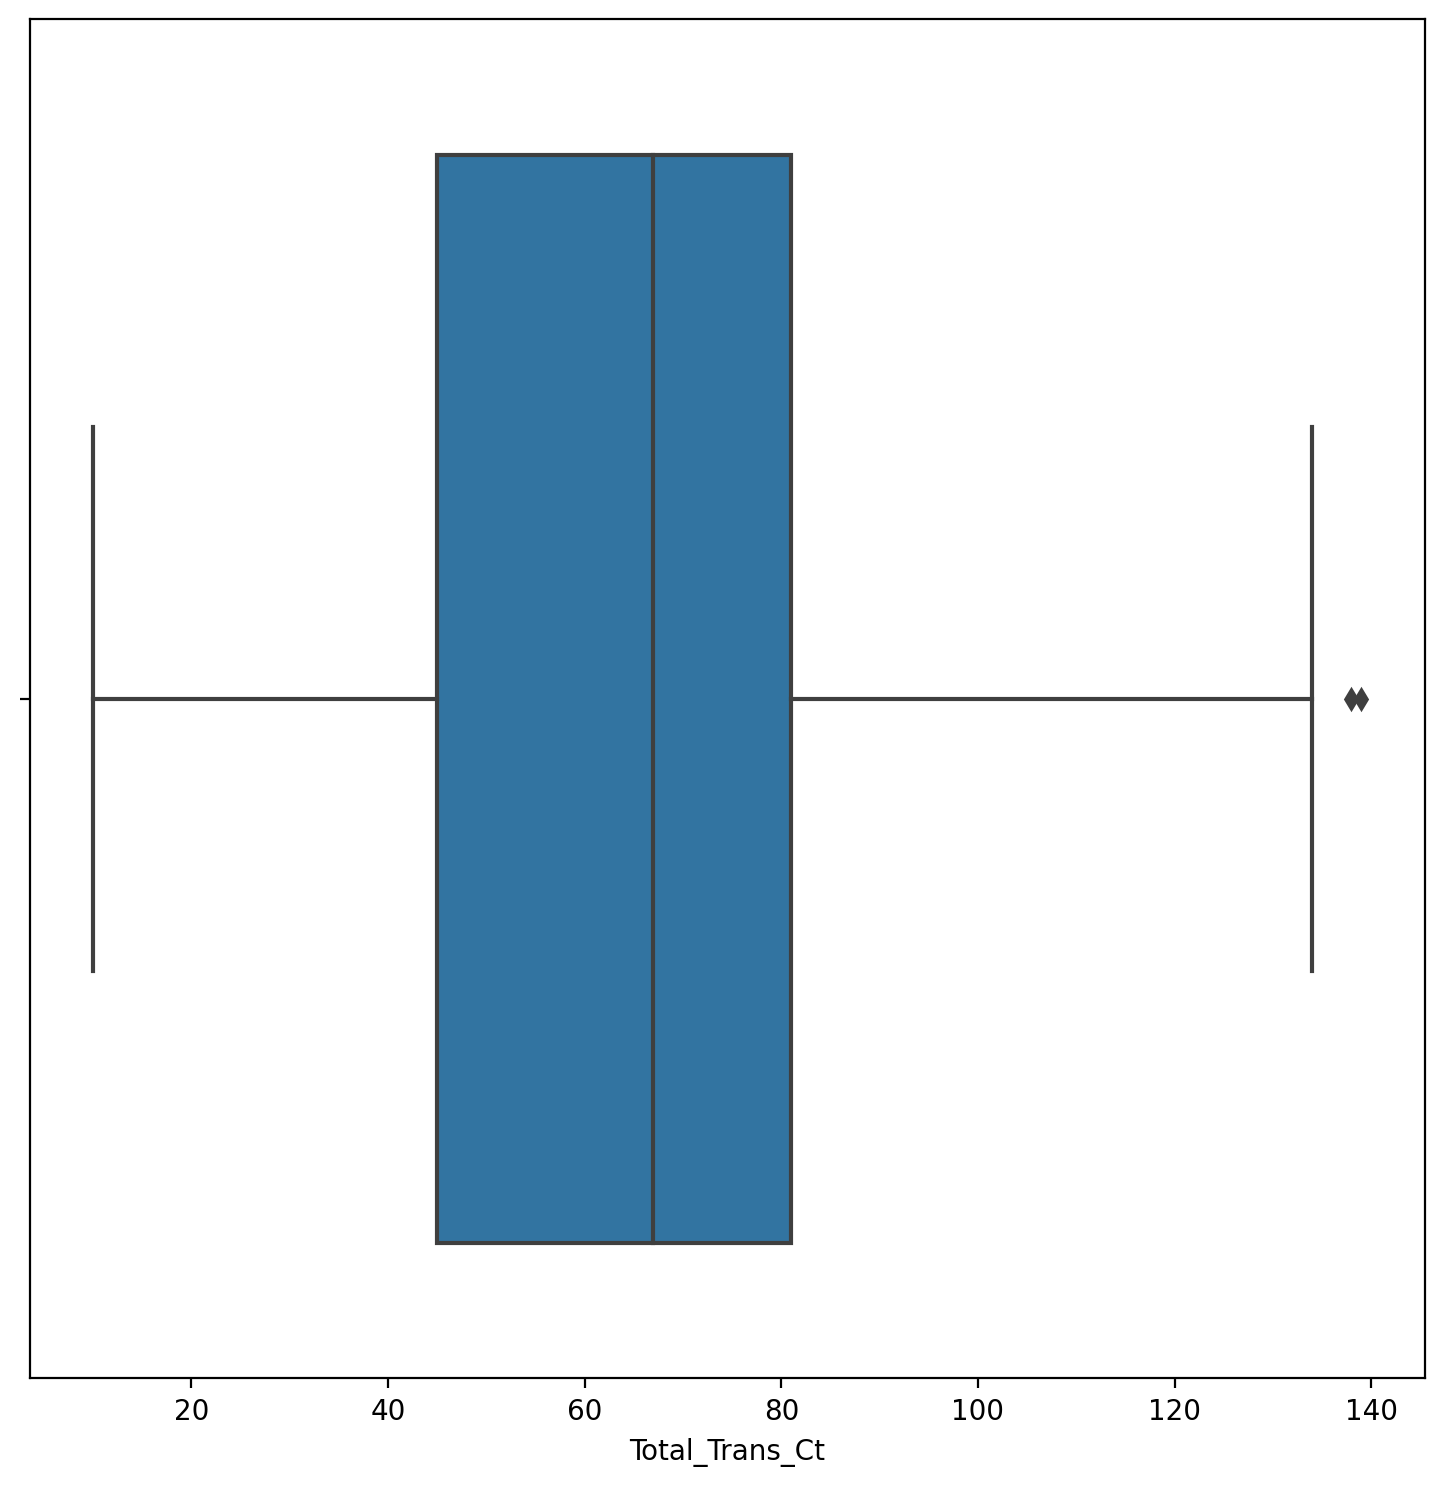

In [45]:
# dara.drop()
for i in [col for col in data.columns if data[col].dtype!='O'and 'Naive_Baye' not in col and 'CLIE' not in col]:
    sns.boxplot(data[i])
    plt.show()

In [46]:
data

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62


In [47]:
# = for i,x in enumerate(t) ]

t=pd.Series(data.groupby('Income_Category')['Customer_Age'])

In [48]:
mode={}
for i,x in enumerate(t):
    m1=x[1].mode()
    mode[x[0]]=m1

In [49]:
mode['$120K +']

0    50
dtype: int64

In [50]:
(t[0][1]).mode()

0    50
dtype: int64

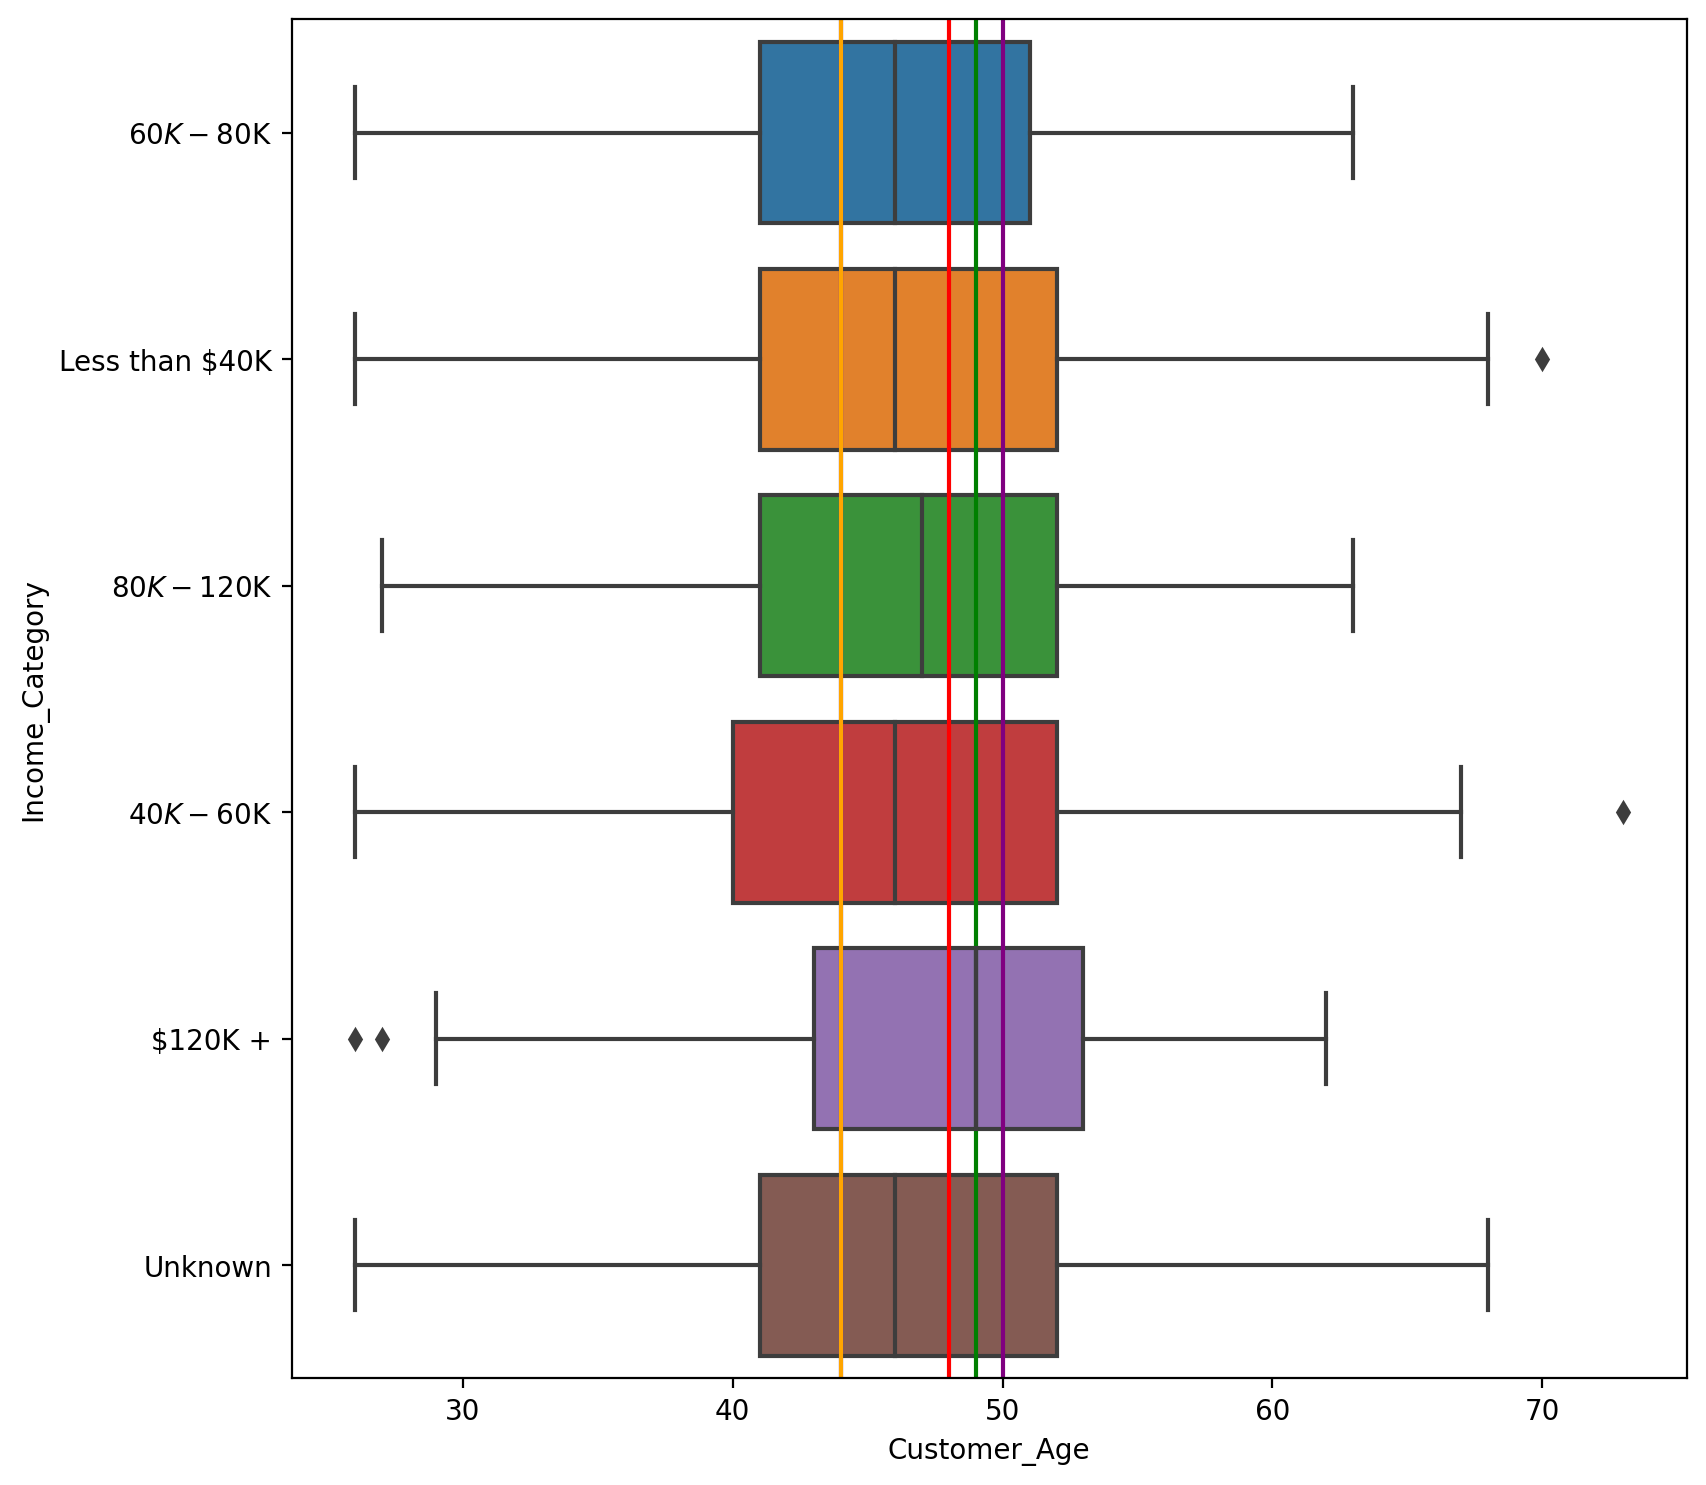

In [51]:
c=['blue','orange','green','red','purple','brown']
sns.boxplot(x='Customer_Age',y='Income_Category',data=data)
for i,r in zip(data.Income_Category.unique(),range(5)):
    plt.axvline(mode[i][0],color=c[r])


# mode['Less than $40K'] --> age --> , mode=43 , median=45

In [52]:
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28


In [53]:
filtered_data = data.query(" Marital_Status=='Married' or Gender=='M' or (Customer_Age>40 and Customer_Age<50) or Income_Category=='Less than $40K'").sort_index()

In [54]:
filtered_data.shape , data.shape

((9495, 17), (10127, 17))

In [55]:
filtered_data.shape , data.shape

((9495, 17), (10127, 17))

In [56]:
data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [57]:
data

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62


<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

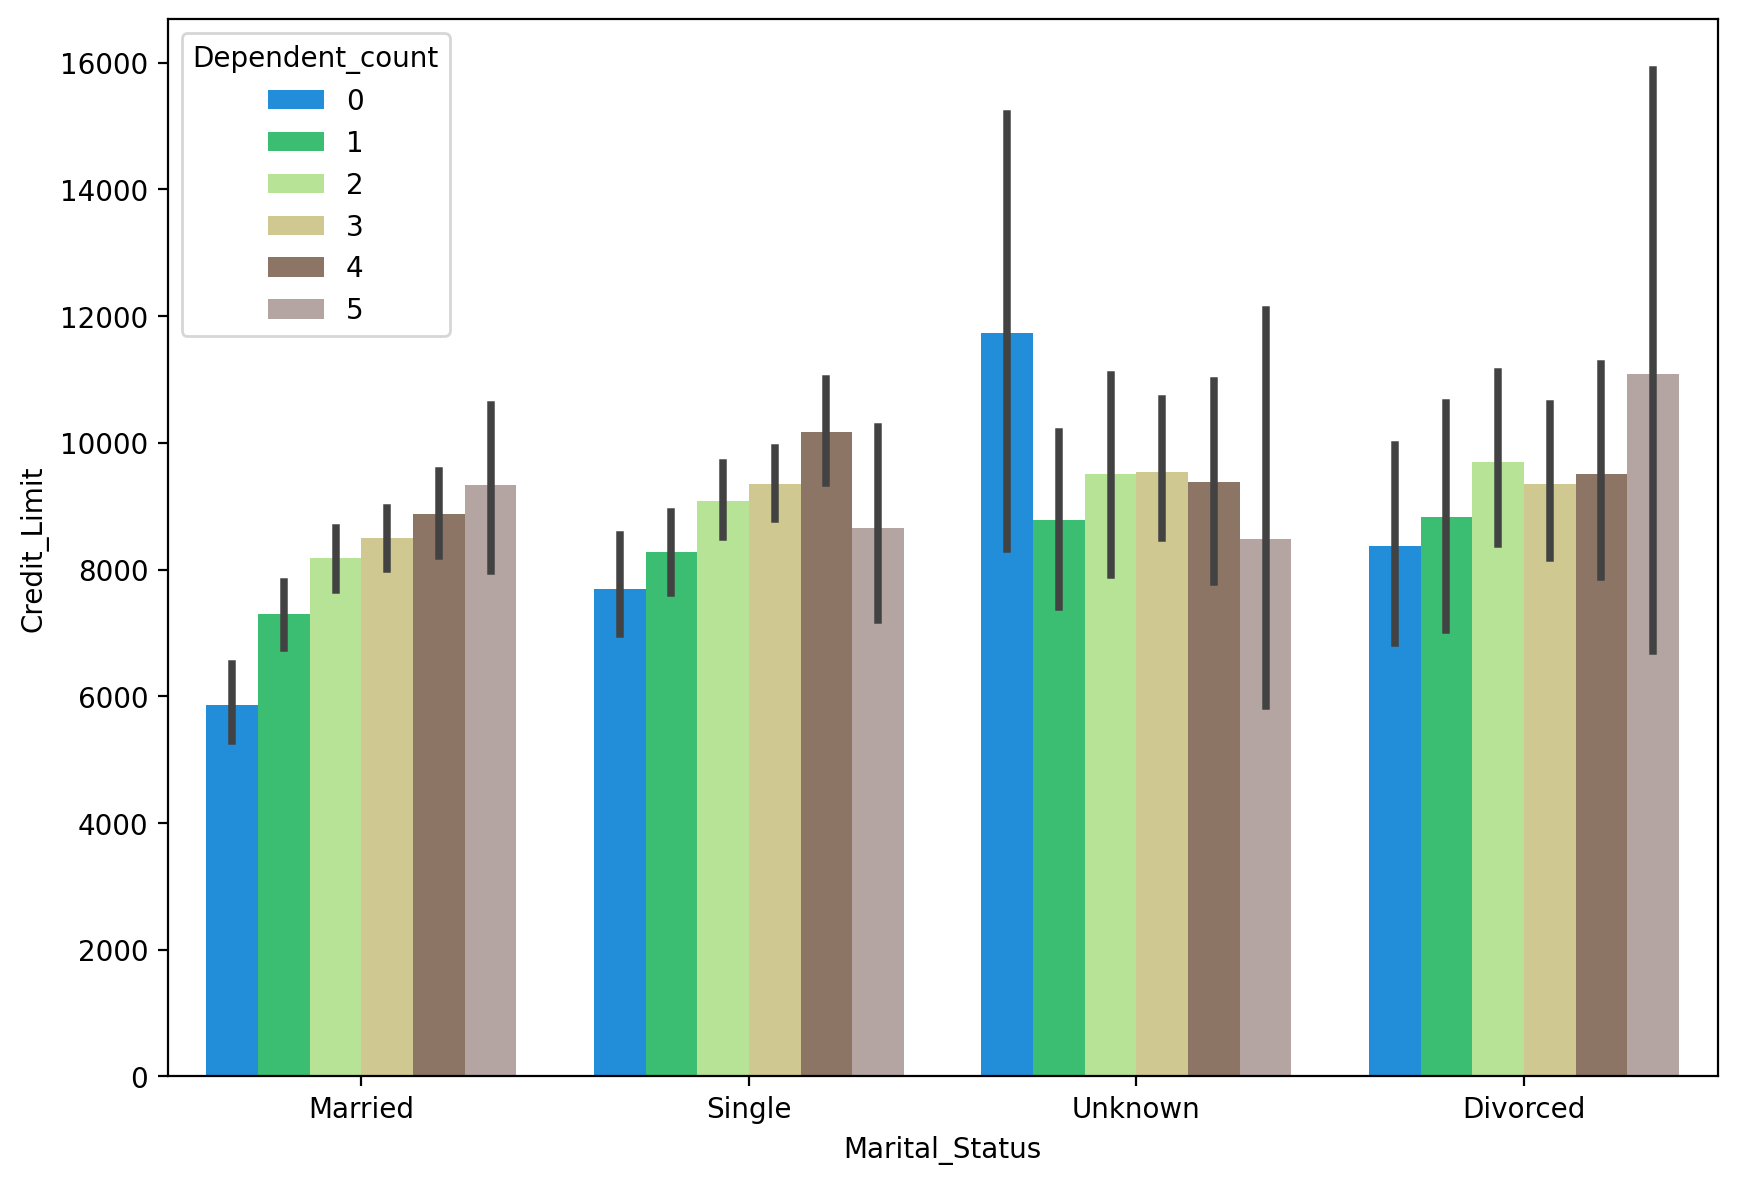

In [58]:
#x = data[['Card_Category','Months_Inactive_12_mon']].sort_values('Months_Inactive_12_mon',ascending=False)

#x.shape
plt.figure(figsize=(10,7))
sns.barplot(data=data,x='Marital_Status',y='Credit_Limit',hue='Dependent_count',palette='terrain')